In [210]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib as mpl
import pylab as plt
import copy
import os
from scipy.interpolate import interp1d
import pickle
from random import choices, getrandbits
from Grids import *
import BoltzEvolve

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
ThermVelNormUnits

71.91661838546081

In [147]:
T=1           # in K
kT=T*8.62e-5  # in eV
mp=3e9        # in eV

ThermMom=np.sqrt(2*mp*kT) # in eV
ThermVel=ThermMom/mp      # in c

ThermVelNormUnits=ThermVel*3e8 # in ms^-1
#Density=1e18/(215*1e-4)*(0.27/2)        # in m^-3 (lifted from CDR)
Density  = 6.28e18
CrossSec = 4.52e-20    # in m2


RateConst=ThermVelNormUnits*Density*CrossSec

size=30
grid=Grid2D(size)

9.96154701655703e+17


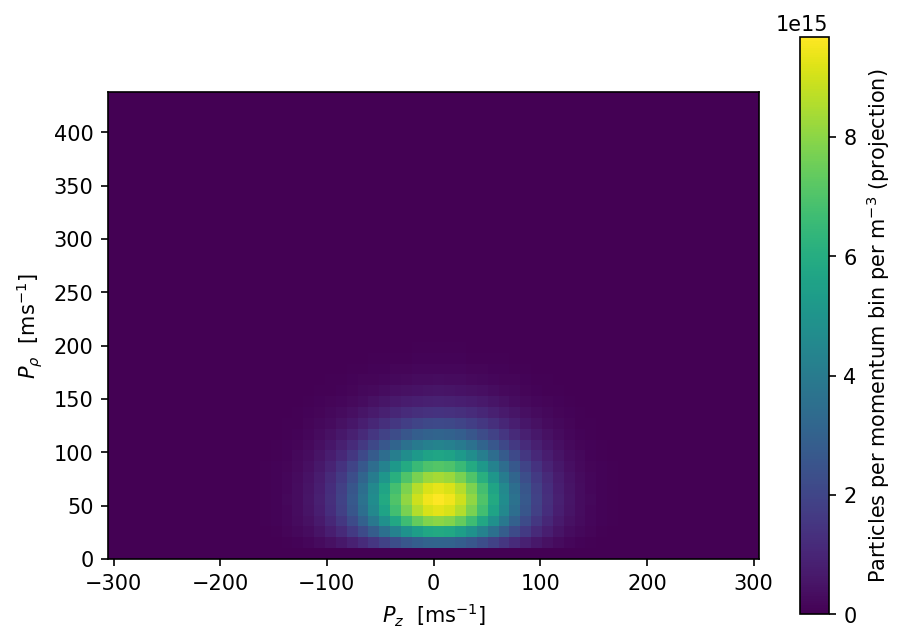

In [184]:
mkt=25  #MBDE p^2 for 1 sigma, in grid untis
dist=SlicedMB2D(T=T, mkt=mkt, gridpoints=size, m=mp, RCut=35,Rho=Density)
plt.figure(figsize=(7,5),dpi=150)
plt.imshow((dist.f*dist.grid.RR2).T,origin='lower',extent=(-dist.grid.zlim*dist.VScale_SI(),dist.grid.zlim*dist.VScale_SI(),0,dist.grid.rlim*dist.VScale_SI()))
plt.colorbar(label=r'Particles per momentum bin per m$^{-3}$ (projection)')

plt.ylabel(r"$P_\rho$  [ms$^{-1}$]")
plt.xlabel(r"$P_z$  [ms$^{-1}$]")
Tot=sum(sum(dist.f*dist.grid.RR2))
print(Tot)

9.96154701655703e+17


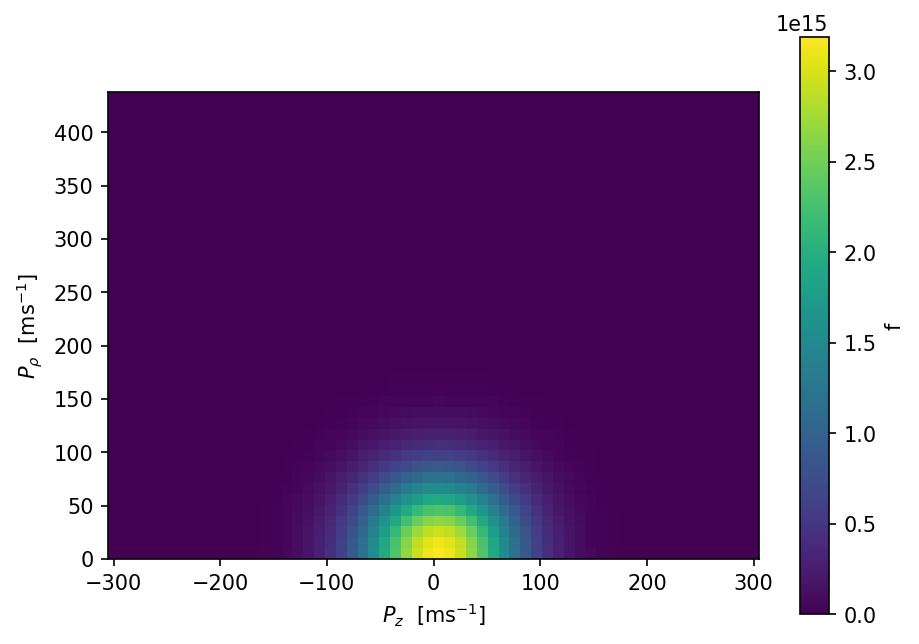

In [185]:
mkt=25  #MBDE p^2 for 1 sigma, in grid untis
#dist=SlicedMB2D(T=T, MBSigma2=SqrtTwoMKT**2, gridpoints=size, m=mp, RCut=35,Rho=Density)
plt.figure(figsize=(7,5),dpi=150)
plt.imshow((dist.f).T,origin='lower',extent=(-dist.grid.zlim*dist.VScale_SI(),dist.grid.zlim*dist.VScale_SI(),0,dist.grid.rlim*dist.VScale_SI()))
plt.colorbar(label=r'f')

plt.ylabel(r"$P_\rho$  [ms$^{-1}$]")
plt.xlabel(r"$P_z$  [ms$^{-1}$]")
Tot=sum(sum(dist.f*dist.grid.RR2))
print(Tot)

In [186]:
be=BoltzEvolve.Evolver2D(grid,verbose=True,CrossSec=4.52e-20)



In [205]:
def GetParticleAndEnergyRates(dist,Thresh=18,cols=500):
    c2=grid.RR2**2+grid.ZZ2**2

    CutMask=grid.RR2<Thresh
    InvCutMask=np.ones_like(CutMask)-CutMask.astype('int')
    DensityCorrection=sum(sum(dist.f*grid.RR2))/sum(sum(dist.f*CutMask*grid.RR2))
    dist.f=dist.f*CutMask*DensityCorrection
    dfdt=be.GetDfDtFast(dist, cols)

#    print("N")
#    print(sum(sum(dfdt*InvCutMask*grid.RR2)),sum(sum(dist.f*grid.RR2)))
#    print("E")
#    print(sum(sum(c2*dfdt*InvCutMask*grid.RR2)),sum(sum(c2*dist.f*grid.RR2)))
    particlefrac = sum(sum(dfdt*InvCutMask*grid.RR2))/sum(sum(dist.f*grid.RR2))
    energyfrac   = sum(sum(c2*dfdt*InvCutMask*grid.RR2))/sum(sum(c2*dist.f*grid.RR2))
#    plt.imshow(dfdt*grid.RR2,cmap='RdBu')
#    plt.title('dfdt')
#    plt.clim(-6e17,6e17)
#    plt.colorbar()
#    plt.show()
#    plt.imshow(dist.f*grid.RR2)
#    plt.title('dfdt')
#    plt.colorbar()
#    plt.show()
    return particlefrac,energyfrac

1e+17
10
N
5583668265013411.0 1.586233601430202e+16
E
8.171638693208502e+17 9.097739718031254e+17


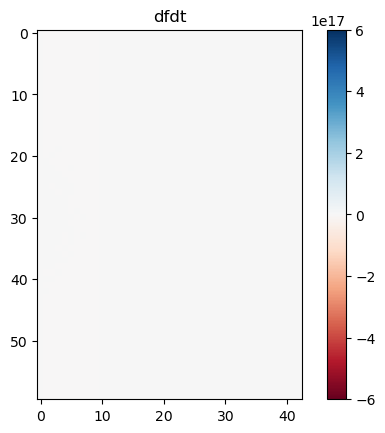

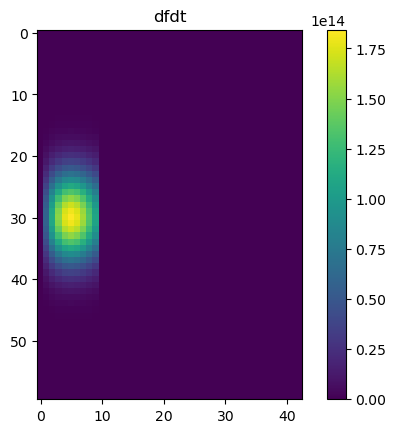

11
N
4640334535332110.0 1.5862336014302022e+16
E
7.71901262948348e+17 9.752581457390193e+17


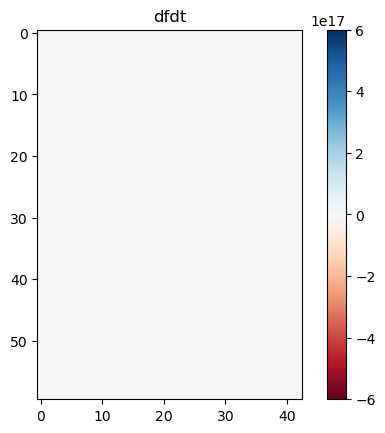

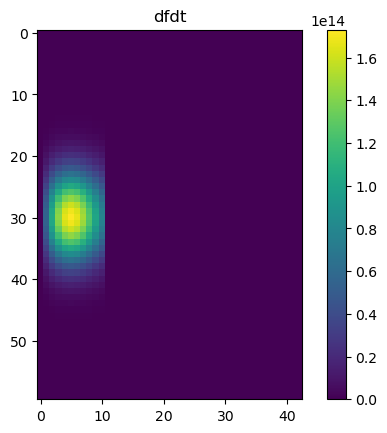

12
N
3403462860951998.0 1.586233601430202e+16
E
6.465010083510336e+17 1.0318932873592808e+18


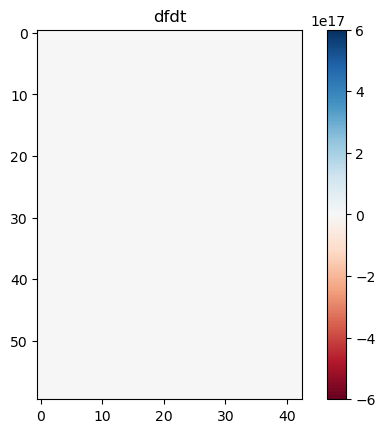

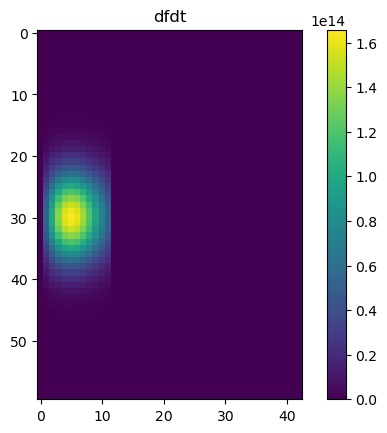

13
N
2103579059963259.2 1.5862336014302026e+16
E
4.641300659049726e+17 1.0785066391139735e+18


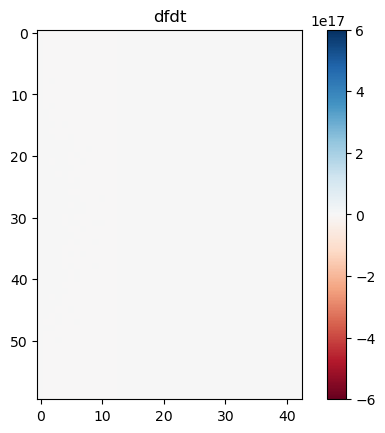

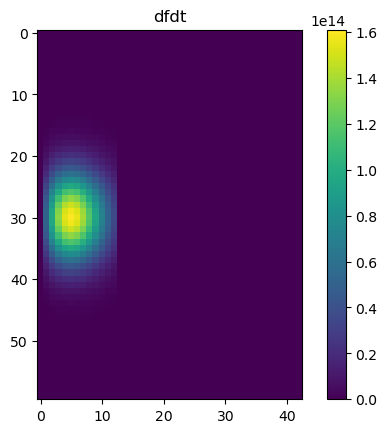

14
N
1441839222816747.5 1.5862336014302018e+16
E
3.550449850161397e+17 1.1149584724620915e+18


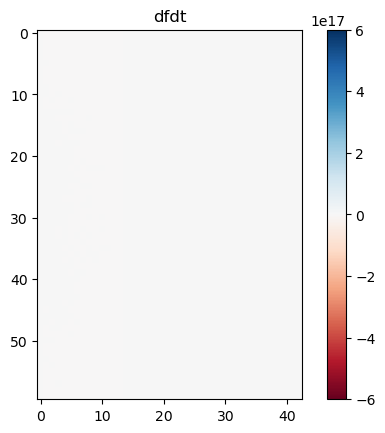

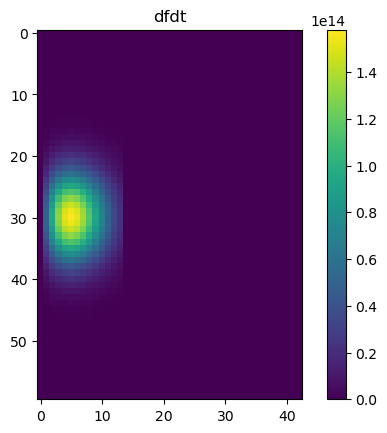

15
N
953787316264414.4 1.586233601430202e+16
E
2.6417523845910986e+17 1.1420096680852739e+18


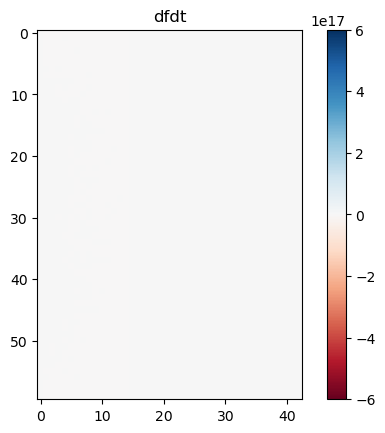

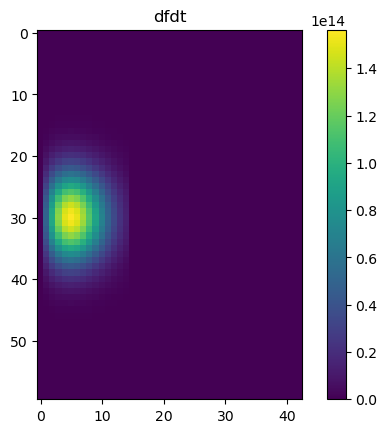

16
N
568792342067628.0 1.586233601430202e+16
E
1.7592974143656883e+17 1.1610471670197458e+18


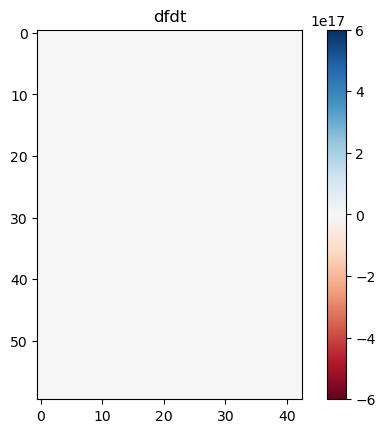

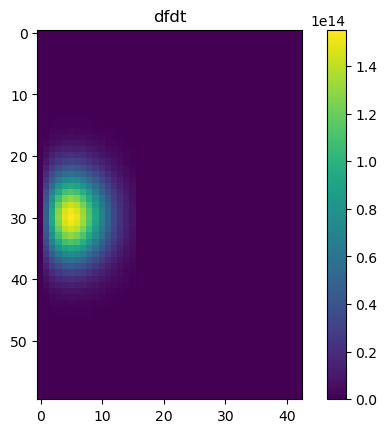

17
N
317753023199235.1 1.5862336014302024e+16
E
1.0837349574151806e+17 1.1737506418808325e+18


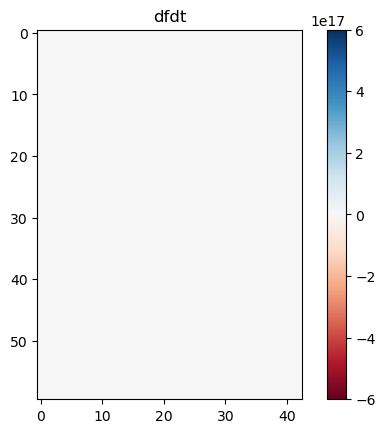

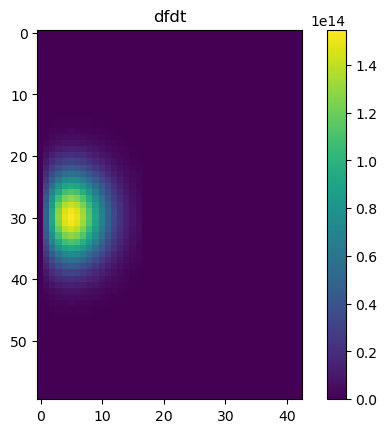

18
N
180279439623860.72 1.5862336014302024e+16
E
6.812006192561037e+16 1.18179074755862e+18


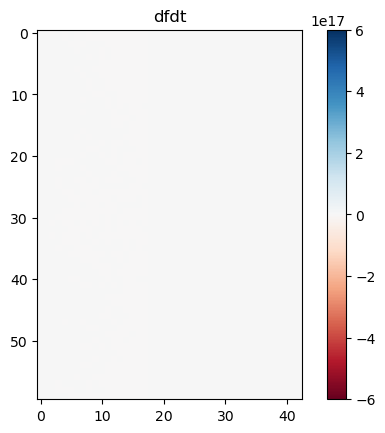

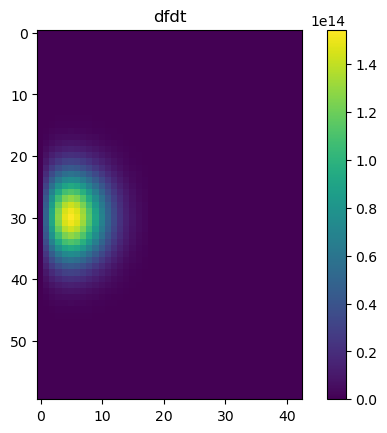

19
N
102325628397384.19 1.5862336014302022e+16
E
4.2234710322672024e+16 1.1866204076277514e+18


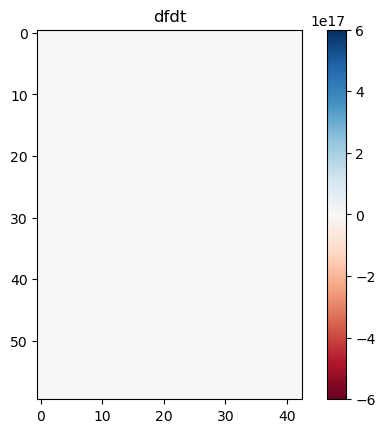

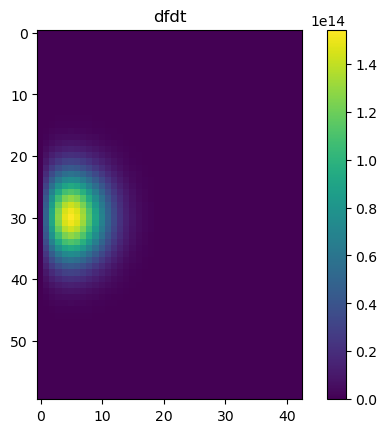

20
N
47666873779672.43 1.5862336014302018e+16
E
2.1696910624259396e+16 1.1893763412492864e+18


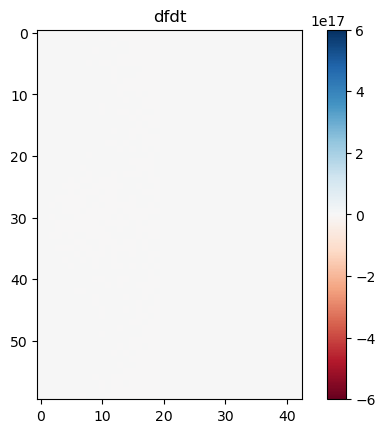

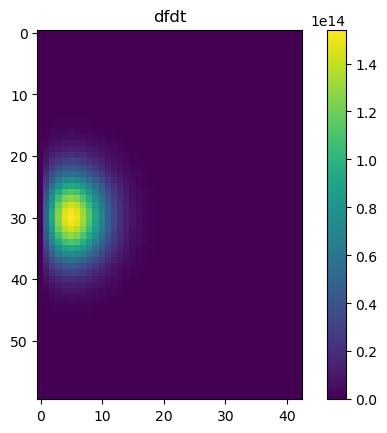

21
N
23559091990415.848 1.5862336014302022e+16
E
1.1676425181792846e+16 1.1908716836757658e+18


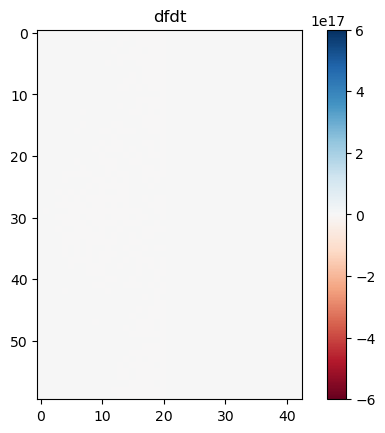

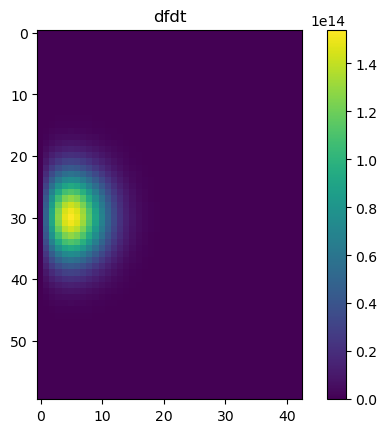

22
N
11621713355568.271 1.586233601430202e+16
E
6217141206759011.0 1.1916439301545295e+18


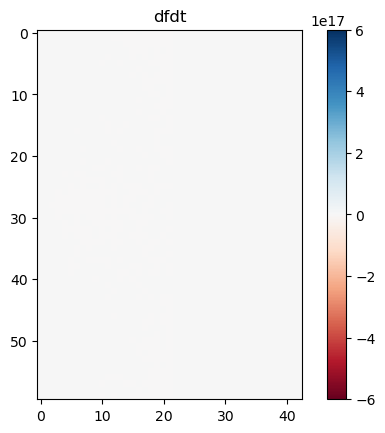

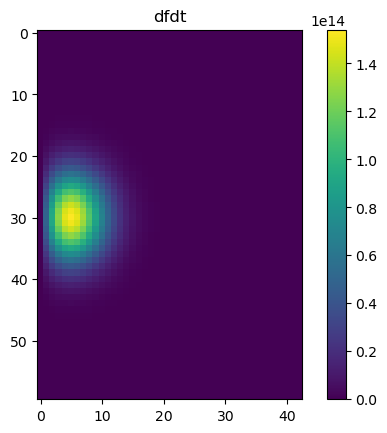

23
N
4866171840688.039 1.586233601430202e+16
E
2837275695603983.0 1.1920238698222083e+18


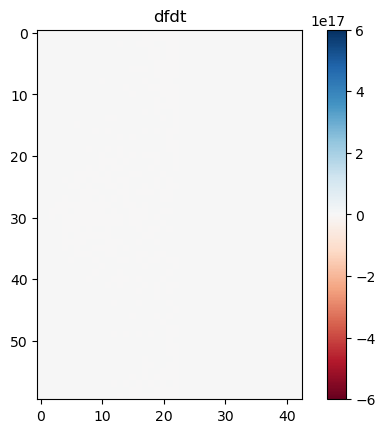

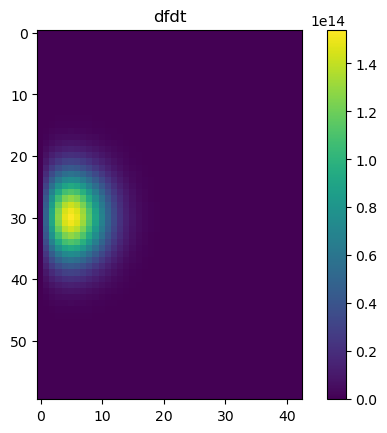

24
N
1986168246129.2827 1.5862336014302018e+16
E
1252360772786198.8 1.1922020996147113e+18


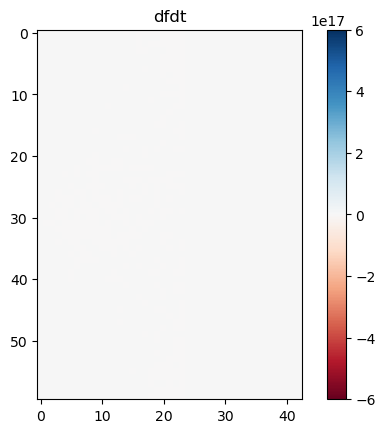

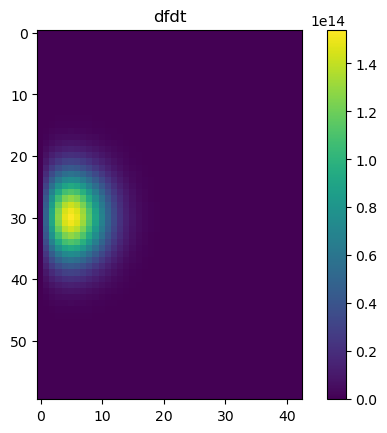

25
N
873895704444.5933 1.5862336014302022e+16
E
591738766208596.1 1.1922818762454505e+18


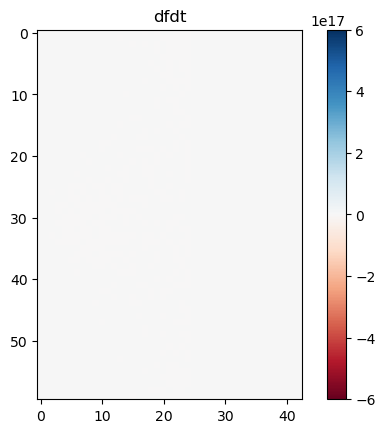

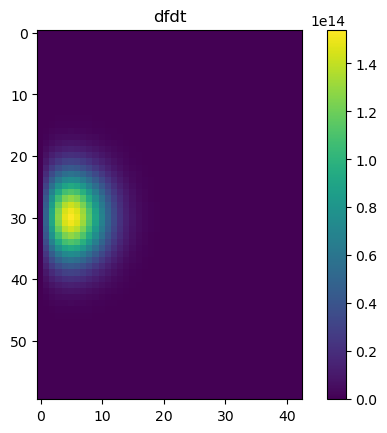

26
N
312278489608.69165 1.5862336014302018e+16
E
228053680545921.0 1.1923159707005612e+18


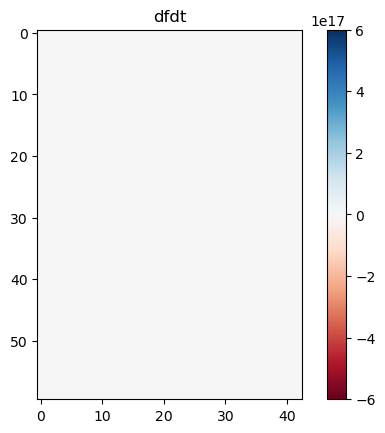

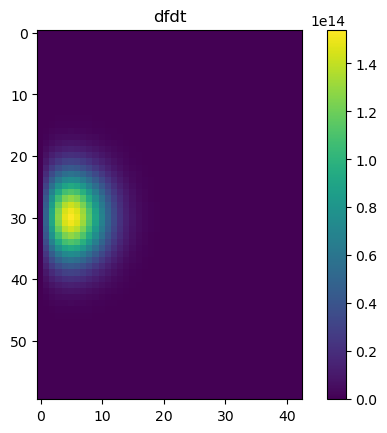

27
N
119391255773.61212 1.5862336014302022e+16
E
93101599174234.84 1.1923298910848476e+18


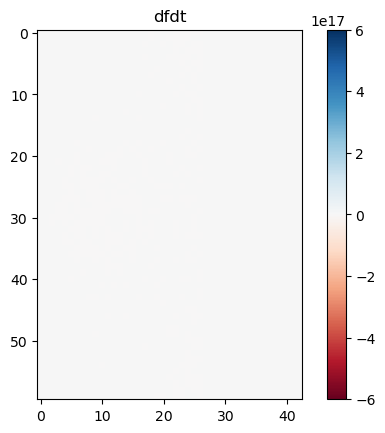

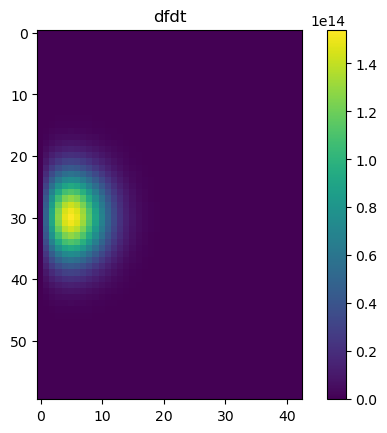

28
N
46419264983.47597 1.5862336014302022e+16
E
38574070570588.38 1.1923353235027052e+18


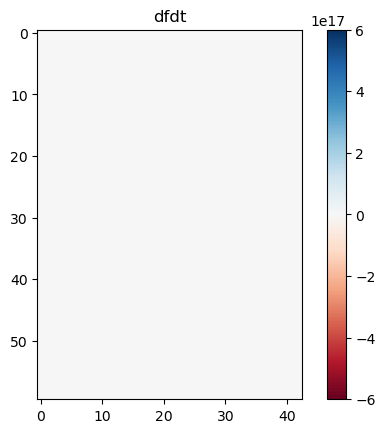

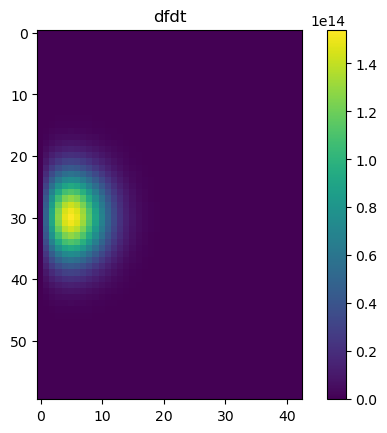

29
N
14147768238.28443 1.5862336014302022e+16
E
12615572962060.062 1.1923373507070833e+18


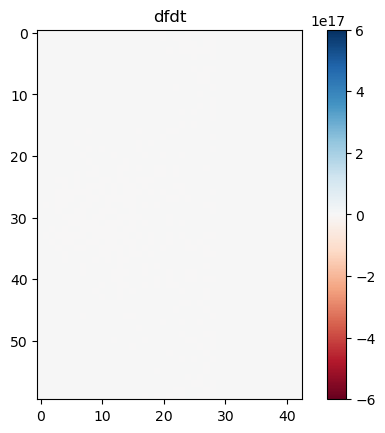

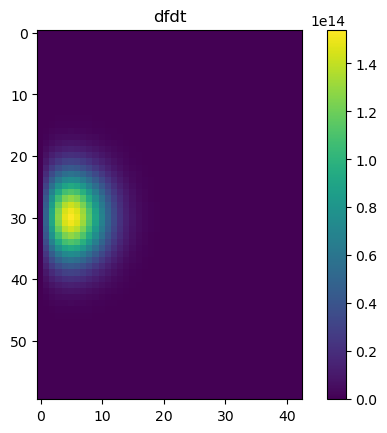

1e+18
10
N
5.4558723907969734e+17 1.5862336014302022e+17
E
8.024747062761087e+19 9.097739718031257e+18


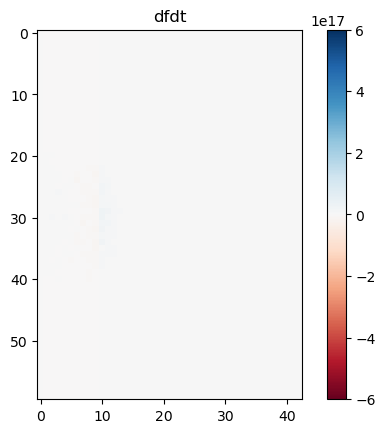

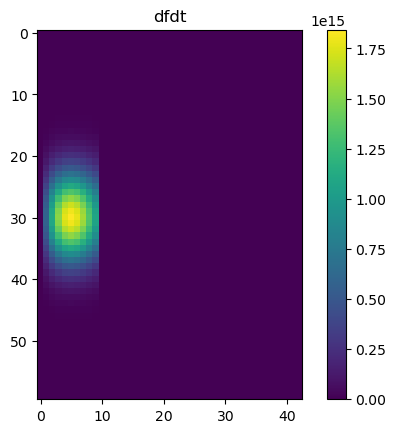

11
N
4.078996344019965e+17 1.586233601430202e+17
E
6.915581838982285e+19 9.752581457390193e+18


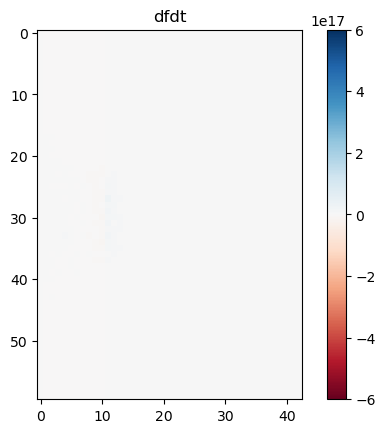

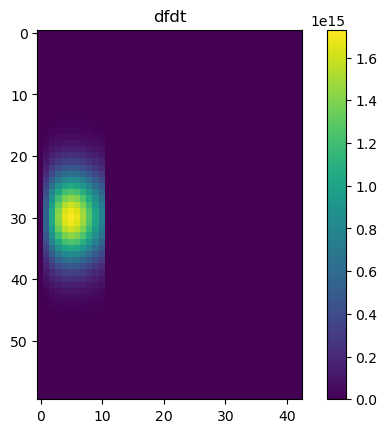

12
N
2.92096075566845e+17 1.5862336014302022e+17
E
5.632666666878398e+19 1.0318932873592812e+19


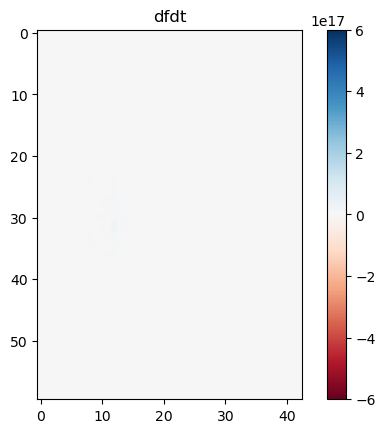

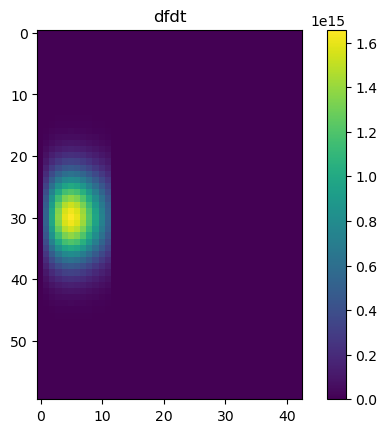

13
N
2.0835406754794528e+17 1.5862336014302022e+17
E
4.5765009283137544e+19 1.0785066391139731e+19


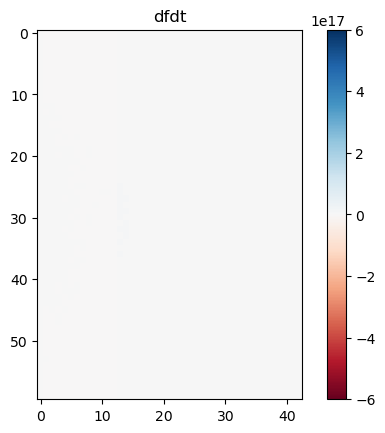

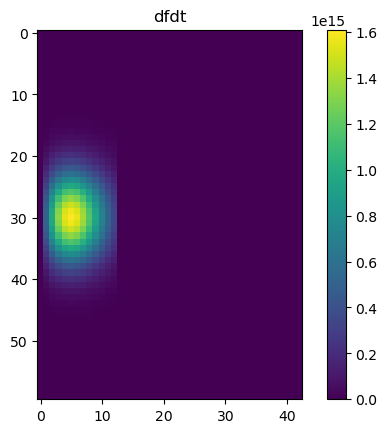

14
N
1.4830126035853014e+17 1.586233601430202e+17
E
3.6495179490324484e+19 1.1149584724620917e+19


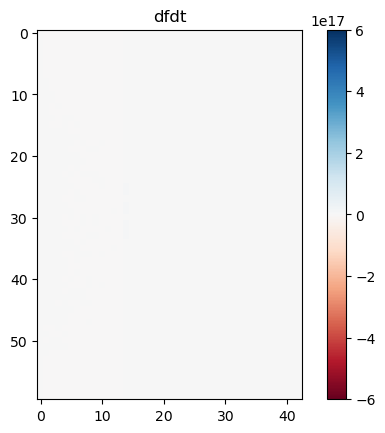

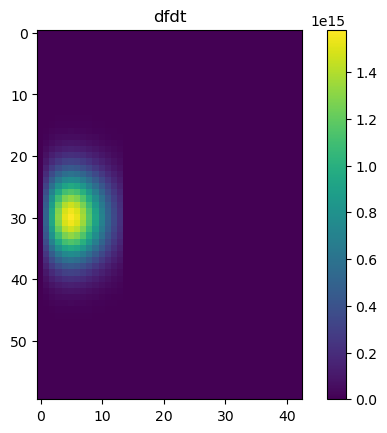

15
N
9.169194445497211e+16 1.5862336014302026e+17
E
2.5291956247718384e+19 1.142009668085274e+19


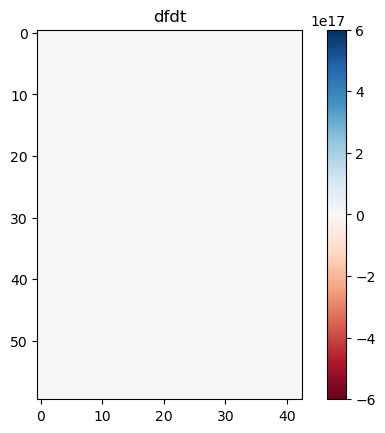

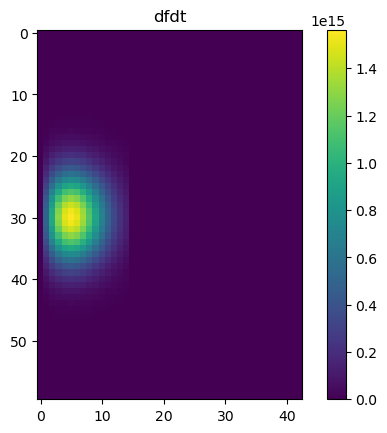

16
N
5.99423698559795e+16 1.5862336014302022e+17
E
1.8370628660655229e+19 1.161047167019746e+19


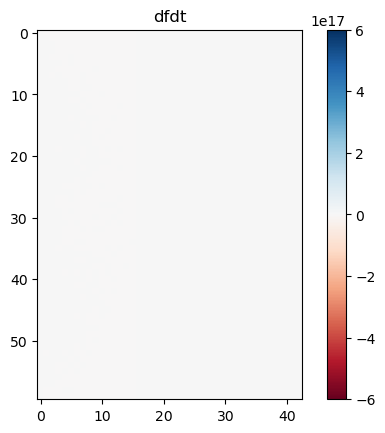

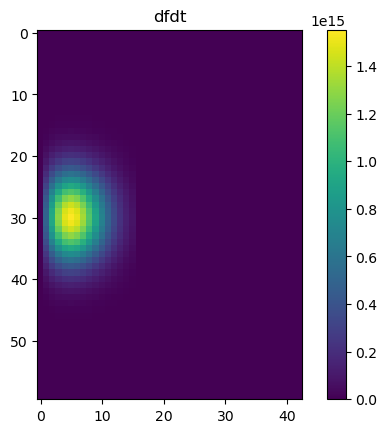

17
N
3.390660701545058e+16 1.586233601430203e+17
E
1.1519683085179777e+19 1.1737506418808324e+19


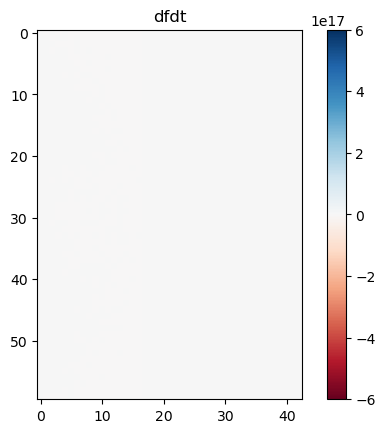

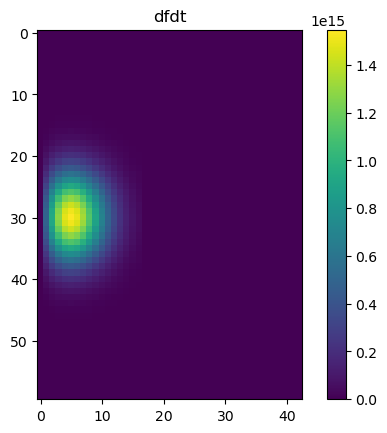

18
N
1.7954062545099616e+16 1.5862336014302026e+17
E
6.774079570640702e+18 1.18179074755862e+19


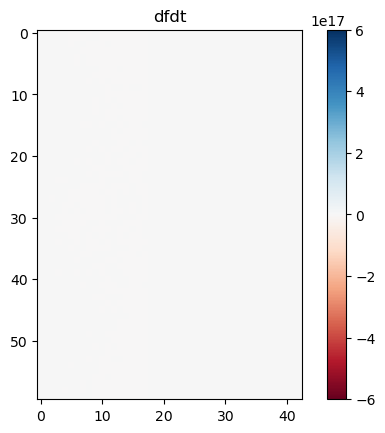

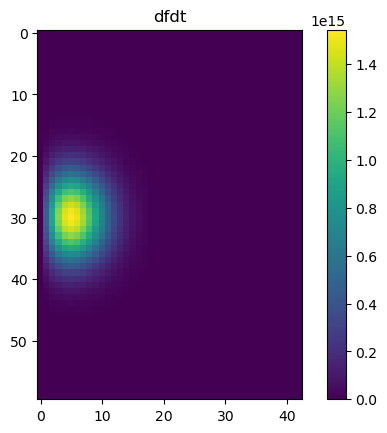

19
N
9742172556182094.0 1.5862336014302026e+17
E
4.033657129512517e+18 1.186620407627752e+19


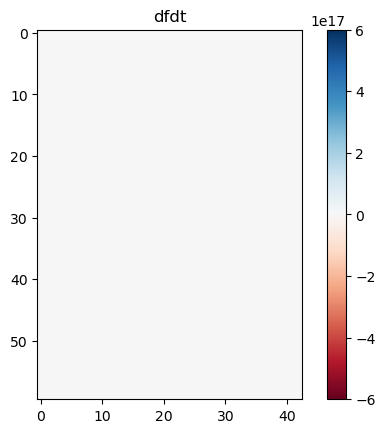

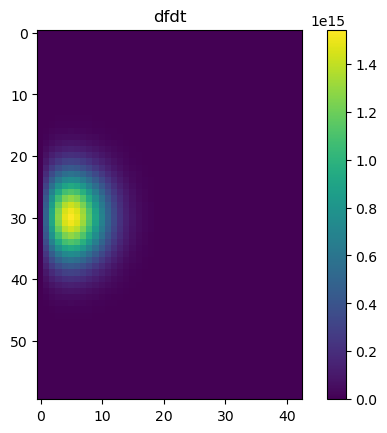

20
N
5052006035907299.0 1.5862336014302026e+17
E
2.3076170873472824e+18 1.189376341249287e+19


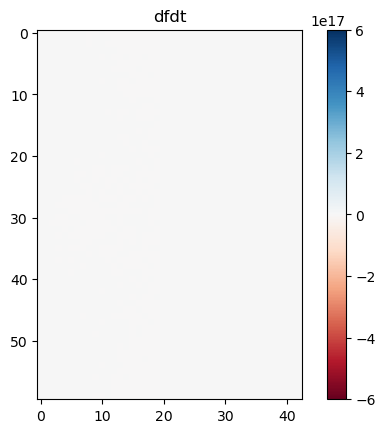

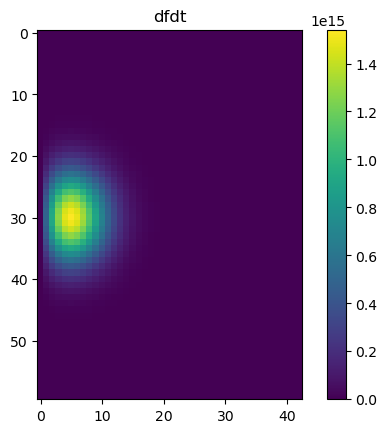

21
N
2333830495966047.0 1.5862336014302022e+17
E
1.160048032960597e+18 1.1908716836757664e+19


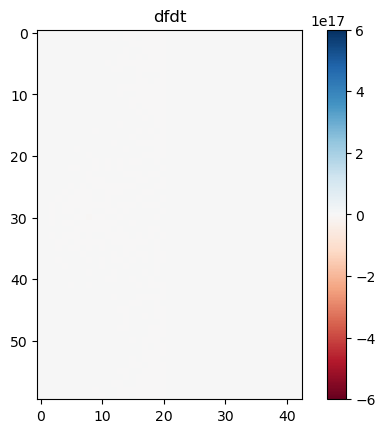

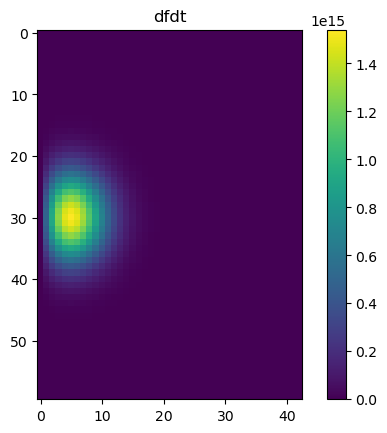

22
N
1036212062133349.0 1.5862336014302032e+17
E
5.6008456123518445e+17 1.1916439301545302e+19


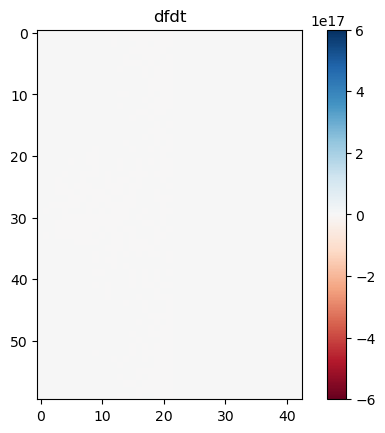

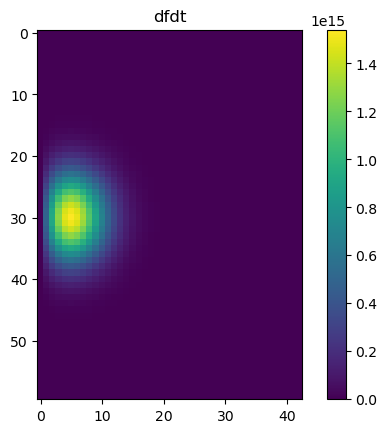

23
N
498669460307307.8 1.5862336014302026e+17
E
2.9056196940216525e+17 1.1920238698222088e+19


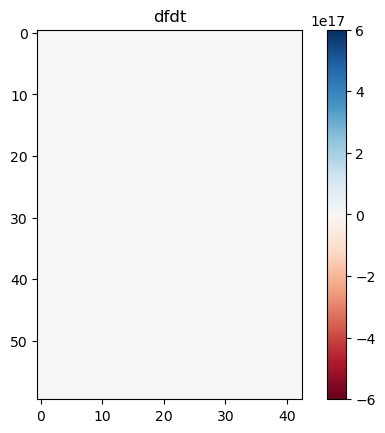

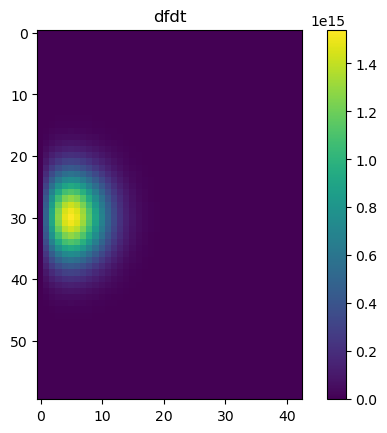

24
N
185315672664136.6 1.5862336014302026e+17
E
1.1716193863417675e+17 1.1922020996147114e+19


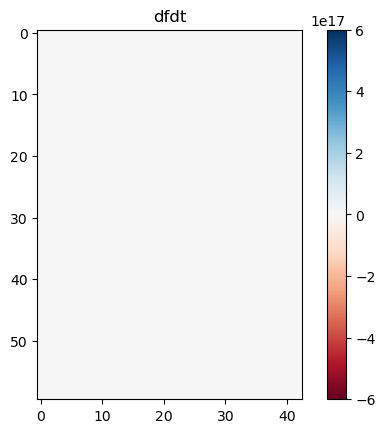

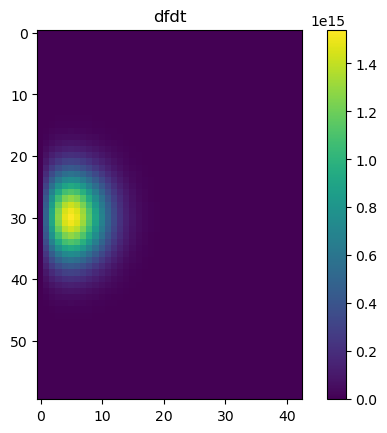

25
N
81618052599975.52 1.5862336014302022e+17
E
5.552093372364259e+16 1.1922818762454503e+19


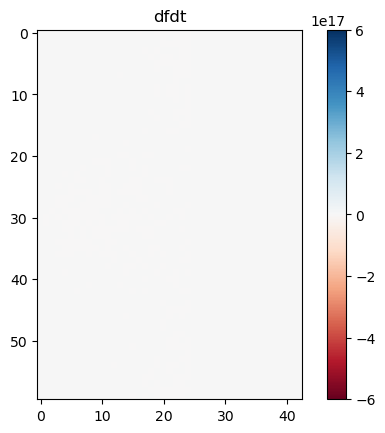

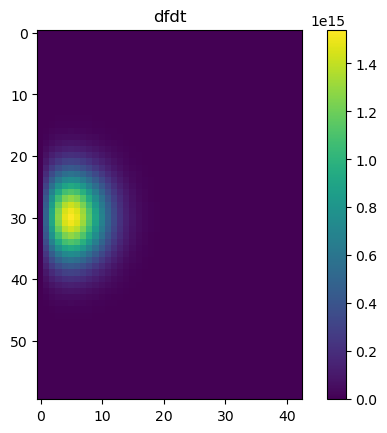

26
N
32460132311645.523 1.5862336014302016e+17
E
2.370485162746364e+16 1.1923159707005622e+19


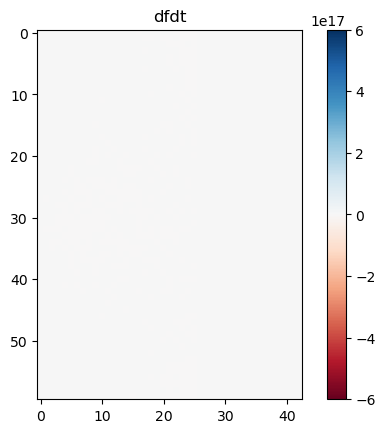

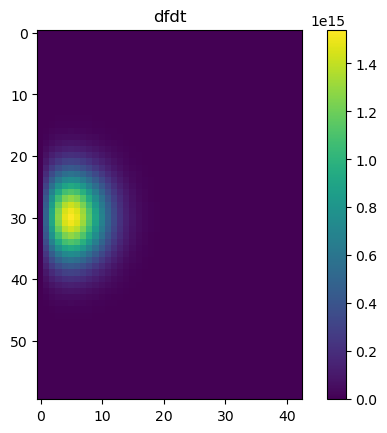

27
N
12315687695589.781 1.586233601430203e+17
E
9593148416224802.0 1.192329891084848e+19


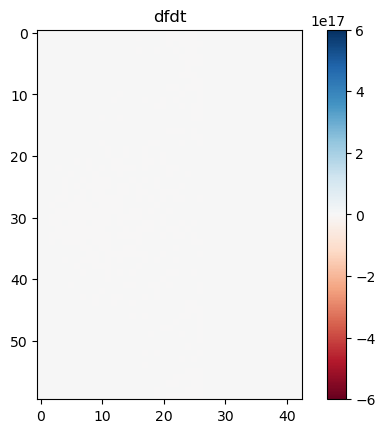

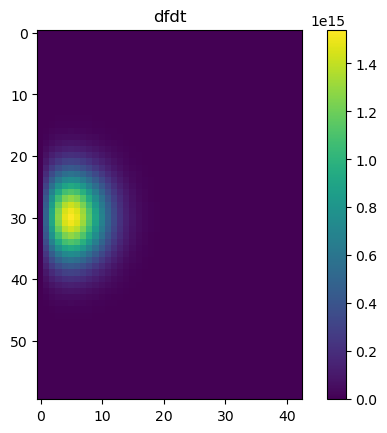

28
N
4133938663843.2847 1.5862336014302022e+17
E
3461641606650339.0 1.1923353235027046e+19


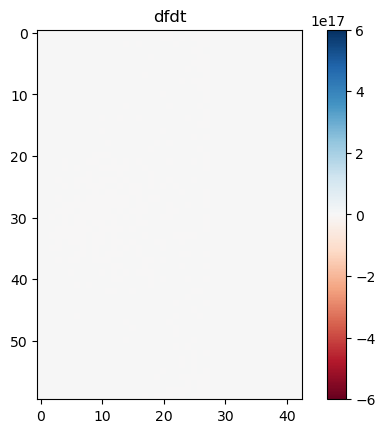

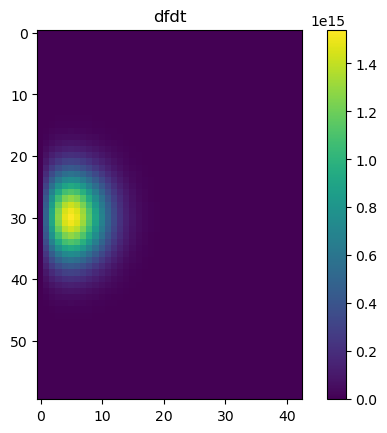

29
N
1440576917158.7363 1.586233601430203e+17
E
1289028525831896.2 1.1923373507070833e+19


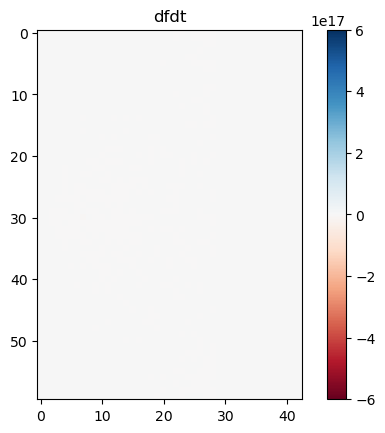

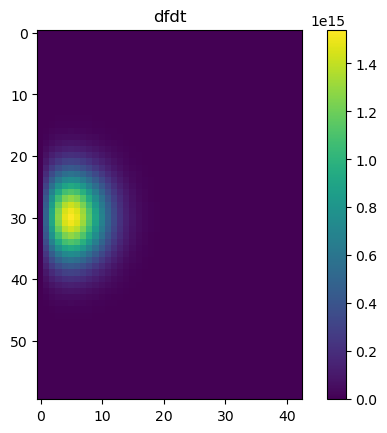

1e+19
10
N
5.743850365517208e+19 1.5862336014302019e+18
E
8.494347022104354e+21 9.09773971803125e+19


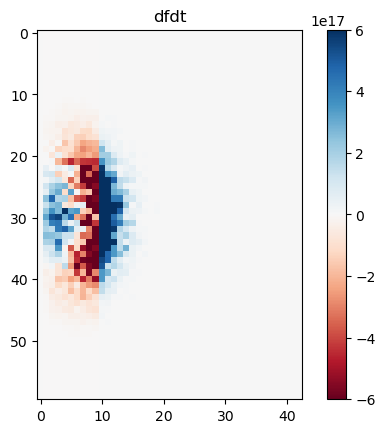

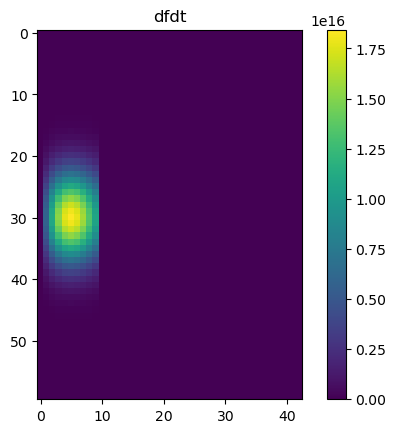

11
N
4.431771866558676e+19 1.5862336014302019e+18
E
7.413716548810858e+21 9.752581457390187e+19


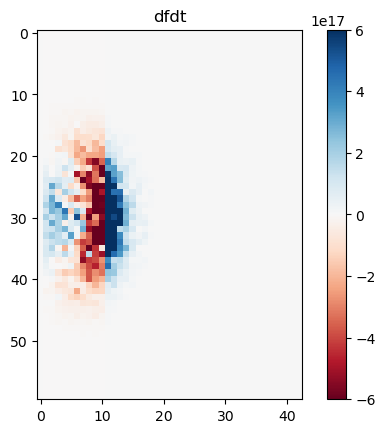

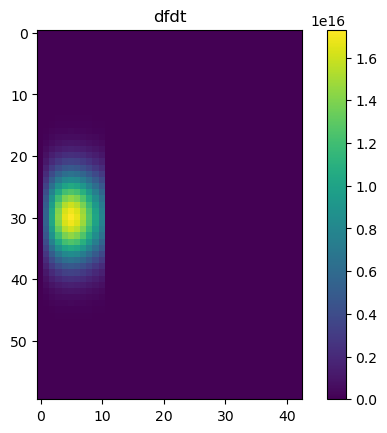

12
N
2.9460582161426657e+19 1.5862336014302016e+18
E
5.6575981521789e+21 1.0318932873592806e+20


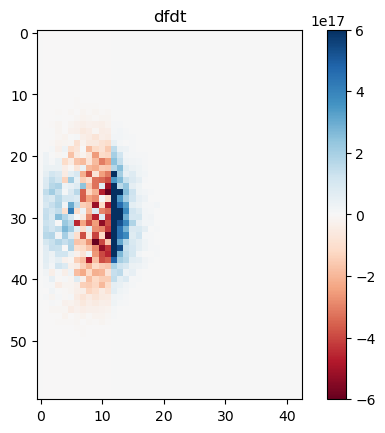

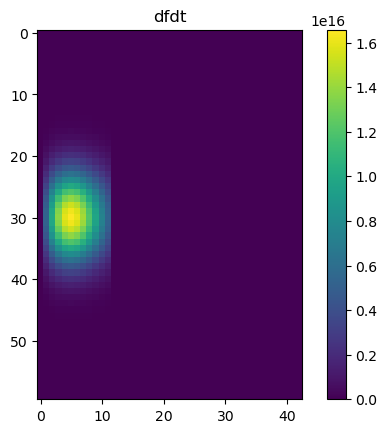

13
N
2.1259258456251605e+19 1.5862336014302016e+18
E
4.679249436783046e+21 1.0785066391139728e+20


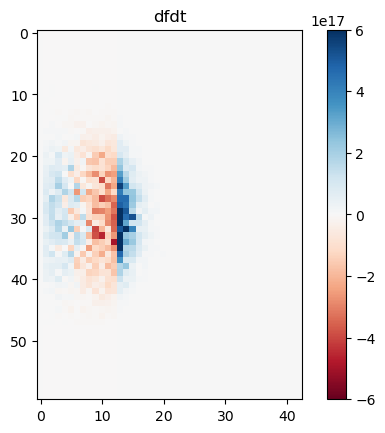

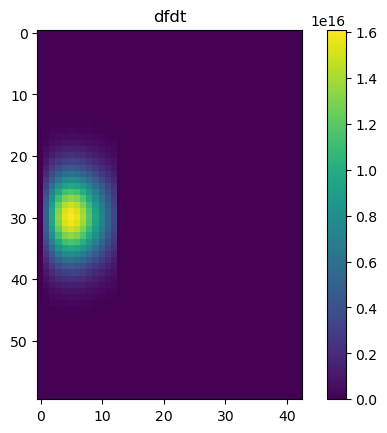

14
N
1.4320562819244507e+19 1.5862336014302019e+18
E
3.5130445395060903e+21 1.1149584724620909e+20


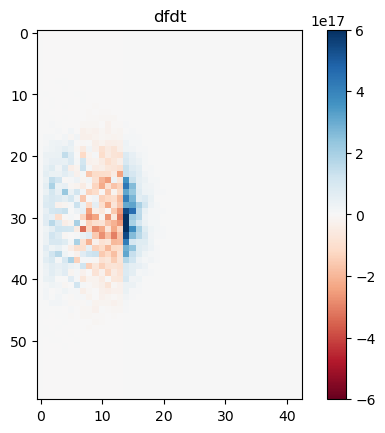

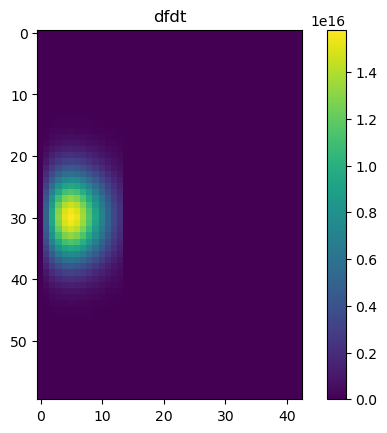

15
N
9.43557736247461e+18 1.5862336014302019e+18
E
2.599623772760345e+21 1.142009668085273e+20


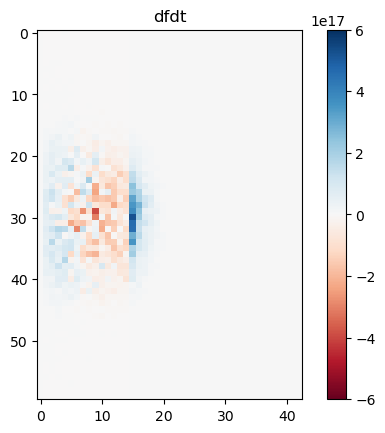

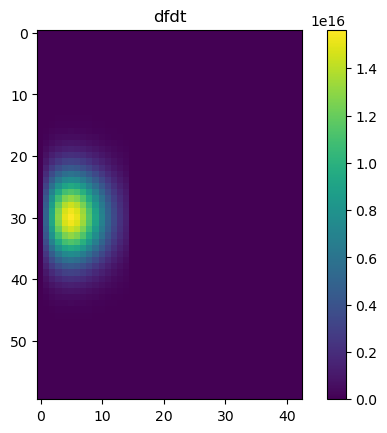

16
N
5.993085472079135e+18 1.5862336014302024e+18
E
1.8389332536664127e+21 1.161047167019746e+20


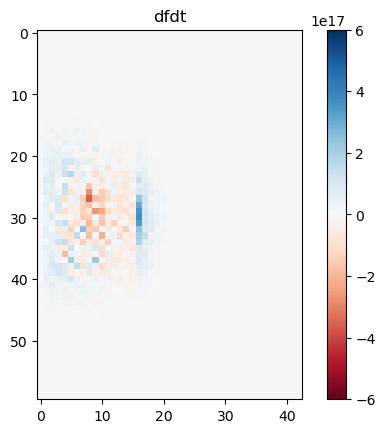

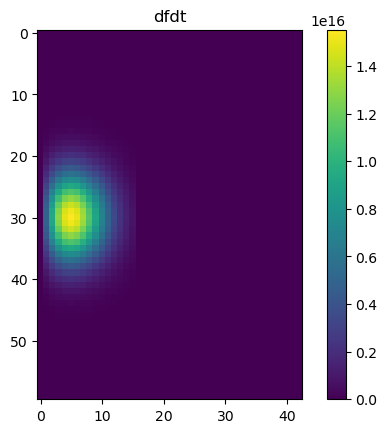

17
N
3.298964714094933e+18 1.586233601430202e+18
E
1.1291797376323533e+21 1.173750641880832e+20


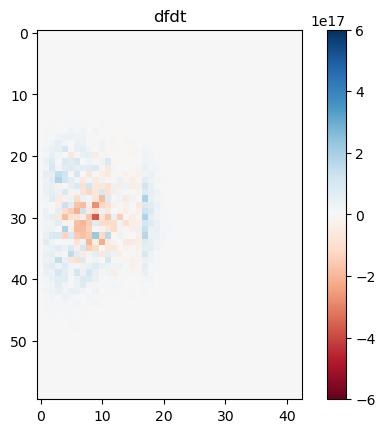

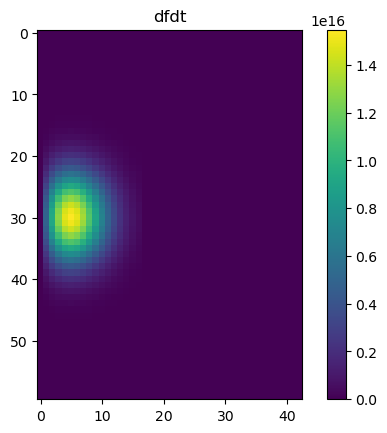

18
N
1.9235166091516022e+18 1.5862336014302024e+18
E
7.217361478278967e+20 1.1817907475586199e+20


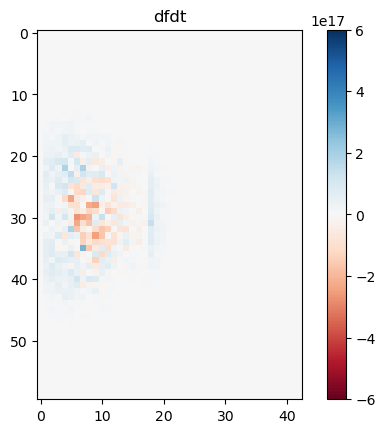

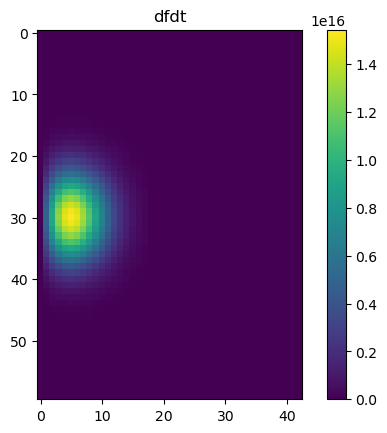

19
N
9.718945758434391e+17 1.586233601430202e+18
E
4.034499365030732e+20 1.1866204076277516e+20


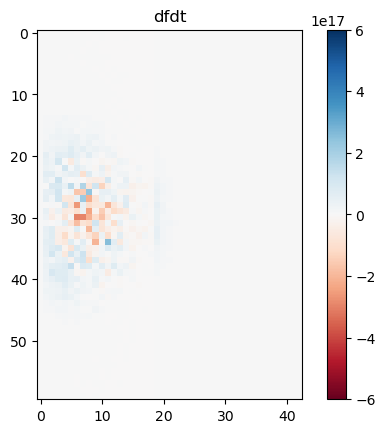

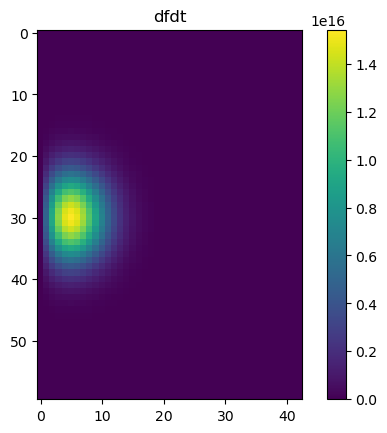

20
N
4.799879405062968e+17 1.5862336014302026e+18
E
2.181854513214766e+20 1.1893763412492871e+20


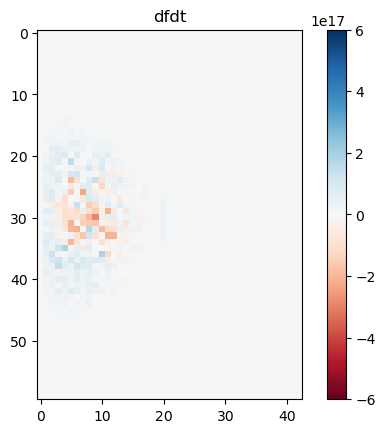

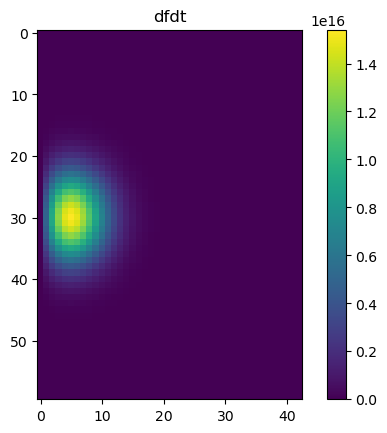

21
N
2.2732254274586397e+17 1.5862336014302024e+18
E
1.1234226082649149e+20 1.1908716836757663e+20


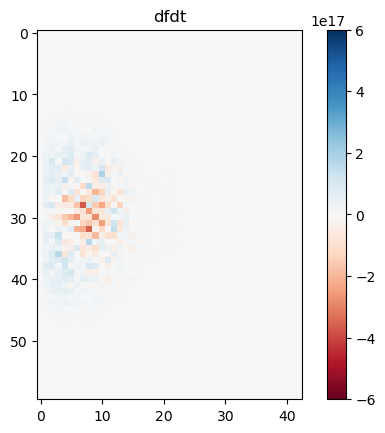

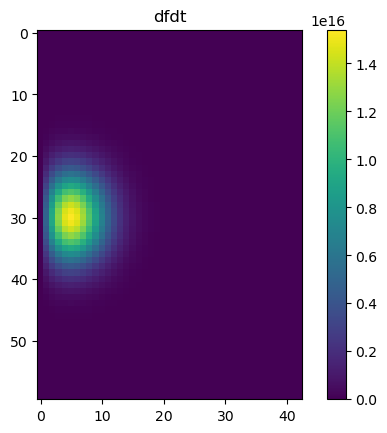

22
N
1.0988756069940387e+17 1.586233601430202e+18
E
5.9111464841286885e+19 1.19164393015453e+20


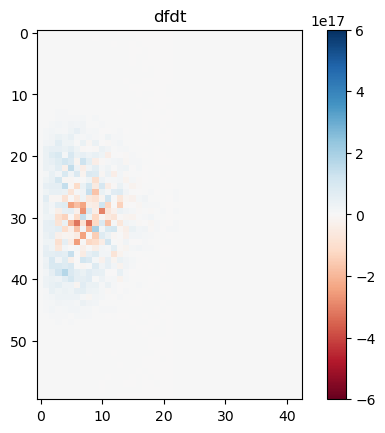

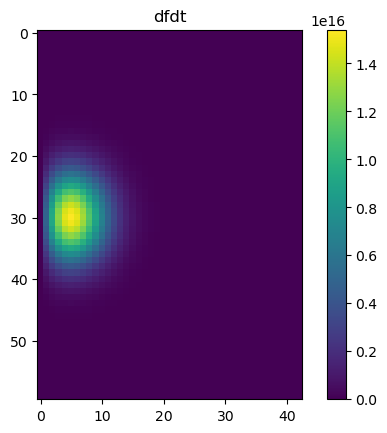

23
N
4.758747091549333e+16 1.586233601430202e+18
E
2.7685693270359253e+19 1.192023869822208e+20


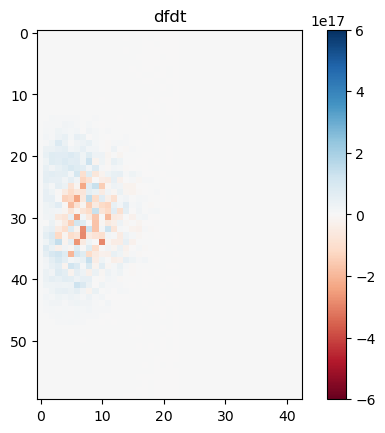

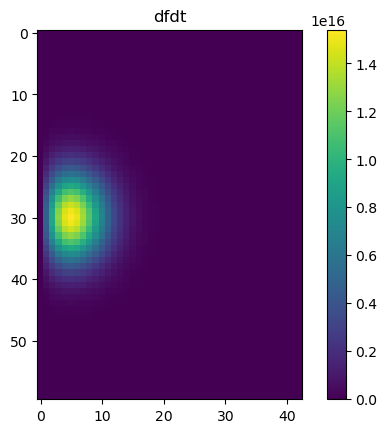

24
N
1.9920852241674324e+16 1.586233601430202e+18
E
1.257746298986949e+19 1.1922020996147113e+20


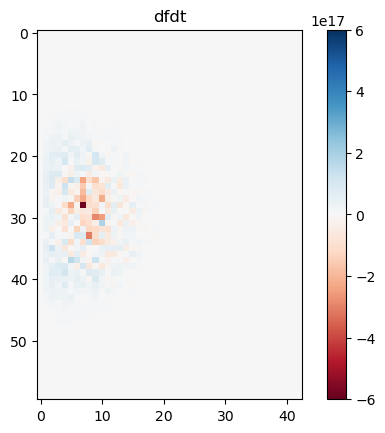

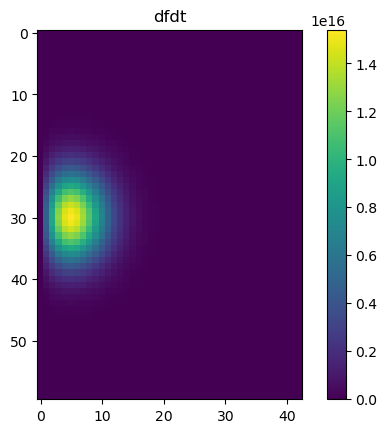

25
N
8184519210339454.0 1.5862336014302024e+18
E
5.549082353875495e+18 1.1922818762454509e+20


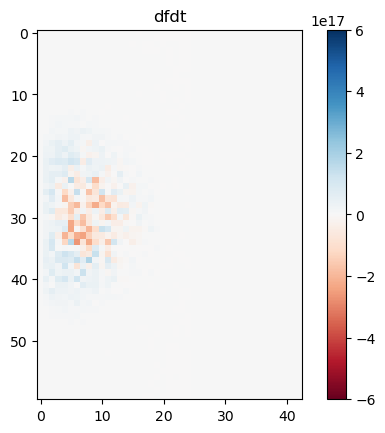

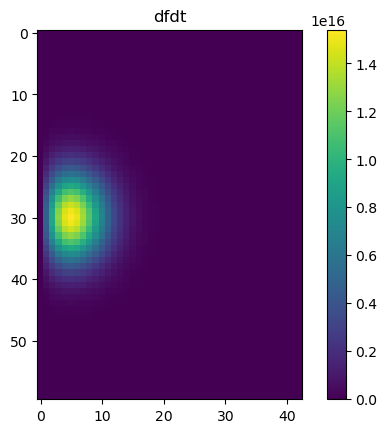

26
N
3499123601555549.0 1.5862336014302024e+18
E
2.5447408564557353e+18 1.1923159707005616e+20


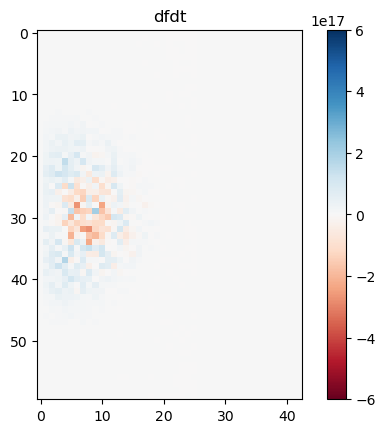

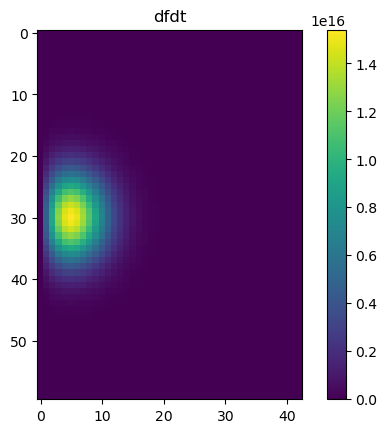

27
N
1147280107992846.0 1.5862336014302019e+18
E
8.96453506784813e+17 1.1923298910848473e+20


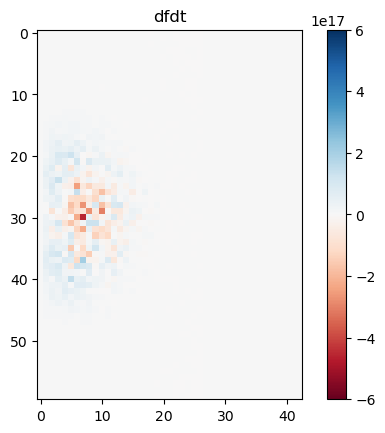

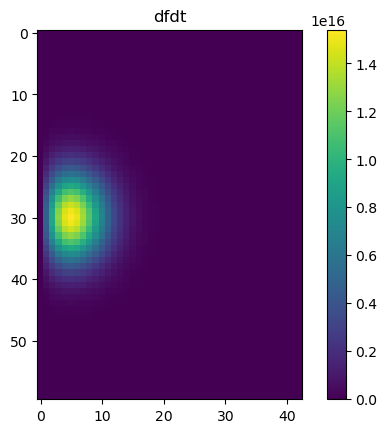

28
N
438329263161064.06 1.5862336014302024e+18
E
3.665397358552618e+17 1.1923353235027052e+20


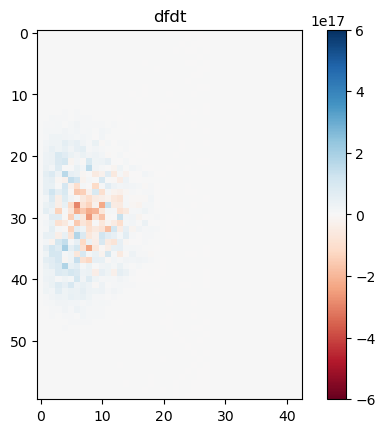

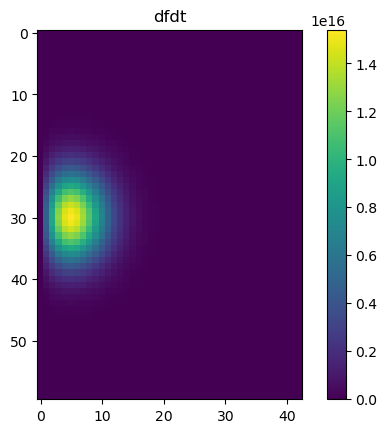

29
N
141818991580621.53 1.5862336014302026e+18
E
1.2625586721423371e+17 1.1923373507070835e+20


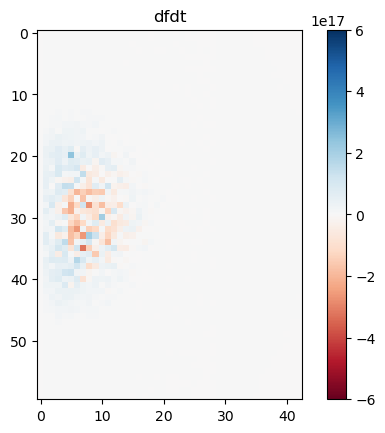

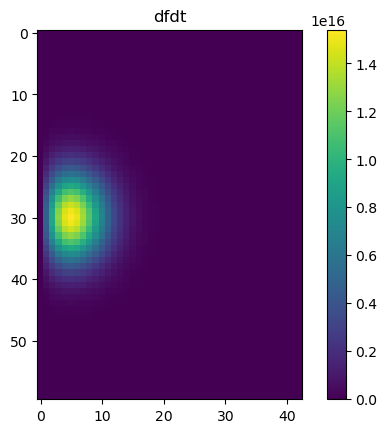

1e+20
10
N
5.714162114371556e+21 1.5862336014302028e+19
E
8.354293590009782e+23 9.097739718031258e+20


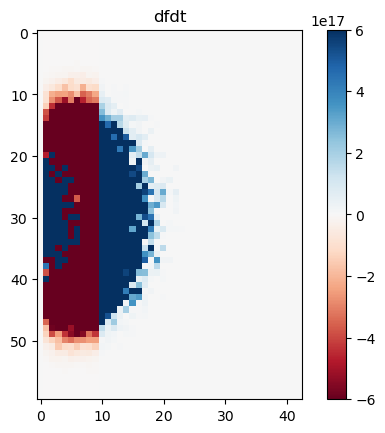

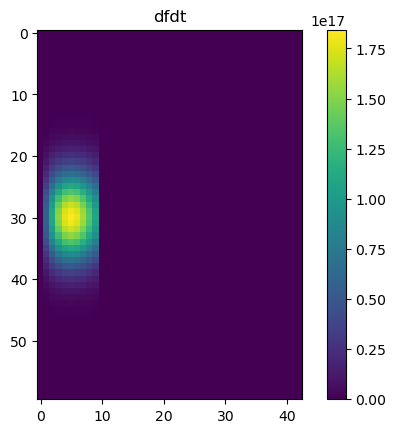

11
N
4.028698584989848e+21 1.5862336014302028e+19
E
6.774370771433895e+23 9.752581457390194e+20


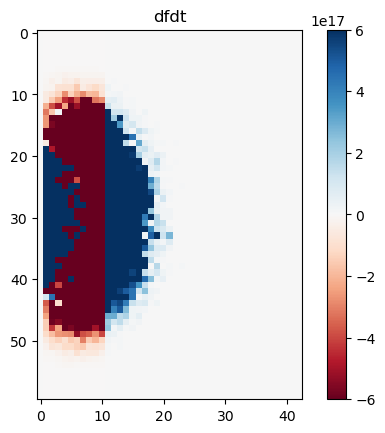

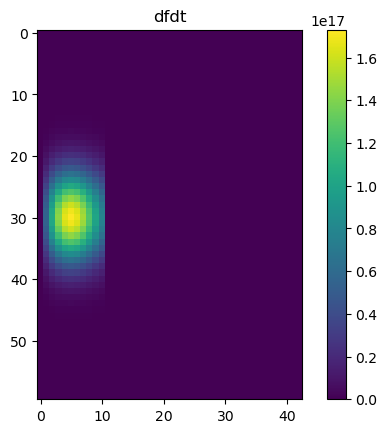

12
N
3.020974024711042e+21 1.5862336014302026e+19
E
5.787399742473686e+23 1.031893287359281e+21


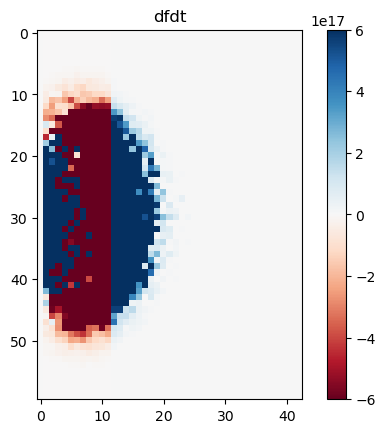

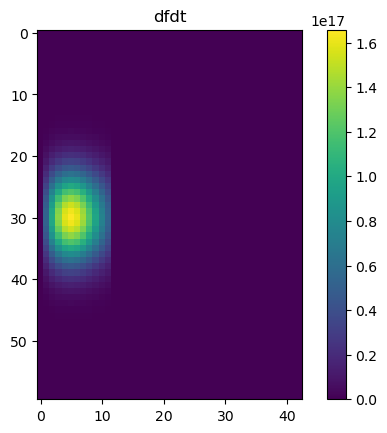

13
N
2.2085599370811584e+21 1.5862336014302026e+19
E
4.826269825576326e+23 1.0785066391139735e+21


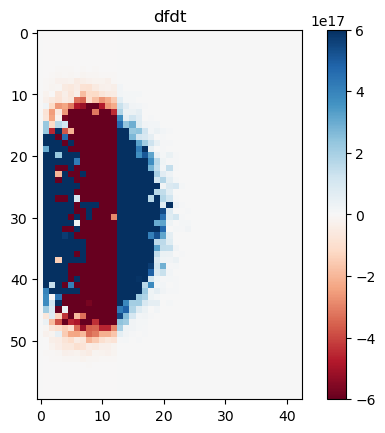

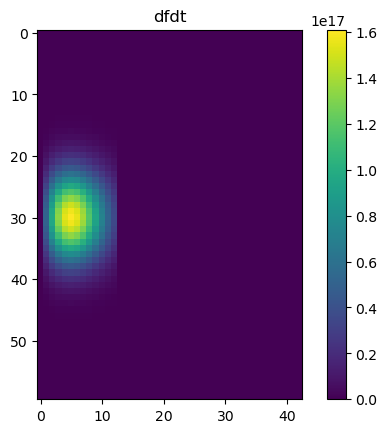

14
N
1.4223099790832045e+21 1.5862336014302026e+19
E
3.479228096049662e+23 1.1149584724620922e+21


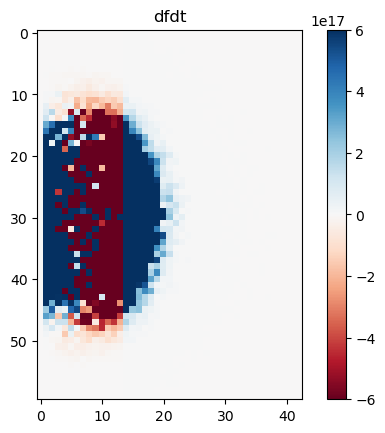

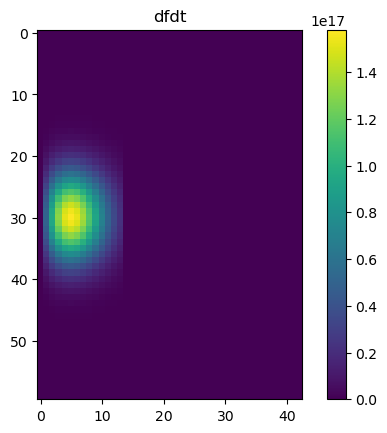

15
N
9.038621431385399e+20 1.5862336014302022e+19
E
2.5044940315577234e+23 1.1420096680852739e+21


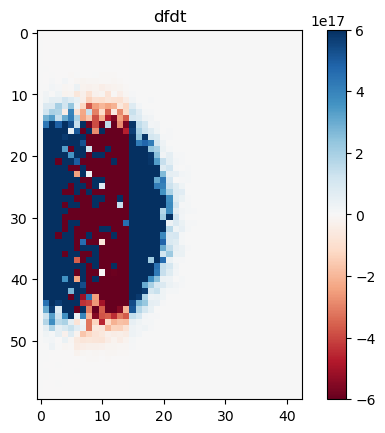

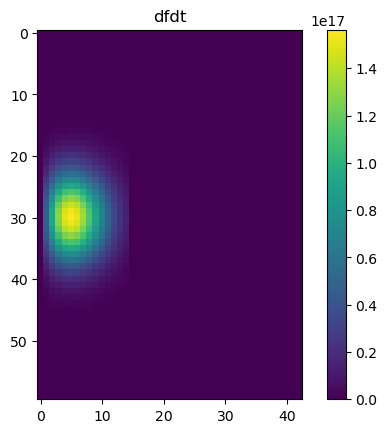

16
N
5.8593184880088246e+20 1.5862336014302026e+19
E
1.8048792979626264e+23 1.1610471670197461e+21


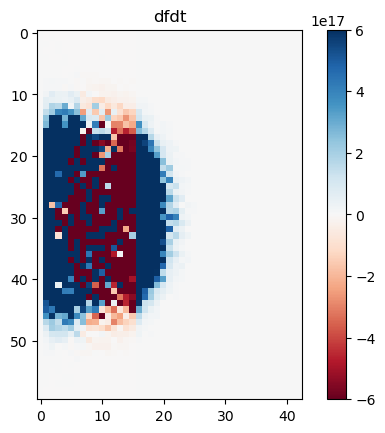

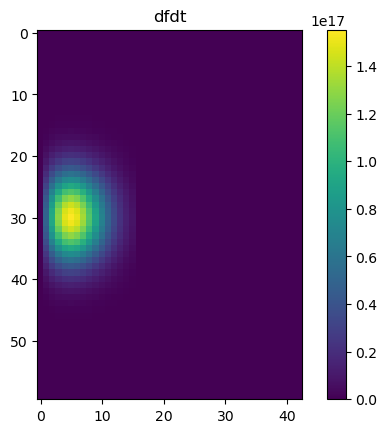

17
N
3.3858657277282864e+20 1.5862336014302028e+19
E
1.1581800542568442e+23 1.1737506418808328e+21


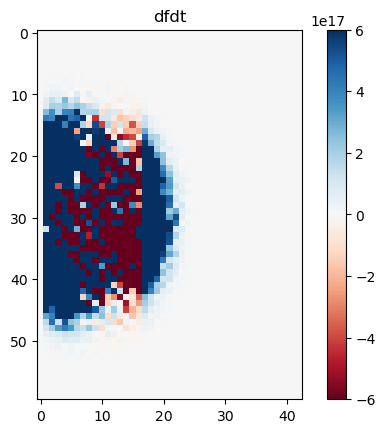

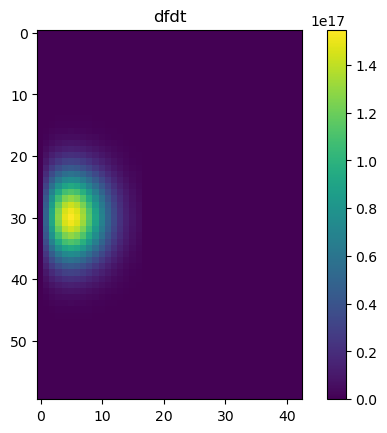

18
N
2.0455485391841175e+20 1.5862336014302024e+19
E
7.64275053236448e+22 1.1817907475586202e+21


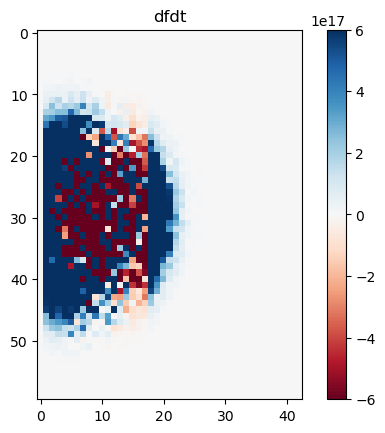

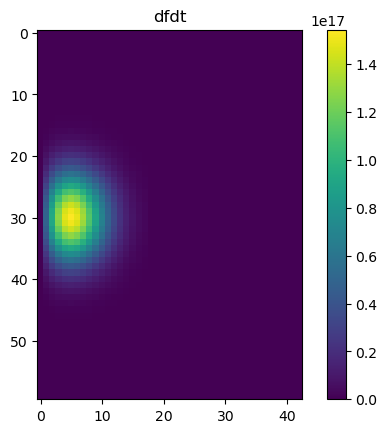

19
N
9.716017833025815e+19 1.5862336014302026e+19
E
4.02817006217115e+22 1.186620407627752e+21


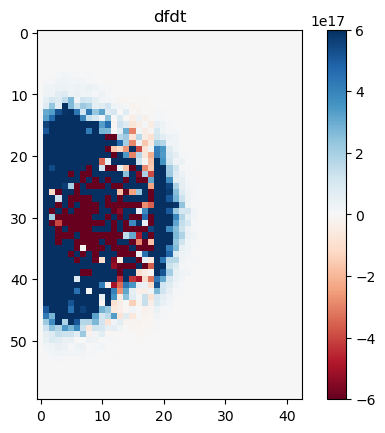

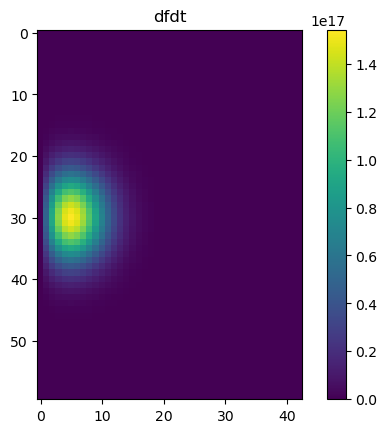

20
N
4.897362291261253e+19 1.5862336014302022e+19
E
2.2157259931980222e+22 1.189376341249287e+21


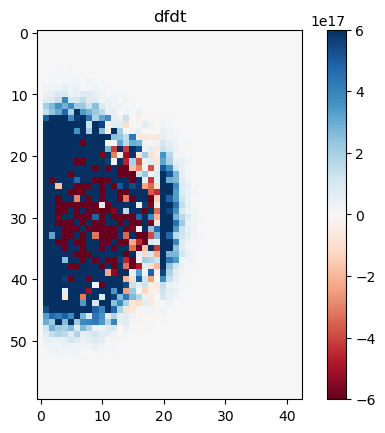

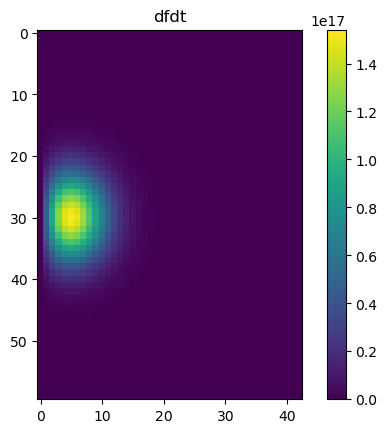

21
N
2.379725300489963e+19 1.5862336014302026e+19
E
1.1767901023707878e+22 1.1908716836757664e+21


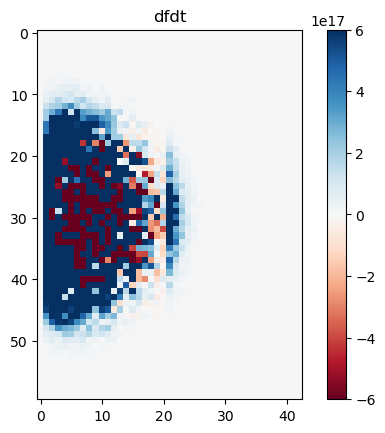

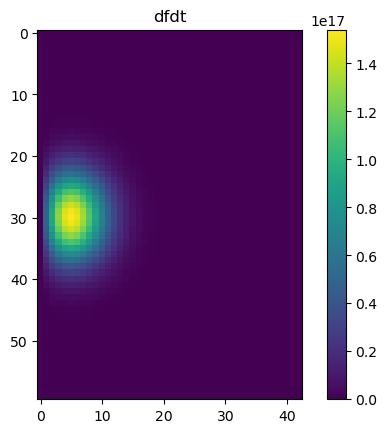

22
N
1.033007215783295e+19 1.5862336014302028e+19
E
5.576056745089054e+21 1.19164393015453e+21


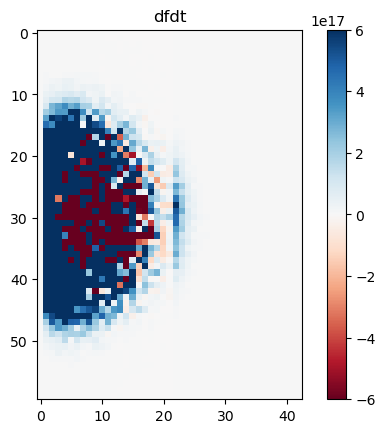

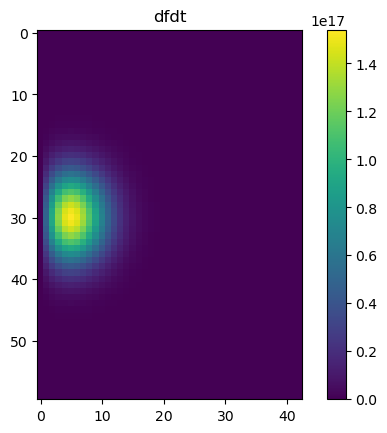

23
N
4.718612737912067e+18 1.5862336014302024e+19
E
2.747832759086742e+21 1.1920238698222086e+21


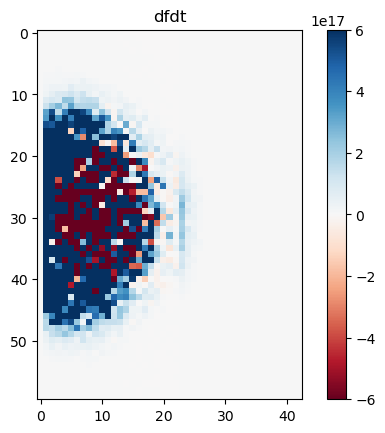

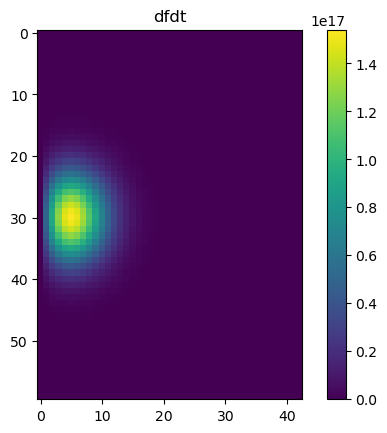

24
N
2.055094925077011e+18 1.5862336014302022e+19
E
1.2901785334966001e+21 1.1922020996147118e+21


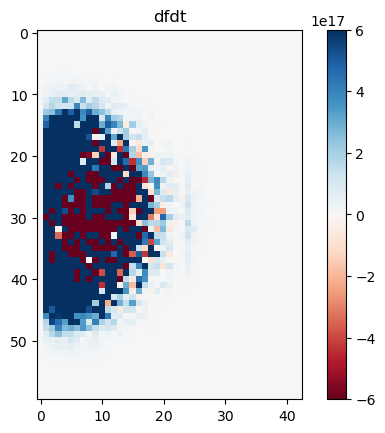

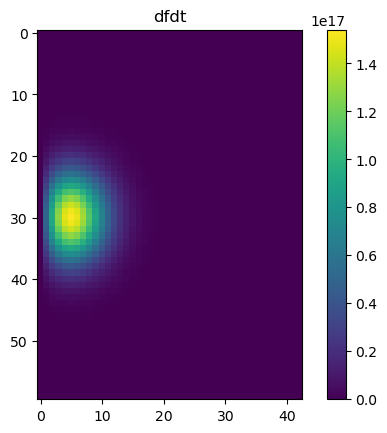

25
N
8.009483746490208e+17 1.5862336014302024e+19
E
5.4455396355606485e+20 1.1922818762454509e+21


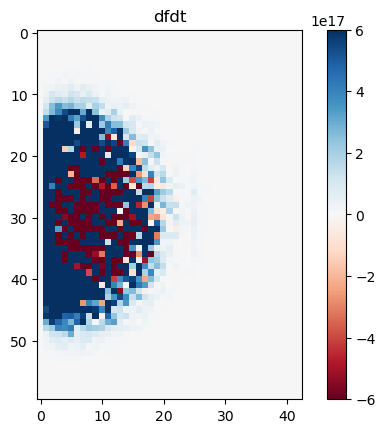

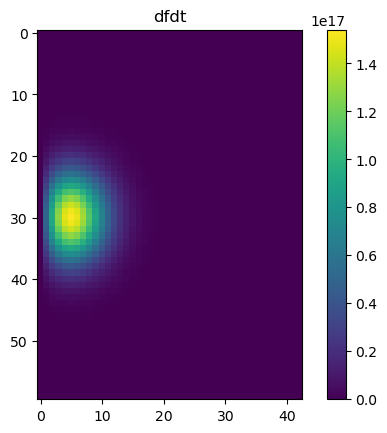

26
N
3.346807495917276e+17 1.5862336014302024e+19
E
2.4333935678975204e+20 1.1923159707005616e+21


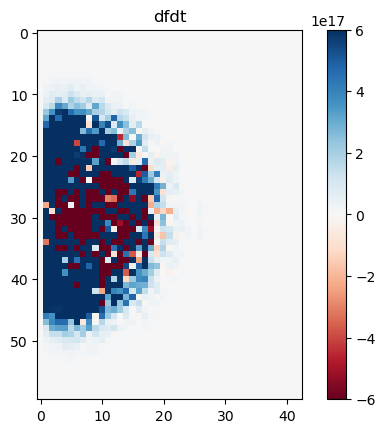

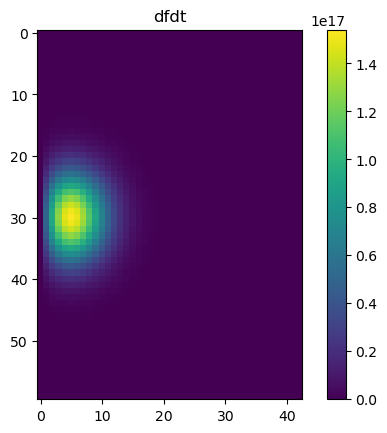

27
N
1.2168612158036658e+17 1.5862336014302028e+19
E
9.48883267958306e+19 1.1923298910848475e+21


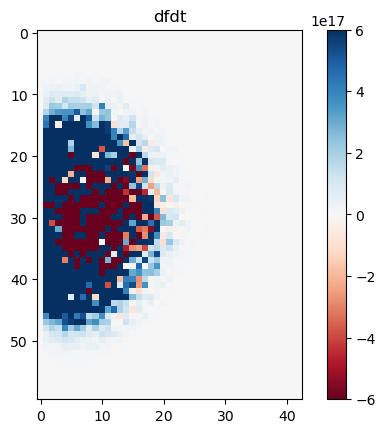

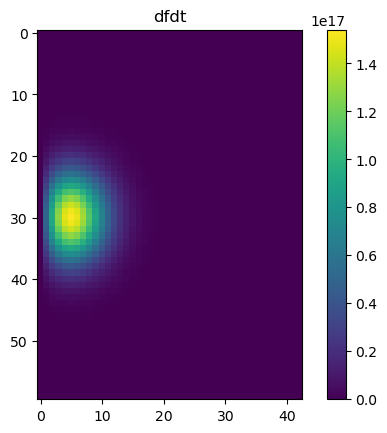

28
N
4.304040781218388e+16 1.5862336014302024e+19
E
3.602289180240618e+19 1.1923353235027049e+21


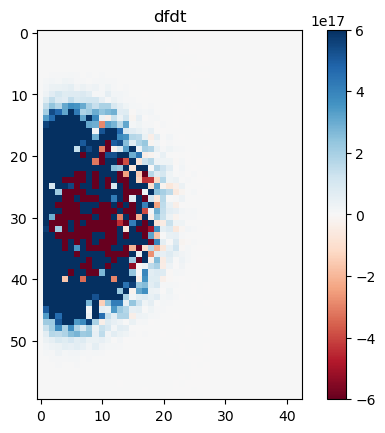

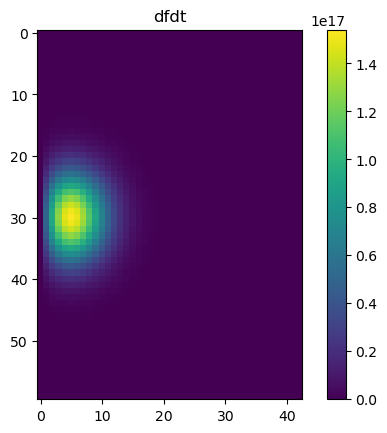

29
N
1.4814834941138504e+16 1.586233601430202e+19
E
1.3180474640240843e+19 1.1923373507070835e+21


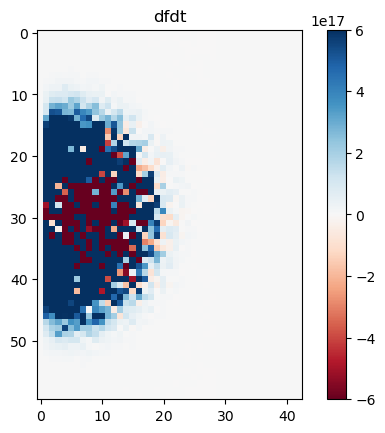

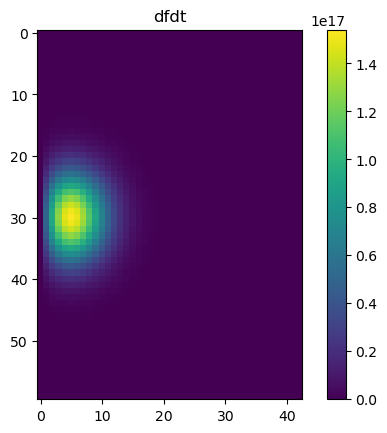

1e+21
10
N
5.278165272033033e+23 1.5862336014302023e+20
E
7.855460497386605e+25 9.097739718031253e+21


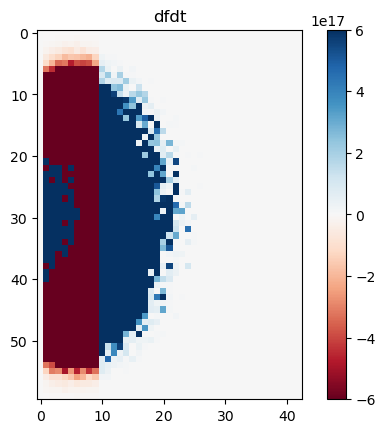

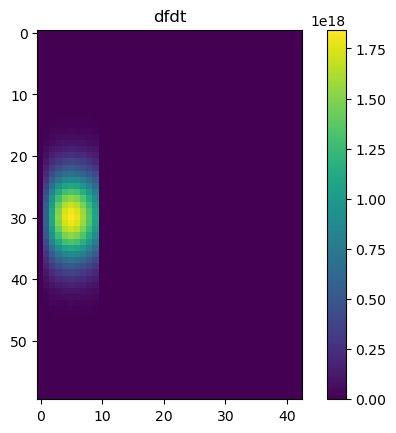

11
N
4.1442467947706955e+23 1.5862336014302023e+20
E
6.955985544398503e+25 9.752581457390191e+21


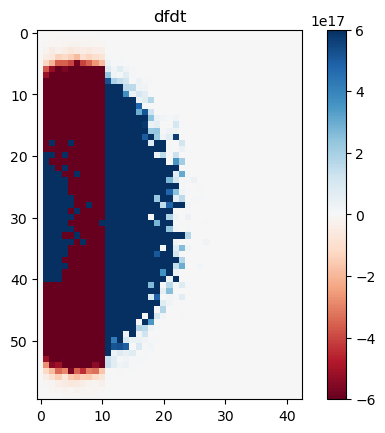

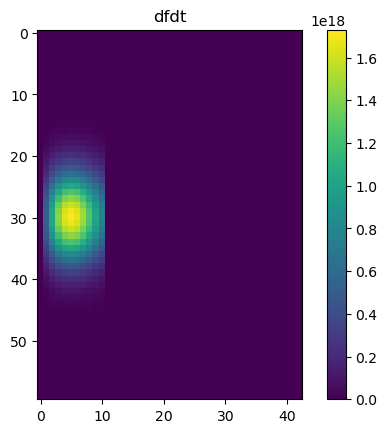

12
N
3.077289719119573e+23 1.5862336014302023e+20
E
5.984832771637247e+25 1.0318932873592808e+22


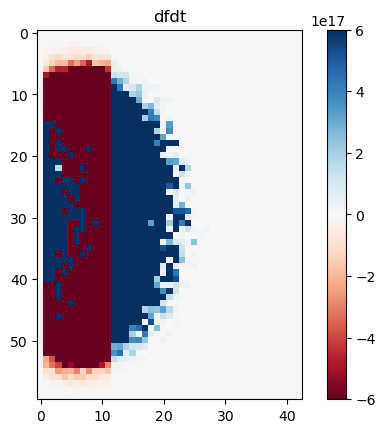

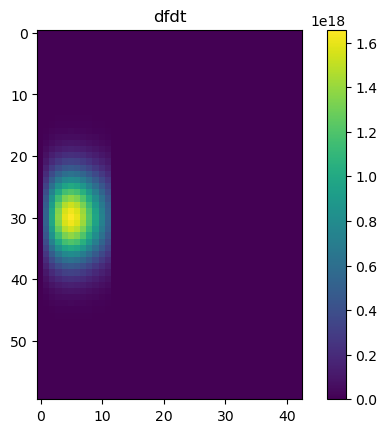

13
N
2.1392829750422386e+23 1.5862336014302026e+20
E
4.700786812396113e+25 1.0785066391139735e+22


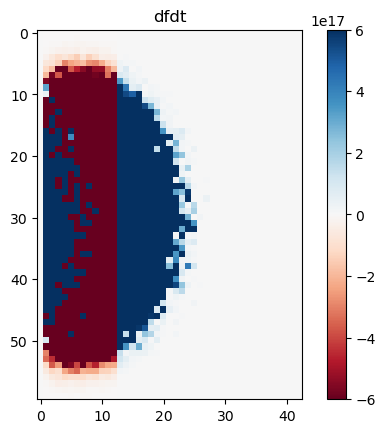

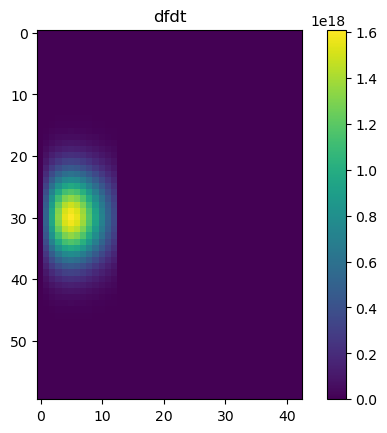

14
N
1.3515307683801617e+23 1.586233601430202e+20
E
3.3619763969675046e+25 1.1149584724620915e+22


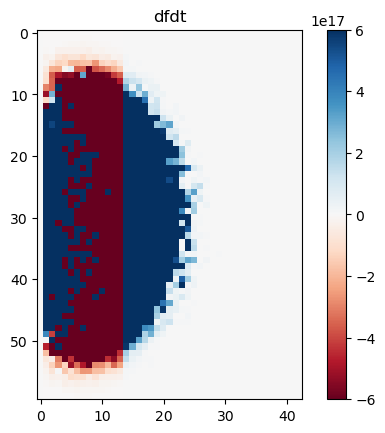

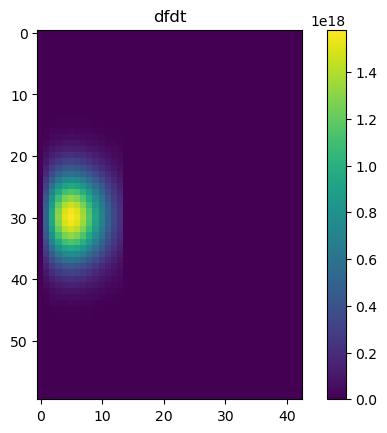

15
N
9.00179519234178e+22 1.586233601430202e+20
E
2.503825816993032e+25 1.1420096680852734e+22


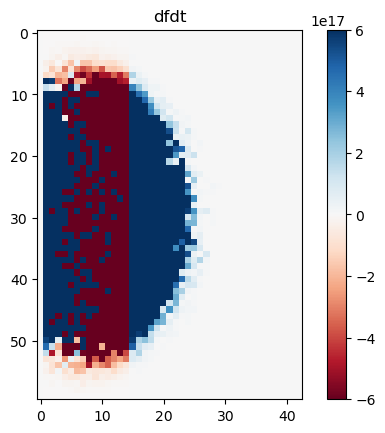

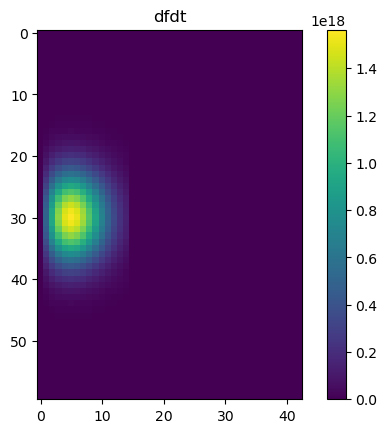

16
N
5.734317807122835e+22 1.5862336014302023e+20
E
1.766086375758565e+25 1.161047167019746e+22


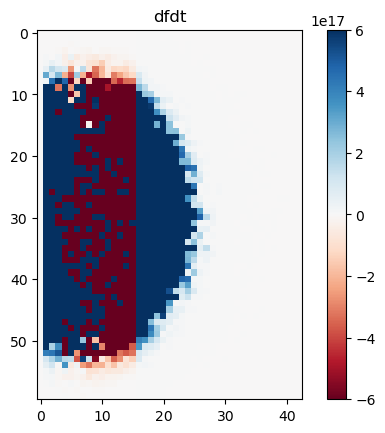

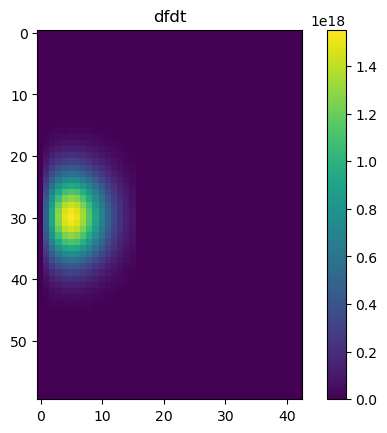

17
N
3.3141952401423794e+22 1.586233601430202e+20
E
1.1312215127844465e+25 1.173750641880832e+22


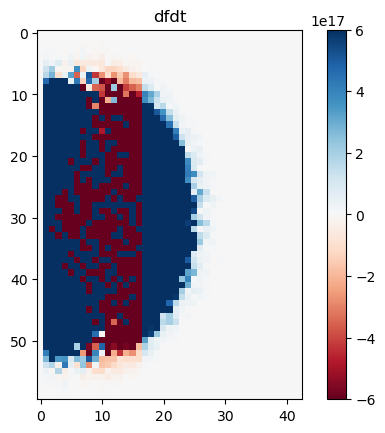

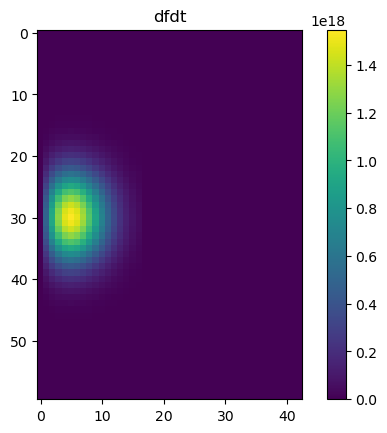

18
N
1.6754875507166035e+22 1.586233601430202e+20
E
6.368255793914092e+24 1.1817907475586195e+22


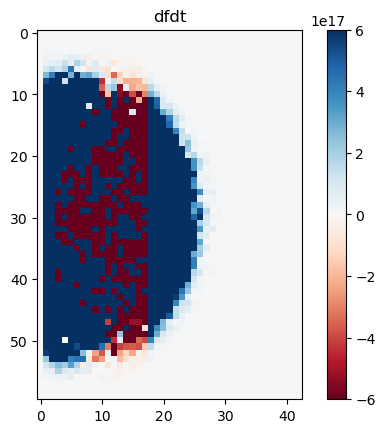

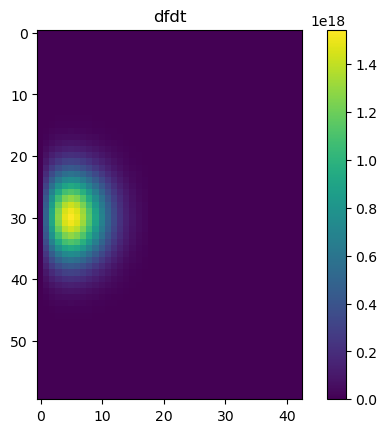

19
N
9.956791482310344e+21 1.5862336014302016e+20
E
4.107307122985515e+24 1.1866204076277515e+22


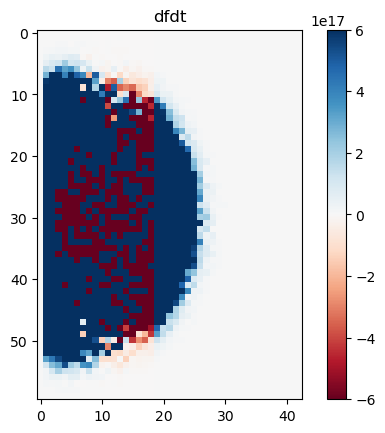

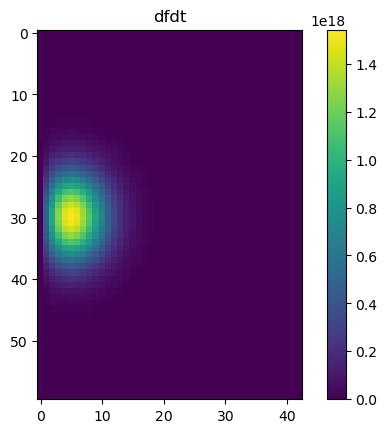

20
N
4.757632673152241e+21 1.5862336014302016e+20
E
2.1565236058359432e+24 1.1893763412492863e+22


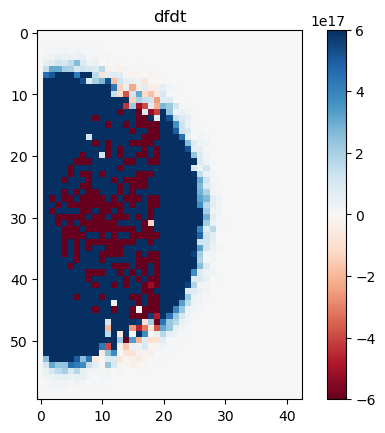

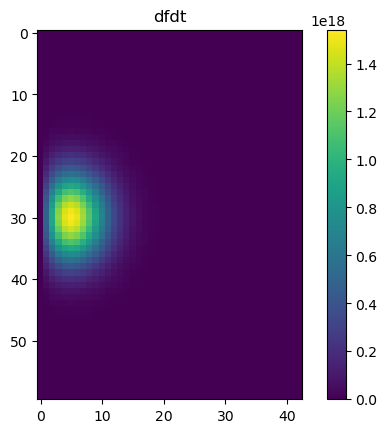

21
N
2.406324574717421e+21 1.5862336014302023e+20
E
1.1841199442091351e+24 1.1908716836757657e+22


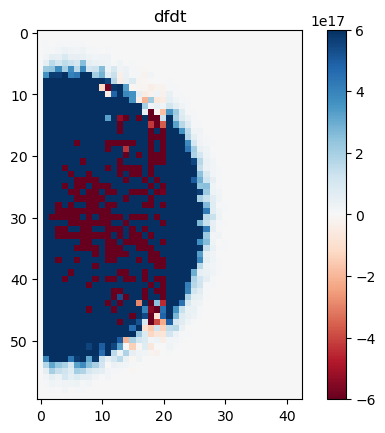

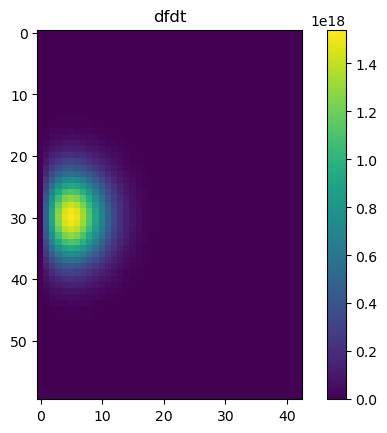

22
N
1.1235865936280574e+21 1.5862336014302016e+20
E
6.023586529477583e+23 1.1916439301545299e+22


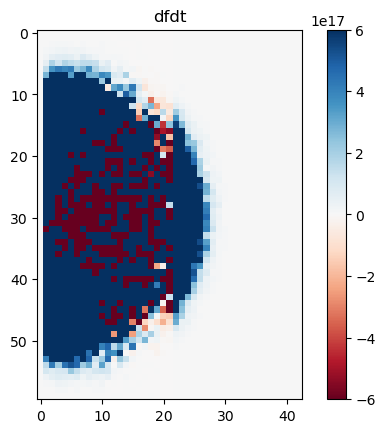

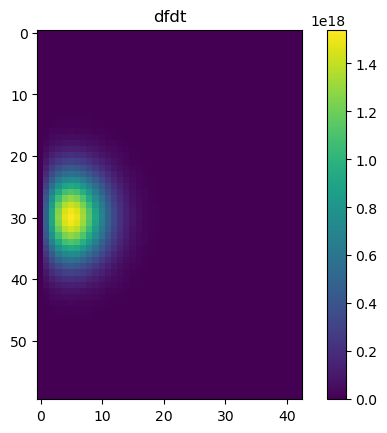

23
N
5.122436422315163e+20 1.5862336014302013e+20
E
2.9678600098450056e+23 1.1920238698222076e+22


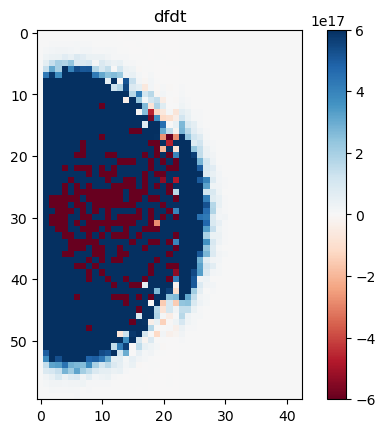

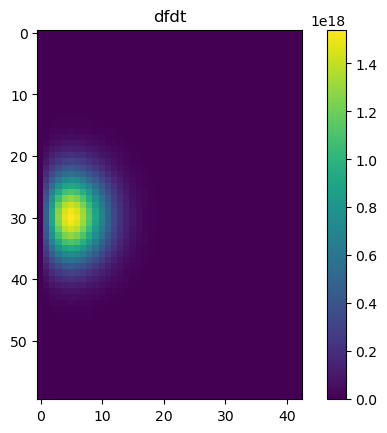

24
N
2.084585184562679e+20 1.586233601430202e+20
E
1.304476521974235e+23 1.1922020996147115e+22


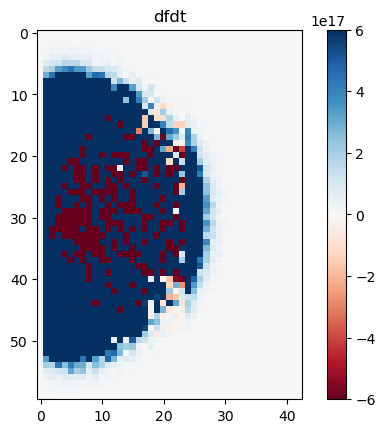

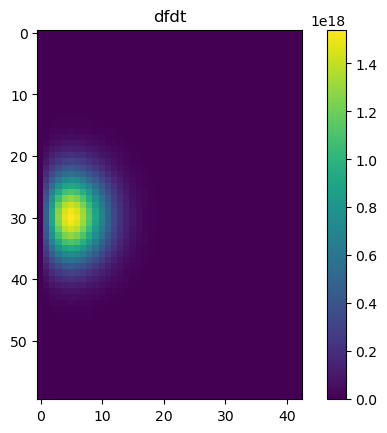

25
N
7.807406620567867e+19 1.5862336014302016e+20
E
5.307643722585233e+22 1.1922818762454503e+22


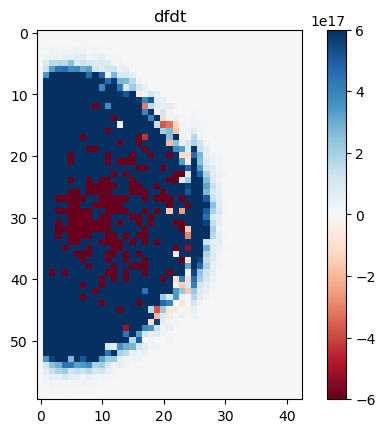

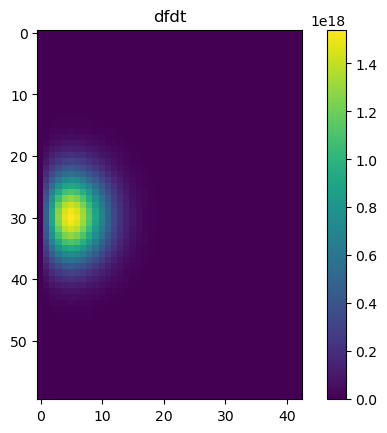

26
N
3.15645417486875e+19 1.5862336014302016e+20
E
2.2993383402189527e+22 1.1923159707005613e+22


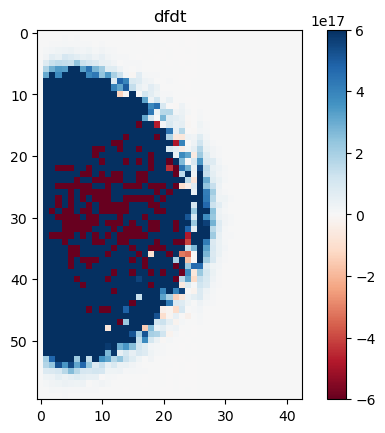

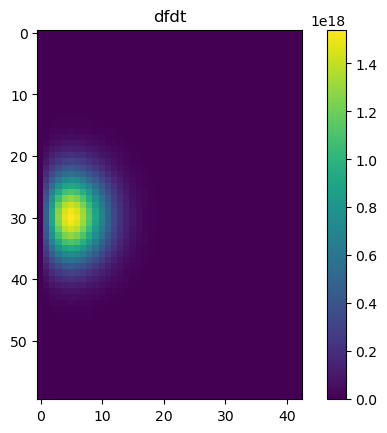

27
N
1.2041389094488465e+19 1.5862336014302013e+20
E
9.405724636511277e+21 1.192329891084847e+22


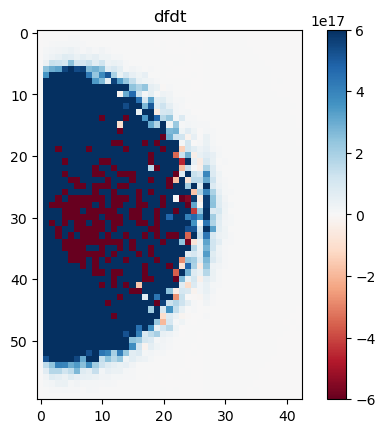

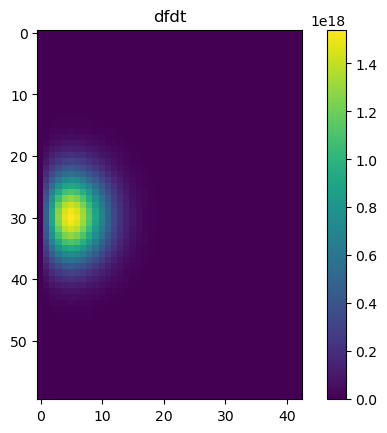

28
N
4.279818954595146e+18 1.5862336014302026e+20
E
3.575642627164341e+21 1.1923353235027049e+22


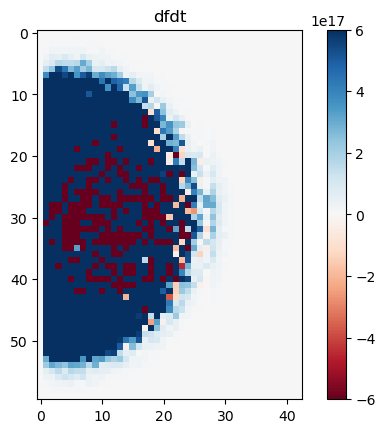

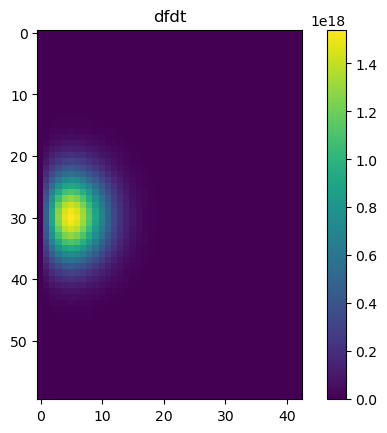

29
N
1.3516580393487967e+18 1.5862336014302013e+20
E
1.2081605939893017e+21 1.1923373507070833e+22


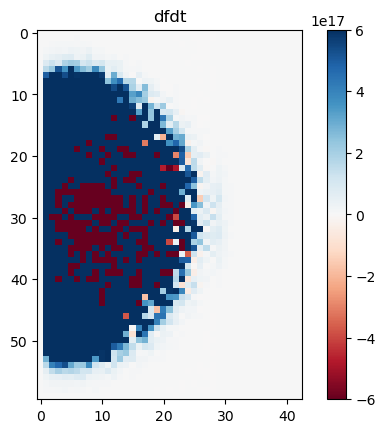

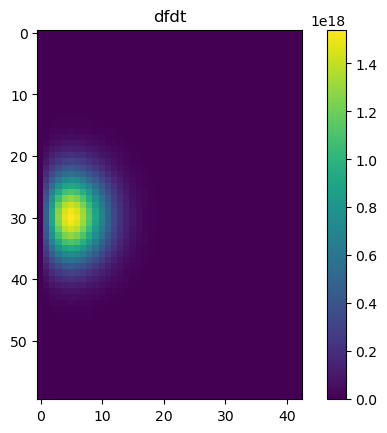

In [194]:
allparticlefracs=[]
allenergyfracs=[]
Densities=np.logspace(17,21,5)
#Densities=[Density]
Threshs=np.arange(10,30)

for d in Densities:
    print(d)
    particlefracs=[]
    energyfracs=[]
    for i in Threshs:

        print(i)
        dist=SlicedMB2D(T=T, mkt=mkt, gridpoints=size, m=mp, RCut=50,Rho=d)
        p,e=GetParticleAndEnergyRates(dist,i,1000)
        particlefracs.append(p)
        energyfracs.append(e)
    allparticlefracs.append(particlefracs)
    allenergyfracs.append(energyfracs)

[]

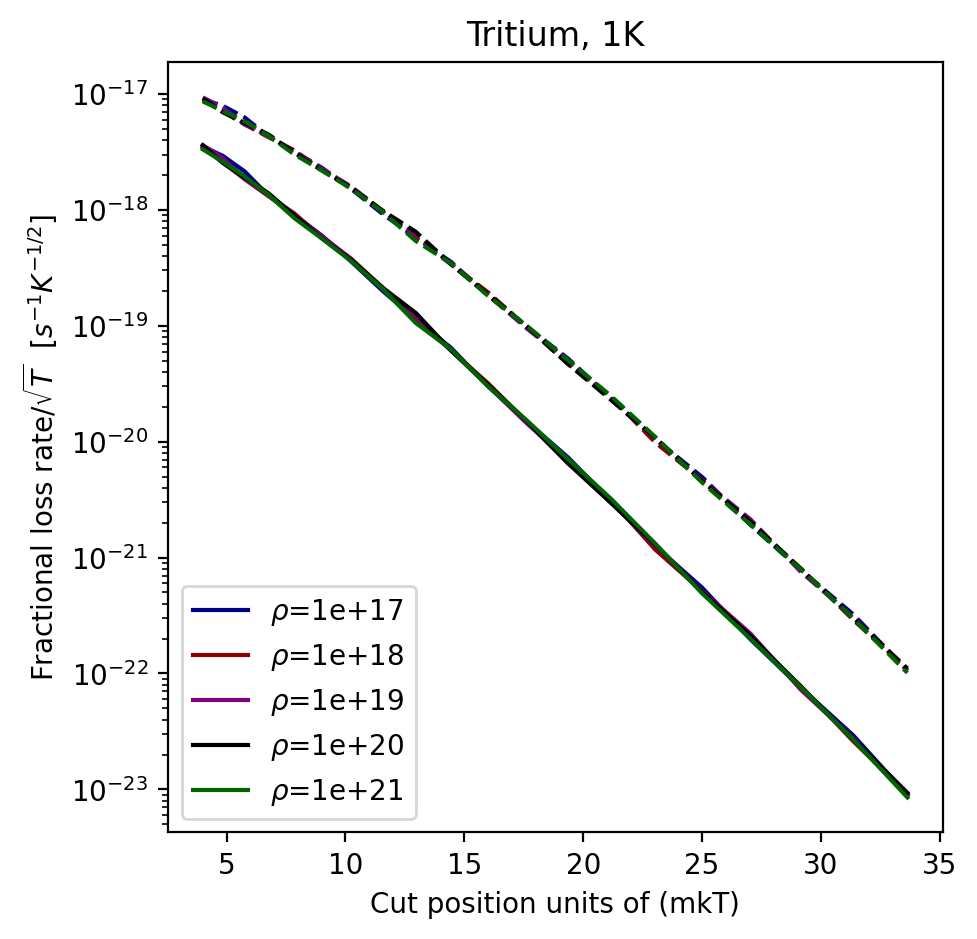

In [197]:
plt.figure(figsize=(5,5),dpi=200)
Cols=['DarkBlue','DarkRed','purple','black','darkgreen']
for i in range(0,len(allparticlefracs)):

    
    plt.plot((Threshs)**2/(mkt),np.array(allparticlefracs[i])/Densities[i],'-',label=r'$\rho$='+str(Densities[i]),color=Cols[i])
    plt.plot((Threshs)**2/(mkt),np.array(allenergyfracs[i])/Densities[i],'--',color=Cols[i])
plt.xlabel("Cut position units of (mkT)")
plt.ylabel(r"Fractional loss rate/$\sqrt{T}$  [$s^{-1} K^{-1/2}$]")
plt.legend(loc='lower left')
plt.title(r"Tritium, 1K")
#plt.xlim(1,9)
#plt.ylim(1e-1,1e3)

plt.semilogy()
#np.savetxt("./out/Tritium_1e18_T"+str(T)+".txt",[Threshs/DistPeak,np.array(particlefracs),np.array(energyfracs)])

1e+21
10
N
5.614804853301114e+16 1.5862336014302022e+17
E
8.120345802306692e+18 9.097739718031257e+18


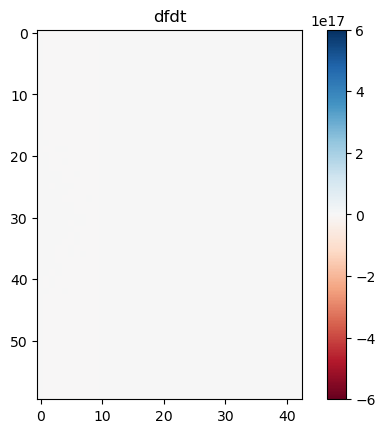

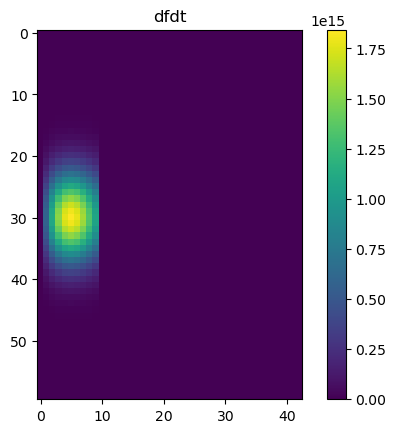

11
N
4.389156491059453e+16 1.586233601430202e+17
E
7.417145300875225e+18 9.752581457390193e+18


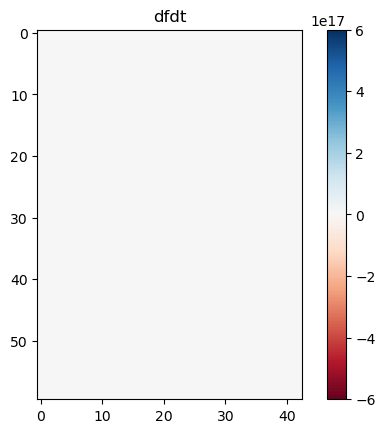

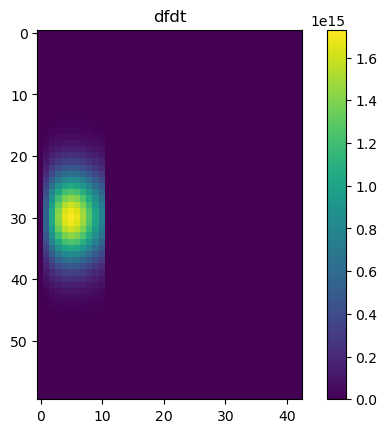

12
N
3.141909532770805e+16 1.5862336014302022e+17
E
6.012852010764708e+18 1.0318932873592812e+19


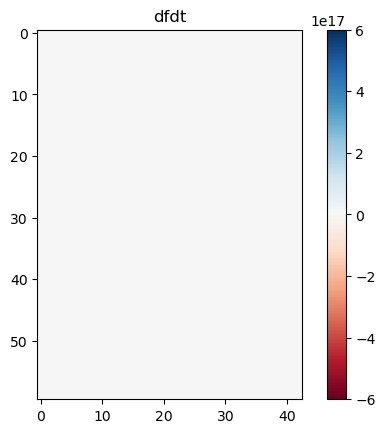

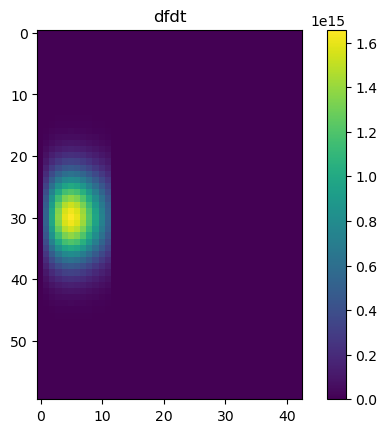

13
N
2.2411776771431004e+16 1.5862336014302022e+17
E
4.834827812484584e+18 1.0785066391139731e+19


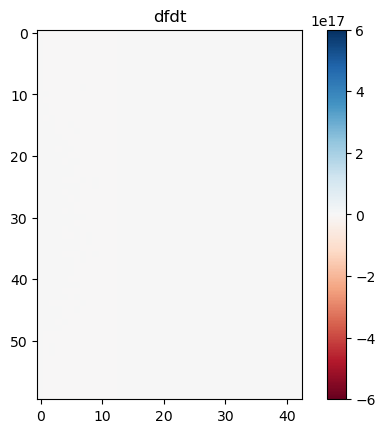

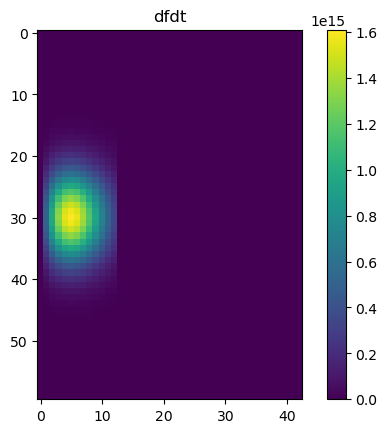

14
N
1.5527698421666942e+16 1.586233601430202e+17
E
3.8127444698537784e+18 1.1149584724620917e+19


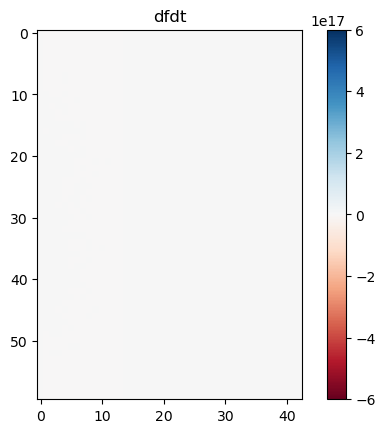

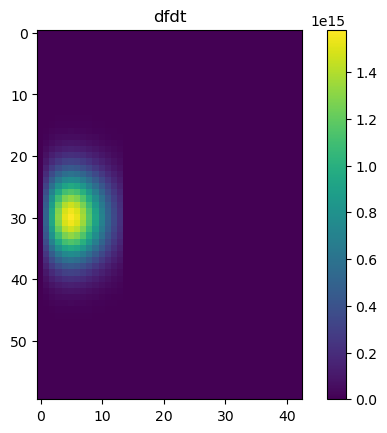

15
N
1.0000917082256318e+16 1.5862336014302026e+17
E
2.749580739672095e+18 1.142009668085274e+19


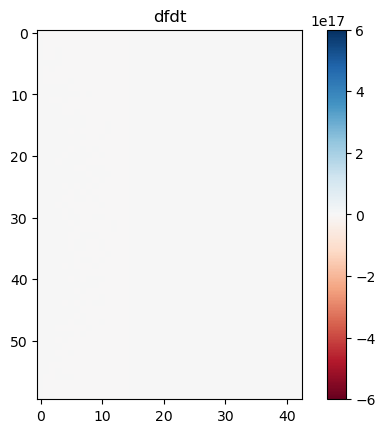

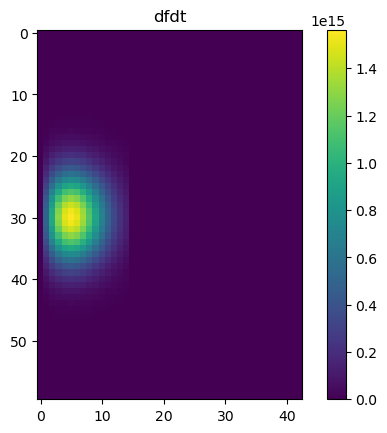

16
N
5476751405102388.0 1.5862336014302022e+17
E
1.7002081536655286e+18 1.161047167019746e+19


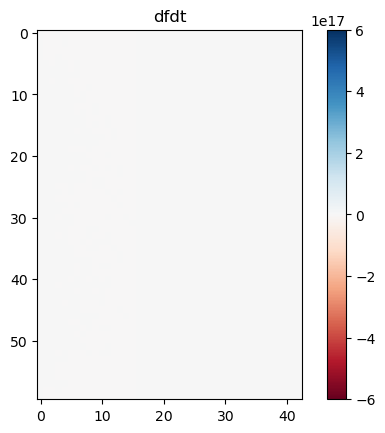

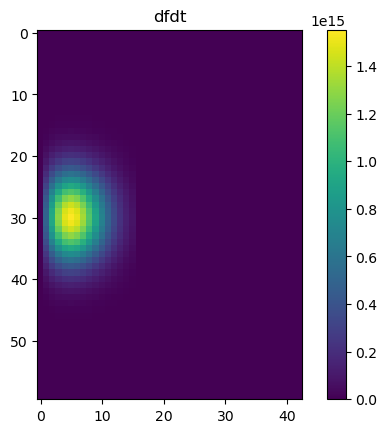

17
N
3358084393589563.0 1.586233601430203e+17
E
1.143361071591764e+18 1.1737506418808324e+19


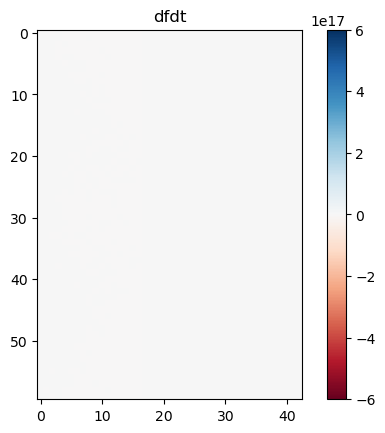

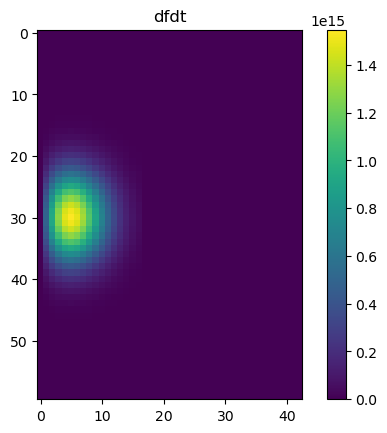

18
N
1896061158769214.0 1.5862336014302026e+17
E
7.103952521847441e+17 1.18179074755862e+19


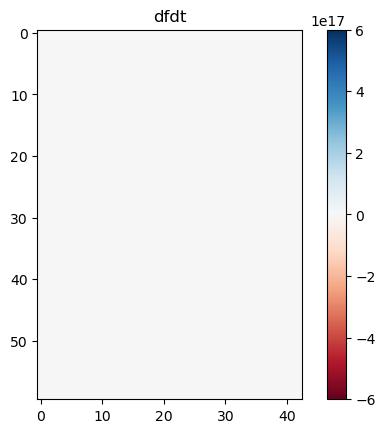

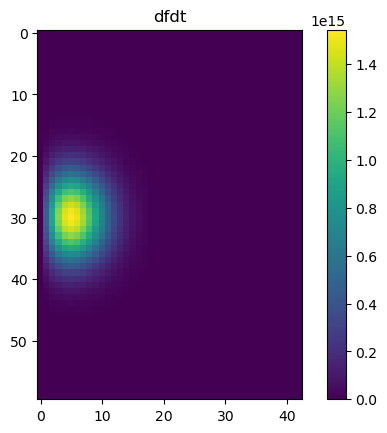

19
N
1040049917989517.0 1.5862336014302026e+17
E
4.293526546312417e+17 1.186620407627752e+19


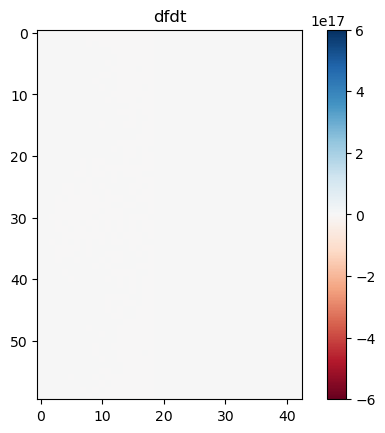

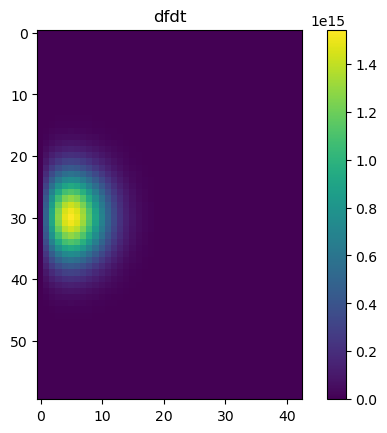

20
N
491836781015807.6 1.5862336014302026e+17
E
2.2386033019862253e+17 1.189376341249287e+19


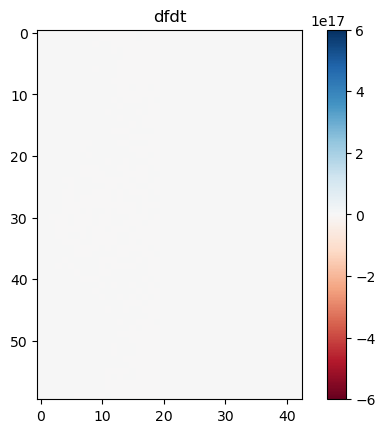

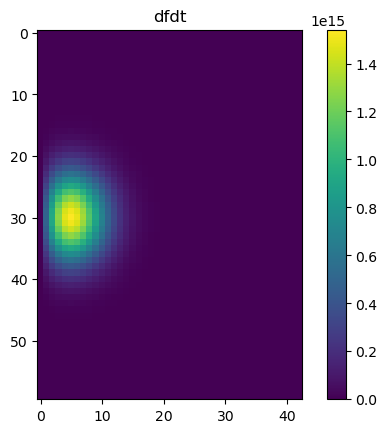

21
N
247038579692868.56 1.5862336014302022e+17
E
1.2237721145503285e+17 1.1908716836757664e+19


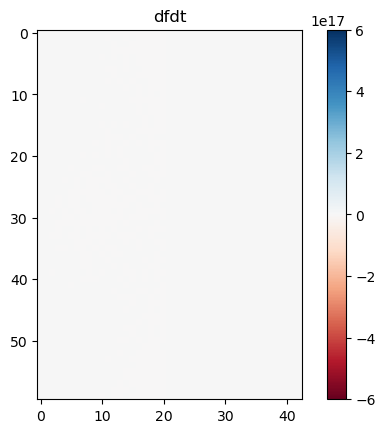

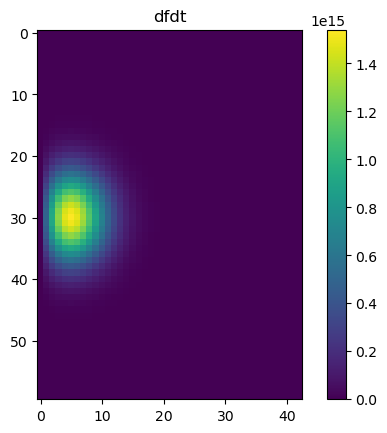

22
N
106128068028329.62 1.5862336014302032e+17
E
5.697958763904308e+16 1.1916439301545302e+19


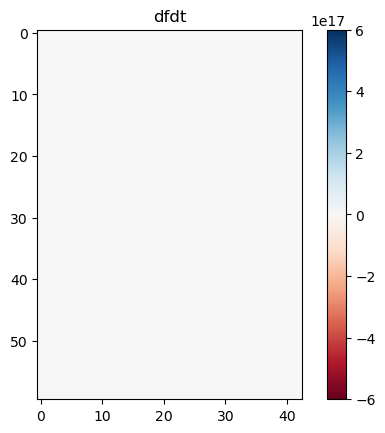

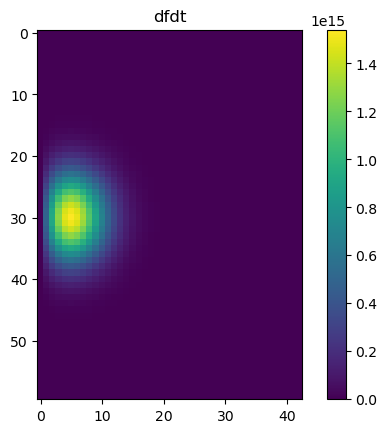

23
N
47671345500256.61 1.5862336014302026e+17
E
2.7720990824386196e+16 1.1920238698222088e+19


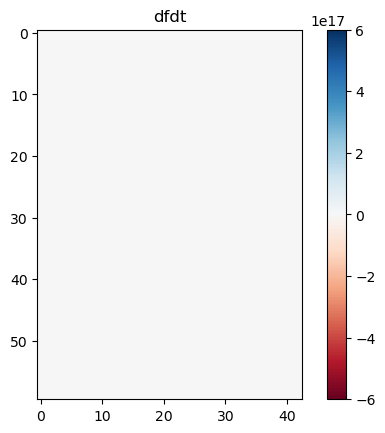

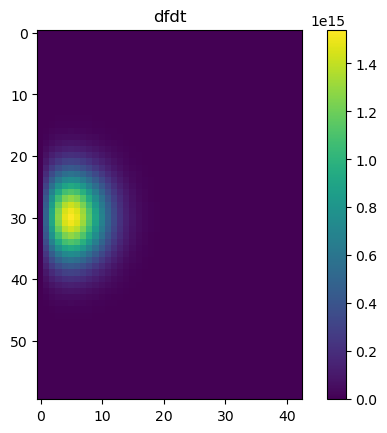

24
N
19237003394627.617 1.5862336014302026e+17
E
1.2136728299259256e+16 1.1922020996147114e+19


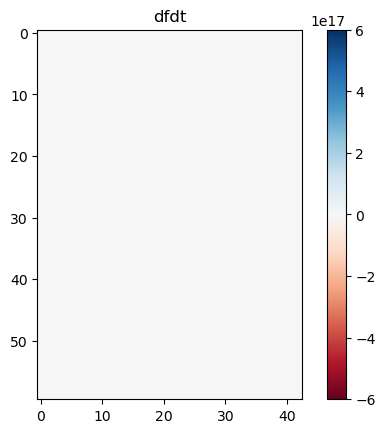

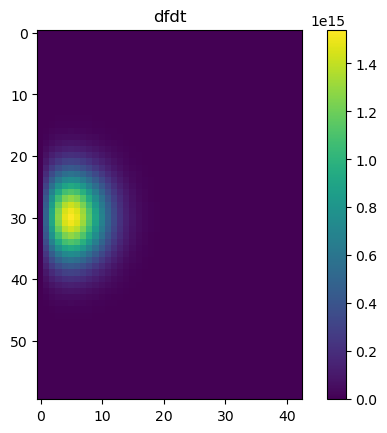

25
N
8387269447071.166 1.5862336014302022e+17
E
5680747270135413.0 1.1922818762454503e+19


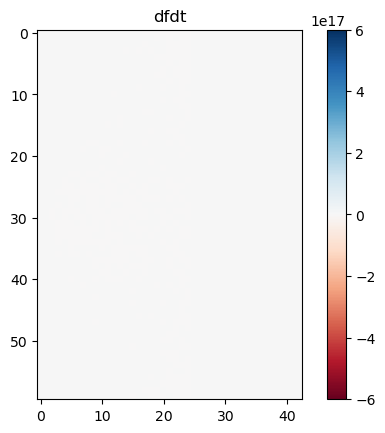

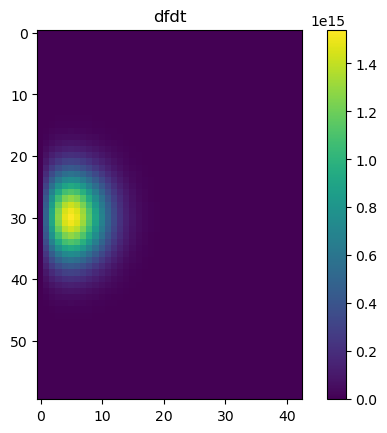

26
N
3076631817256.182 1.5862336014302016e+17
E
2239232402025816.2 1.1923159707005622e+19


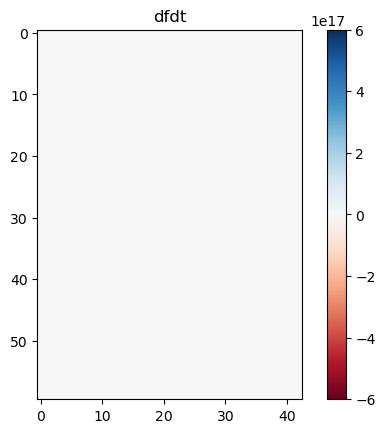

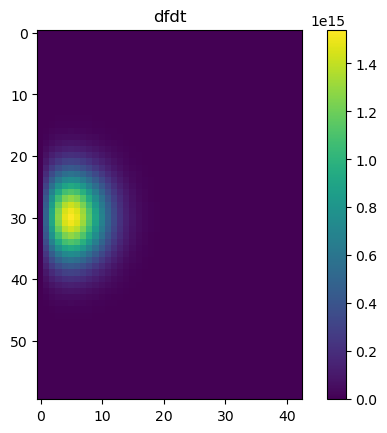

27
N
1206045656070.533 1.586233601430203e+17
E
942087530684393.9 1.192329891084848e+19


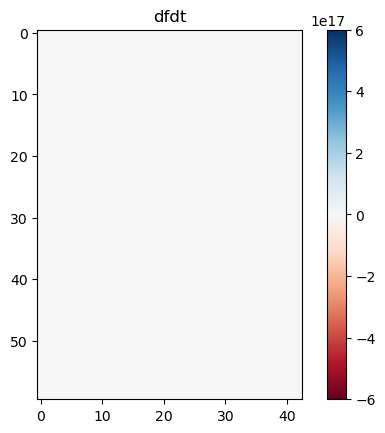

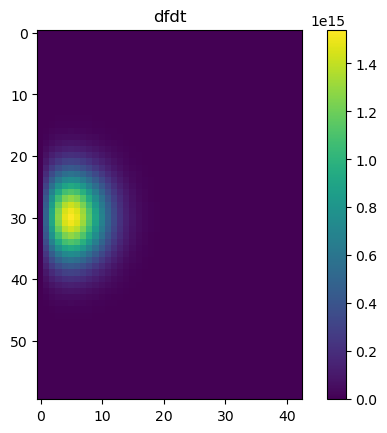

28
N
435742279158.51605 1.5862336014302022e+17
E
364144943962384.75 1.1923353235027046e+19


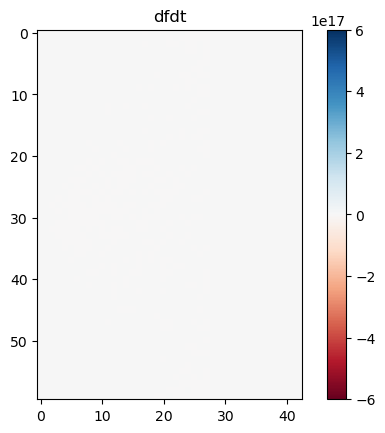

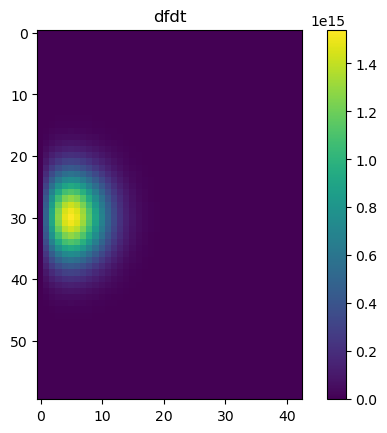

29
N
137678430337.4232 1.586233601430203e+17
E
123020076748043.48 1.1923373507070833e+19


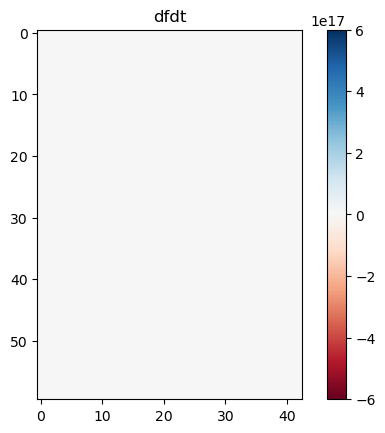

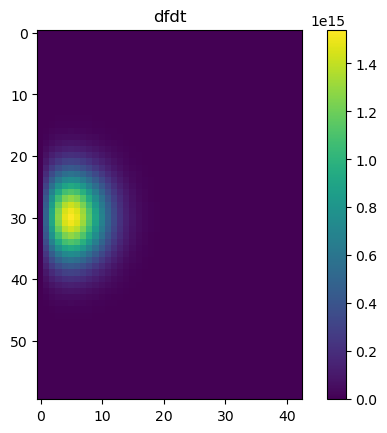

1e+21
10
N
1.906829258358616e+17 1.5862336014302022e+17
E
2.7737964487987306e+19 9.097739718031257e+18


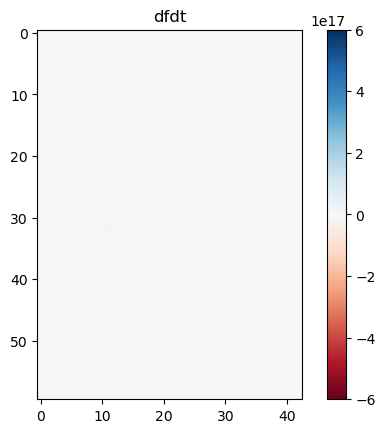

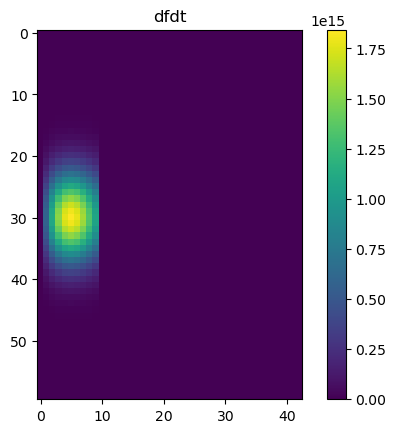

11
N
1.2865212560114091e+17 1.586233601430202e+17
E
2.1608986616592986e+19 9.752581457390193e+18


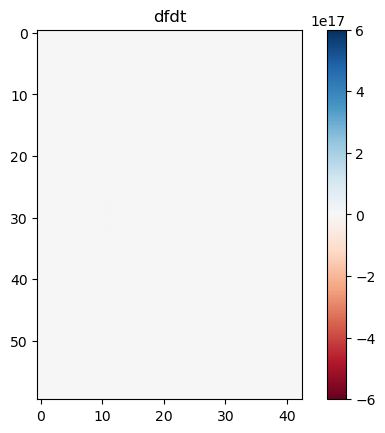

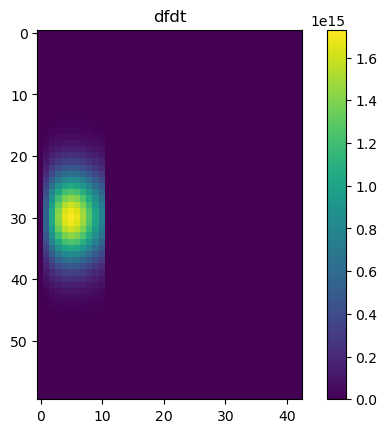

12
N
9.822718587654538e+16 1.5862336014302022e+17
E
1.8953425446192194e+19 1.0318932873592812e+19


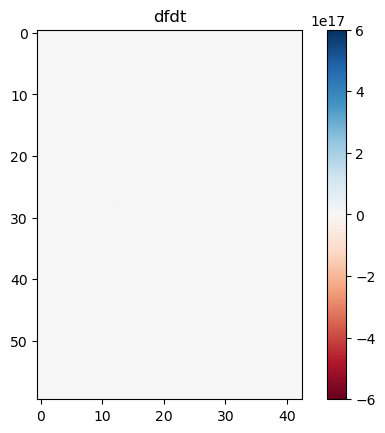

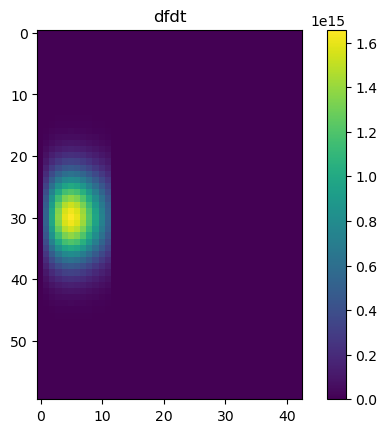

13
N
7.0656582485937416e+16 1.5862336014302022e+17
E
1.5466080761937373e+19 1.0785066391139731e+19


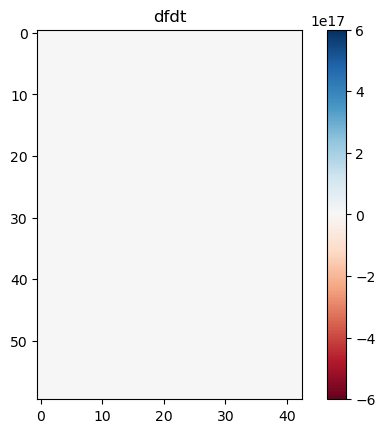

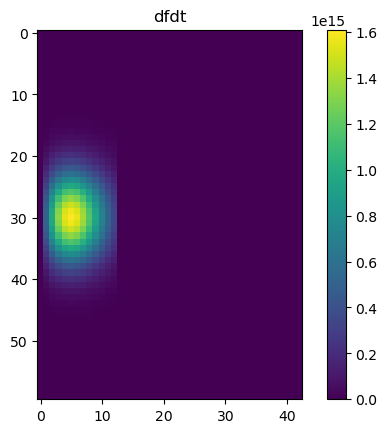

14
N
4.377945043490776e+16 1.586233601430202e+17
E
1.082357498392699e+19 1.1149584724620917e+19


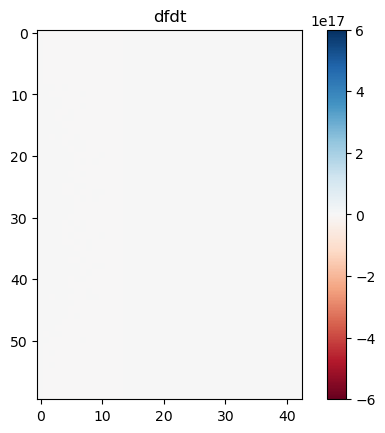

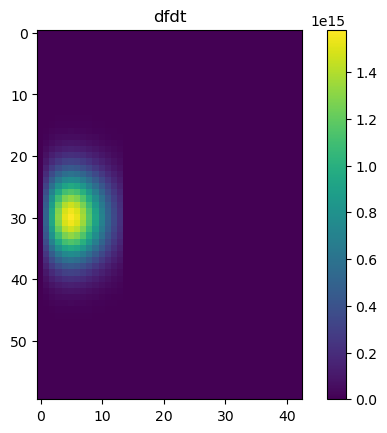

15
N
2.8242154413577716e+16 1.5862336014302026e+17
E
7.835230880899358e+18 1.142009668085274e+19


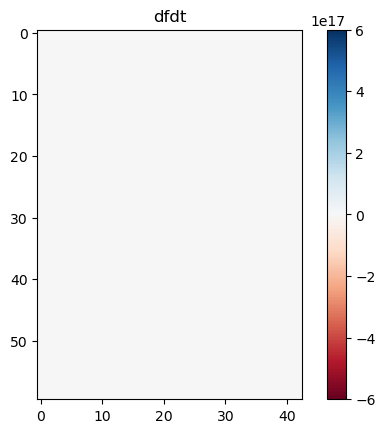

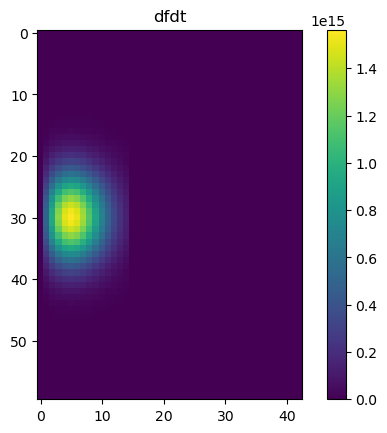

16
N
1.7403112391053322e+16 1.5862336014302022e+17
E
5.352070906401254e+18 1.161047167019746e+19


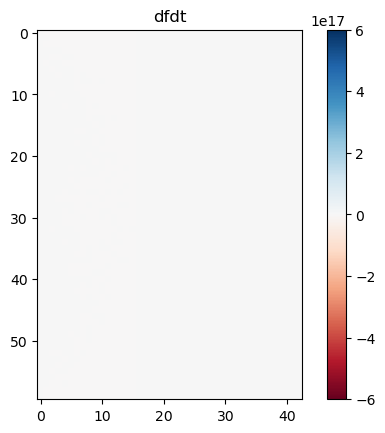

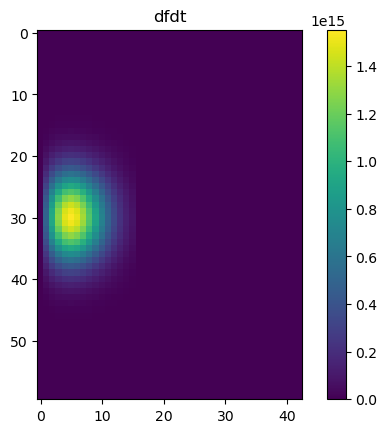

17
N
1.1072677945340288e+16 1.586233601430203e+17
E
3.774827290485957e+18 1.1737506418808324e+19


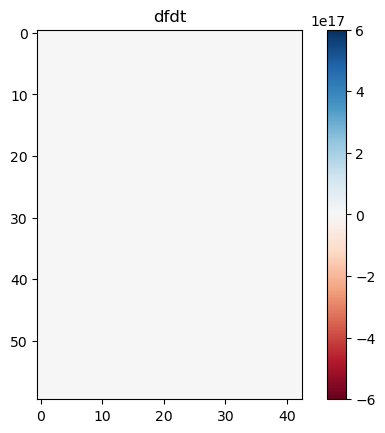

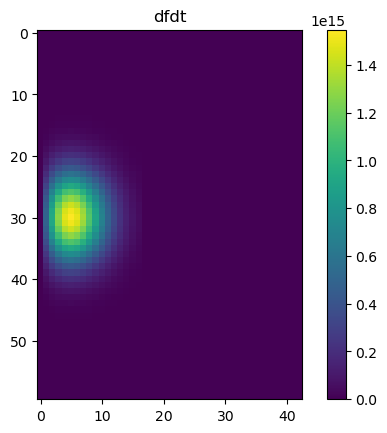

18
N
5746298012041959.0 1.5862336014302026e+17
E
2.1647636921520678e+18 1.18179074755862e+19


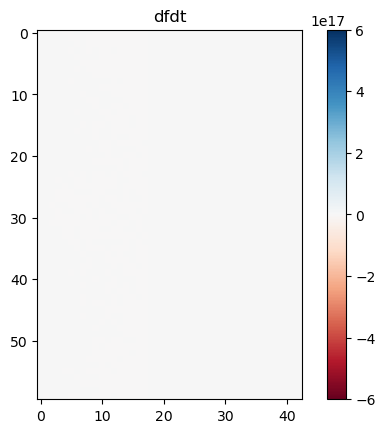

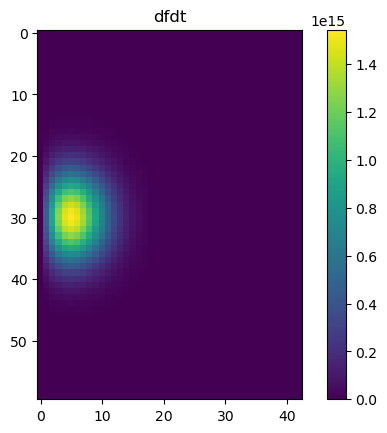

19
N
2906139156763965.5 1.5862336014302026e+17
E
1.208069232750398e+18 1.186620407627752e+19


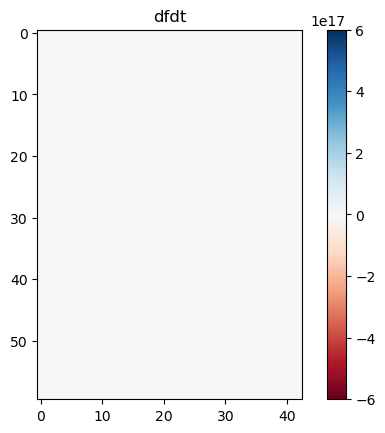

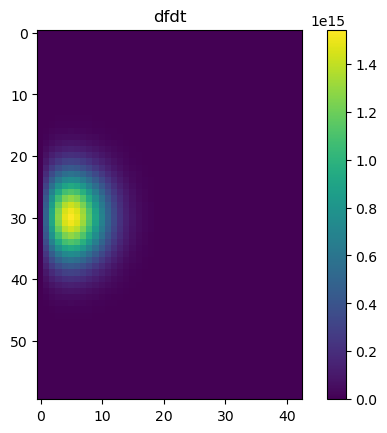

20
N
1539234212288054.0 1.5862336014302026e+17
E
6.973114089121663e+17 1.189376341249287e+19


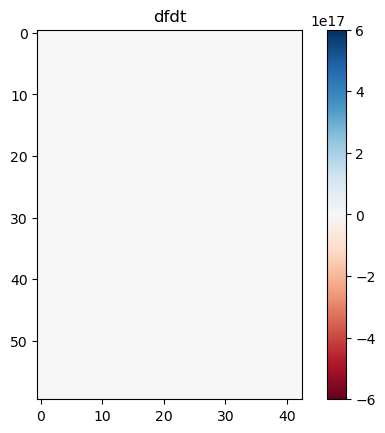

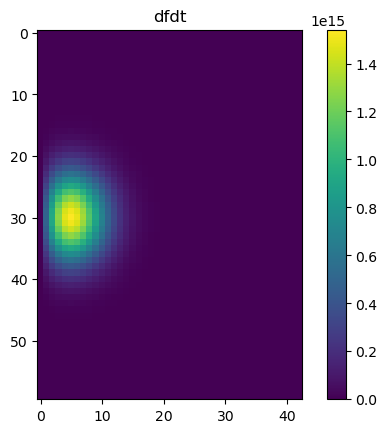

21
N
767902345711893.2 1.5862336014302022e+17
E
3.797656034163311e+17 1.1908716836757664e+19


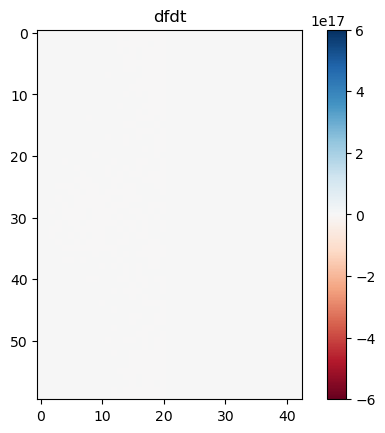

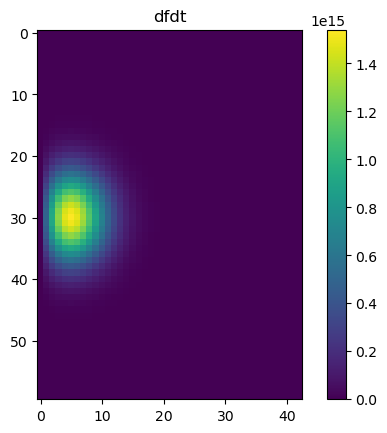

22
N
346081762896234.8 1.5862336014302032e+17
E
1.8598722116240995e+17 1.1916439301545302e+19


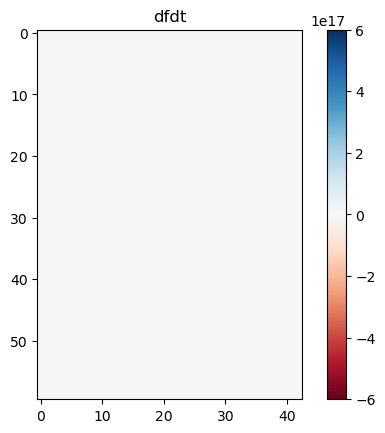

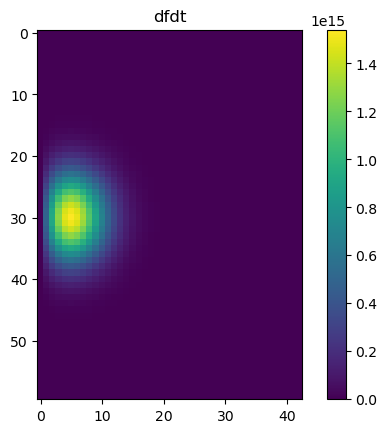

23
N
156170139044130.47 1.5862336014302026e+17
E
9.087101611765536e+16 1.1920238698222088e+19


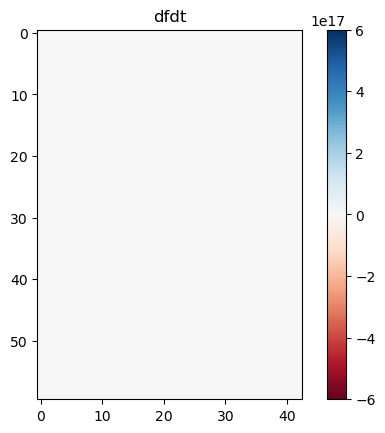

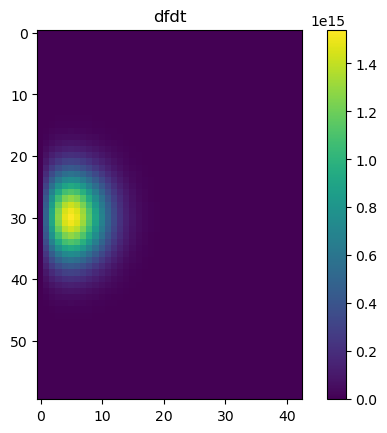

24
N
63036486873927.88 1.5862336014302026e+17
E
3.967347784976994e+16 1.1922020996147114e+19


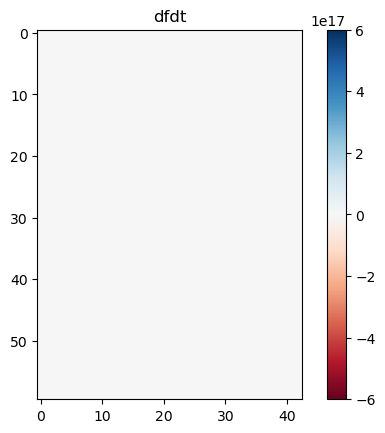

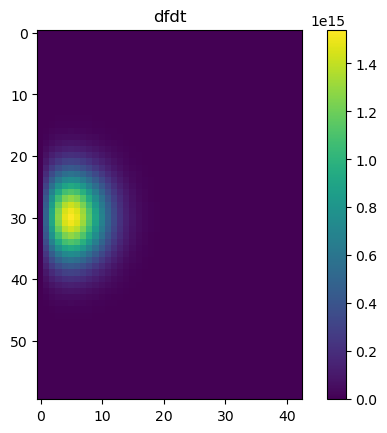

25
N
25542171022295.668 1.5862336014302022e+17
E
1.7302326458909906e+16 1.1922818762454503e+19


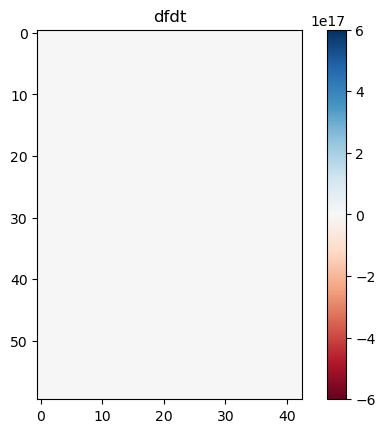

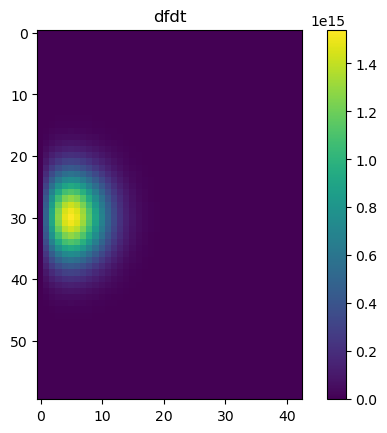

26
N
9374115274428.465 1.5862336014302016e+17
E
6850607063564667.0 1.1923159707005622e+19


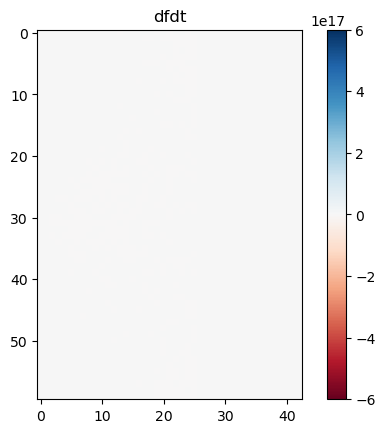

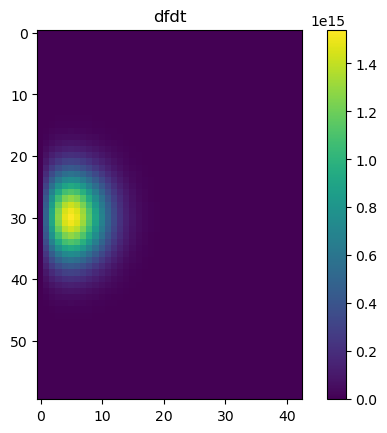

27
N
3346188950422.31 1.586233601430203e+17
E
2629634390516047.5 1.192329891084848e+19


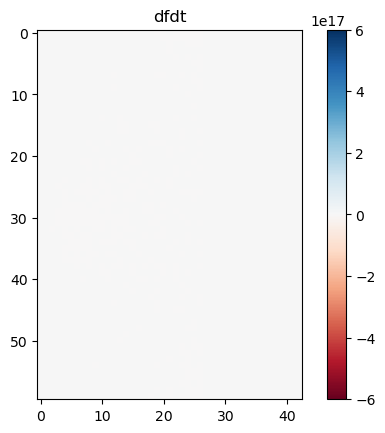

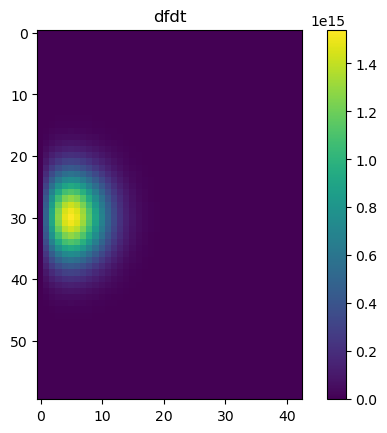

28
N
1242123106248.012 1.5862336014302022e+17
E
1039268724703139.9 1.1923353235027046e+19


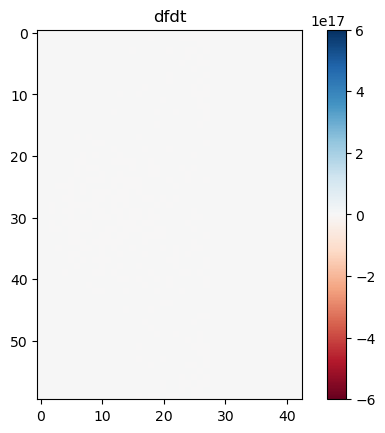

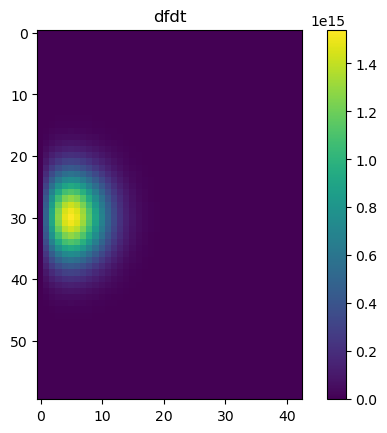

29
N
460365972456.26807 1.586233601430203e+17
E
410654113046584.1 1.1923373507070833e+19


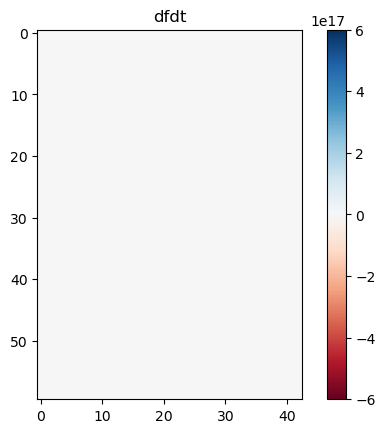

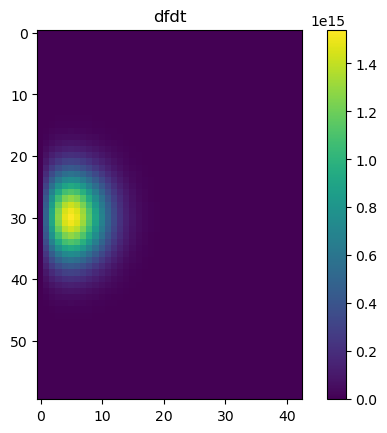

1e+21
10
N
5.819760481919923e+17 1.5862336014302022e+17
E
8.591219431060382e+19 9.097739718031257e+18


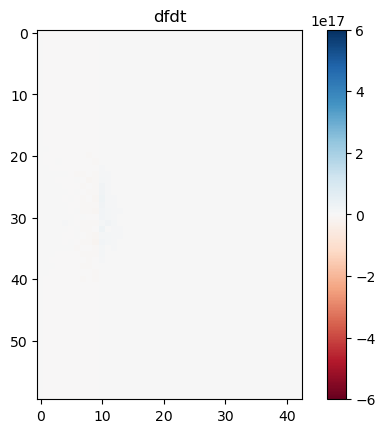

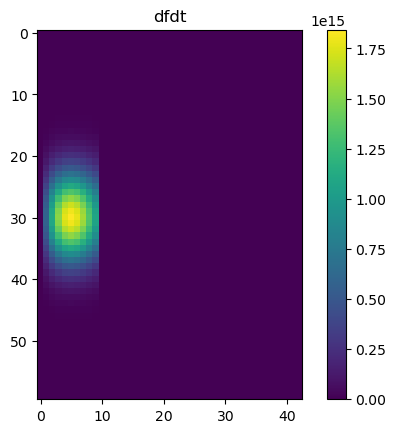

11
N
4.1501088302586406e+17 1.586233601430202e+17
E
7.024361675599659e+19 9.752581457390193e+18


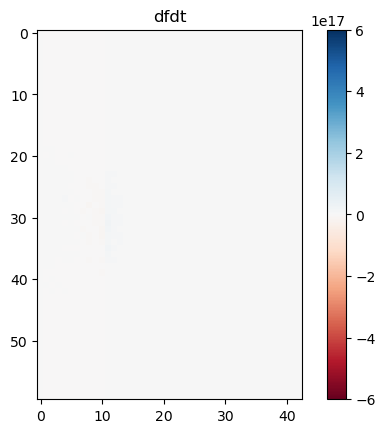

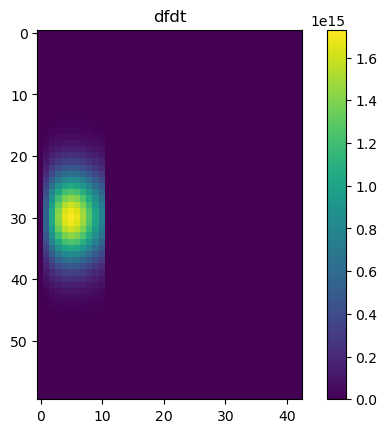

12
N
3.2305395853353894e+17 1.5862336014302022e+17
E
6.1795465103790514e+19 1.0318932873592812e+19


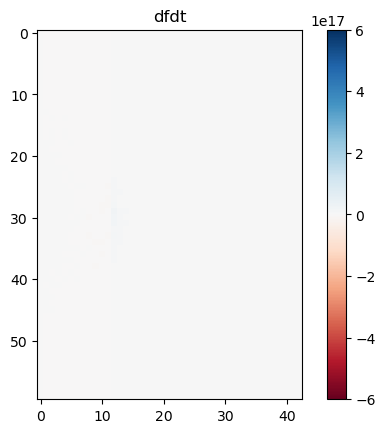

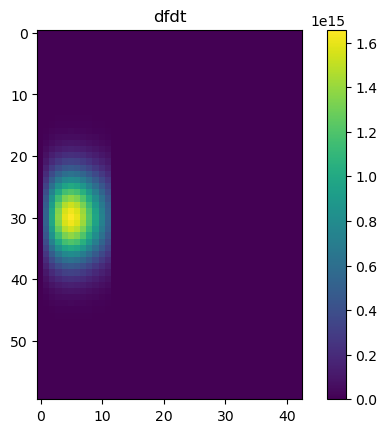

13
N
2.165775266414894e+17 1.5862336014302022e+17
E
4.768255979650994e+19 1.0785066391139731e+19


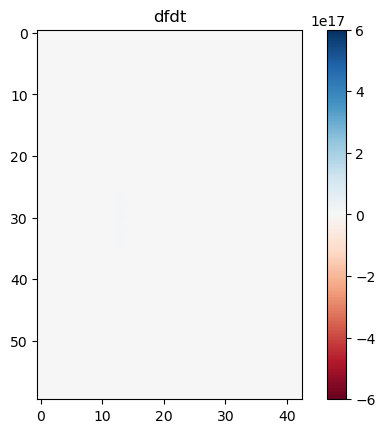

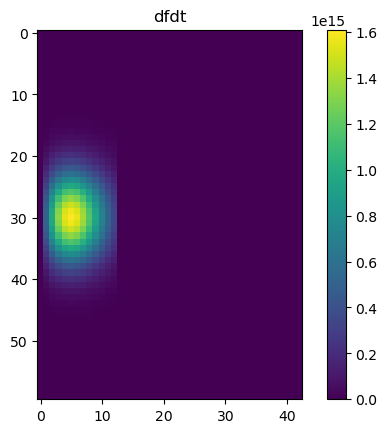

14
N
1.3579810551166344e+17 1.586233601430202e+17
E
3.374757737955402e+19 1.1149584724620917e+19


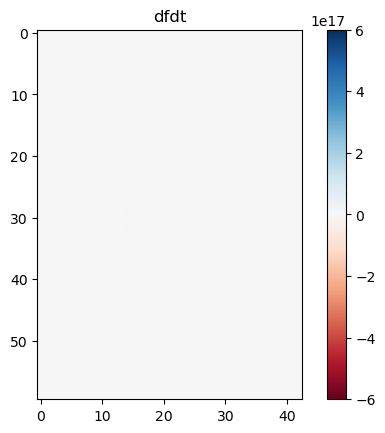

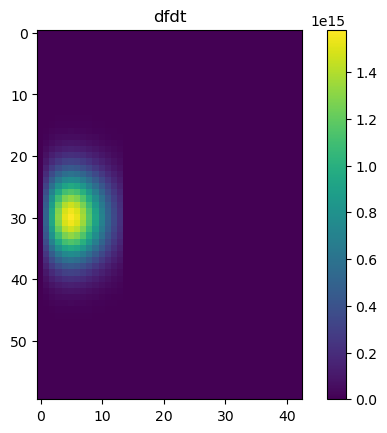

15
N
9.733251516179634e+16 1.5862336014302026e+17
E
2.6993422460354445e+19 1.142009668085274e+19


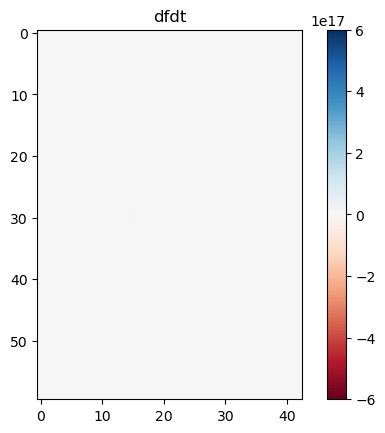

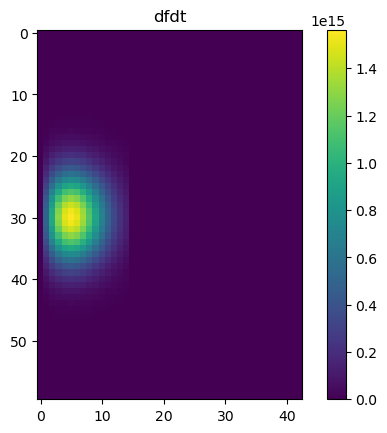

16
N
5.4935229642318344e+16 1.5862336014302022e+17
E
1.697487702792164e+19 1.161047167019746e+19


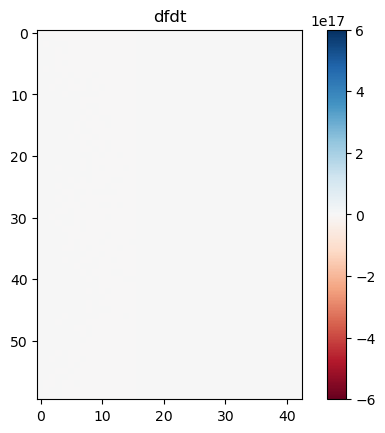

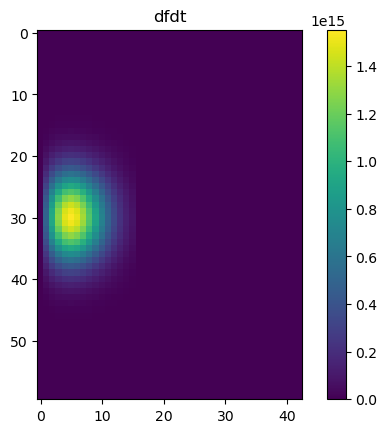

17
N
3.0219784938913108e+16 1.586233601430203e+17
E
1.0358180909280373e+19 1.1737506418808324e+19


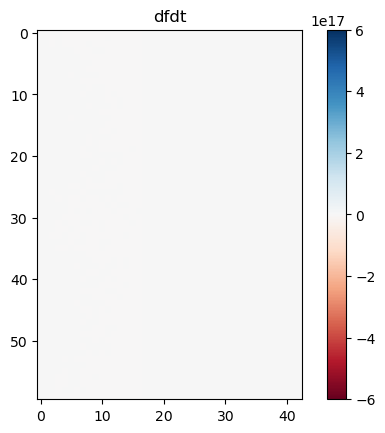

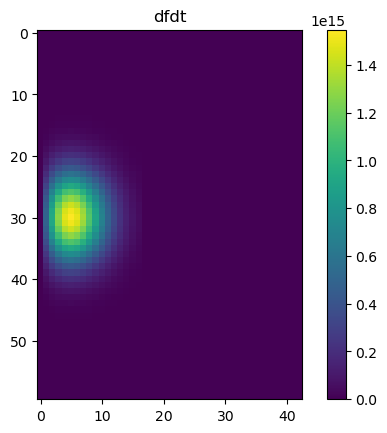

18
N
1.846129609627149e+16 1.5862336014302026e+17
E
6.975441995139375e+18 1.18179074755862e+19


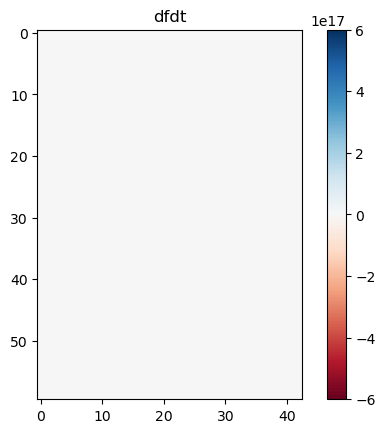

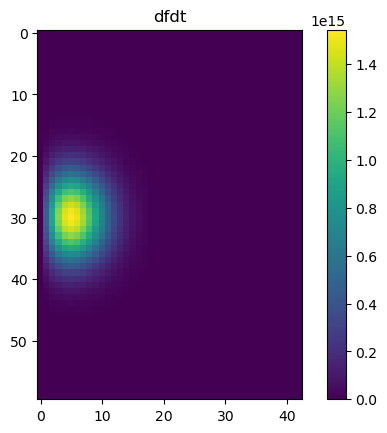

19
N
1.001516558277976e+16 1.5862336014302026e+17
E
4.167763267024227e+18 1.186620407627752e+19


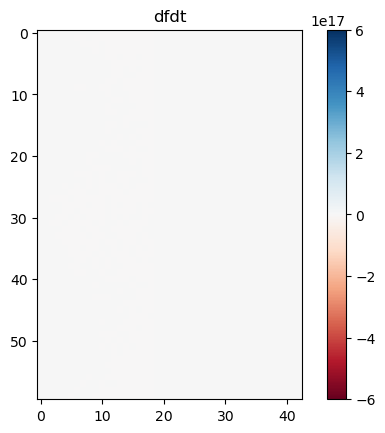

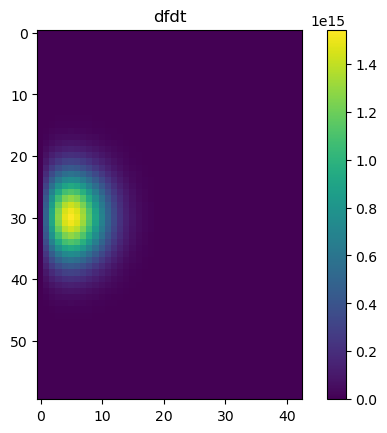

20
N
5047248719982190.0 1.5862336014302026e+17
E
2.2827772857218225e+18 1.189376341249287e+19


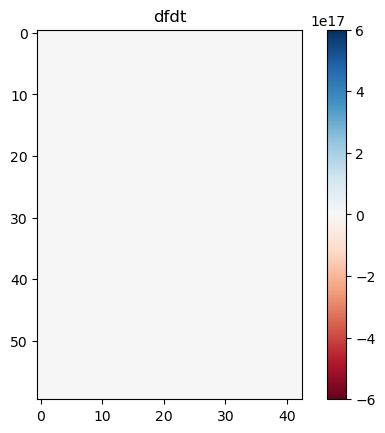

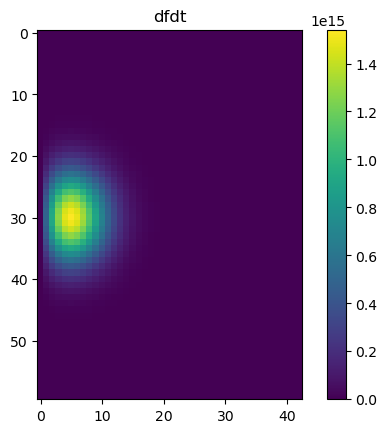

21
N
2344384043479677.5 1.5862336014302022e+17
E
1.1625875464414574e+18 1.1908716836757664e+19


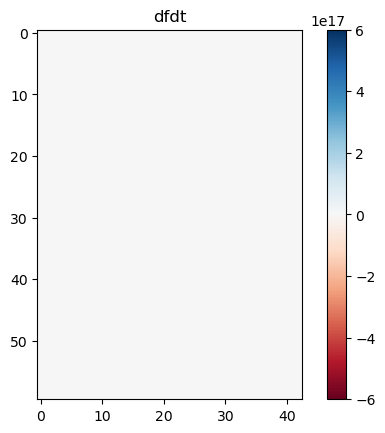

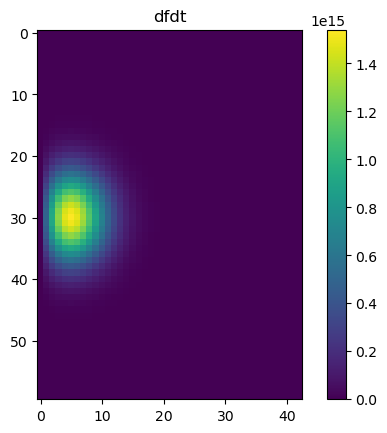

22
N
1086931304883521.6 1.5862336014302032e+17
E
5.850517753031666e+17 1.1916439301545302e+19


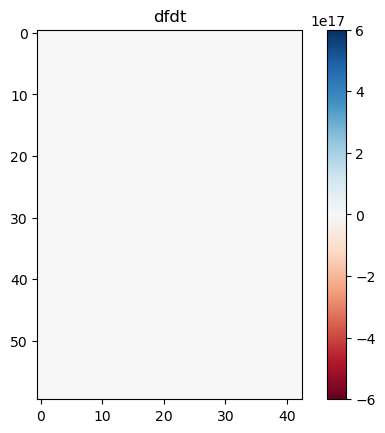

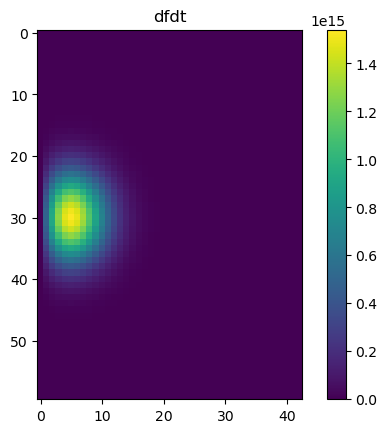

23
N
461995949736610.94 1.5862336014302026e+17
E
2.685797674246869e+17 1.1920238698222088e+19


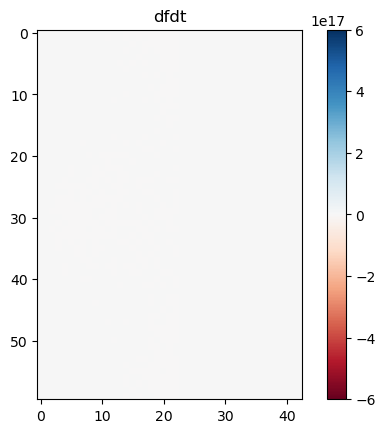

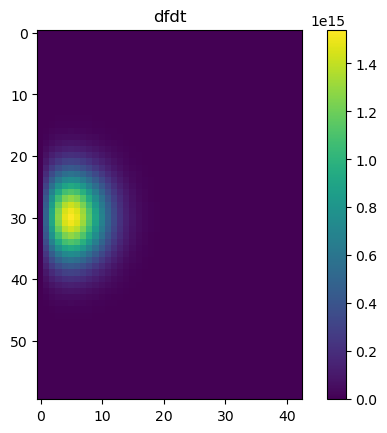

24
N
212575666319401.4 1.5862336014302026e+17
E
1.3351166736821418e+17 1.1922020996147114e+19


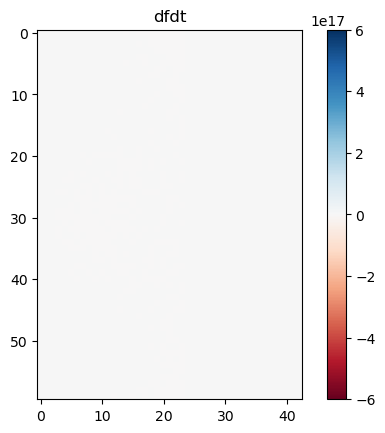

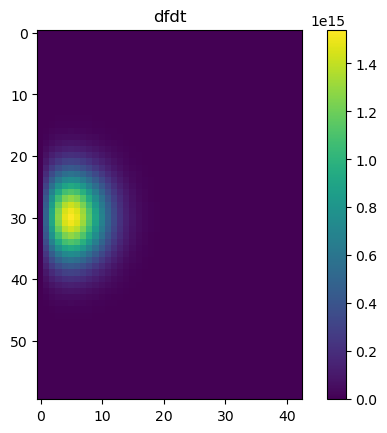

25
N
83665328874647.19 1.5862336014302022e+17
E
5.667336357126357e+16 1.1922818762454503e+19


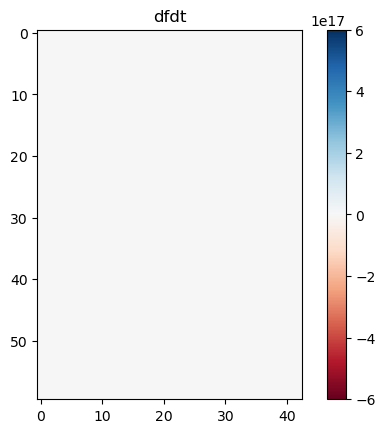

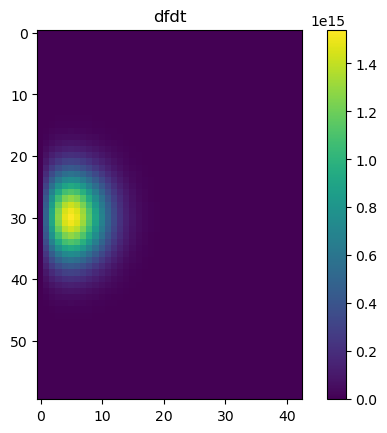

26
N
35940942786994.41 1.5862336014302016e+17
E
2.600444144344456e+16 1.1923159707005622e+19


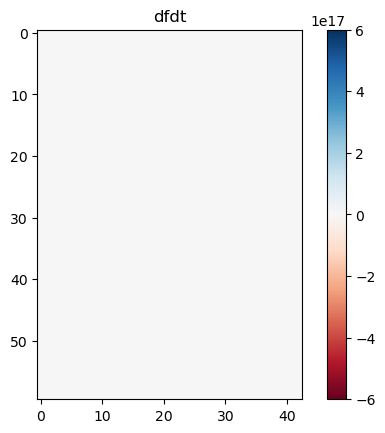

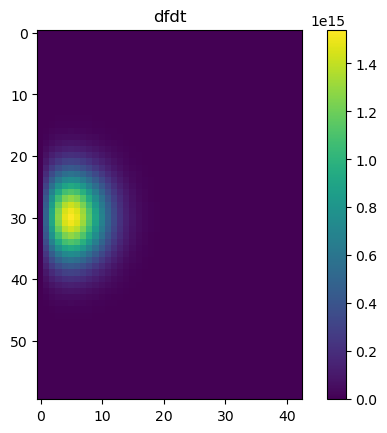

27
N
12363579482685.098 1.586233601430203e+17
E
9619850619266542.0 1.192329891084848e+19


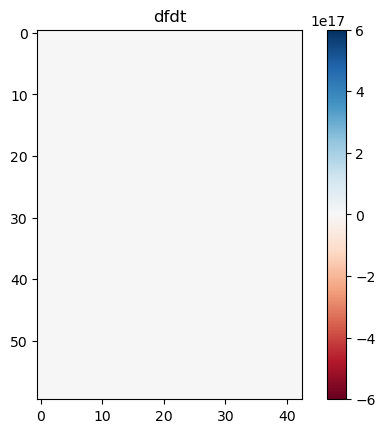

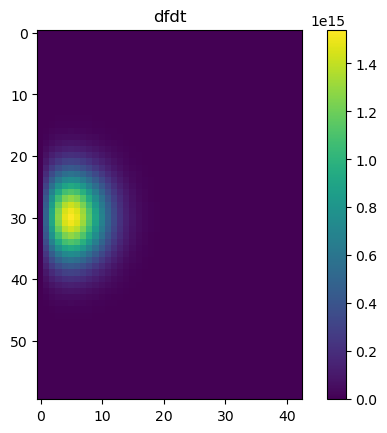

28
N
4552569596446.47 1.5862336014302022e+17
E
3781713759314432.0 1.1923353235027046e+19


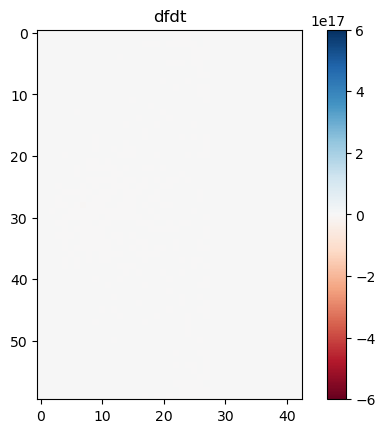

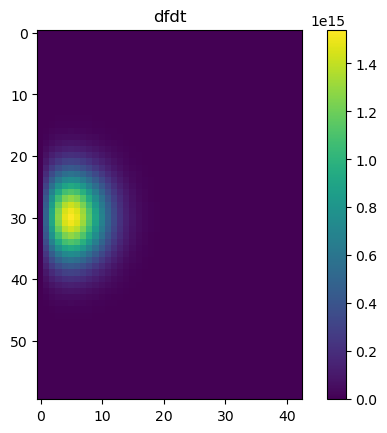

29
N
1491973146923.027 1.586233601430203e+17
E
1329358183756683.2 1.1923373507070833e+19


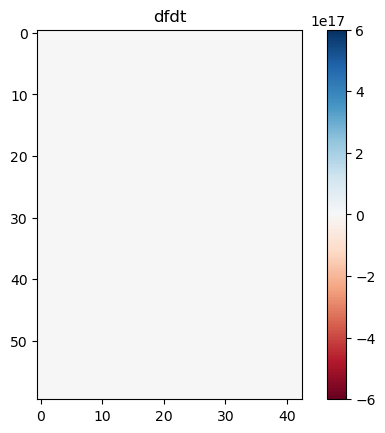

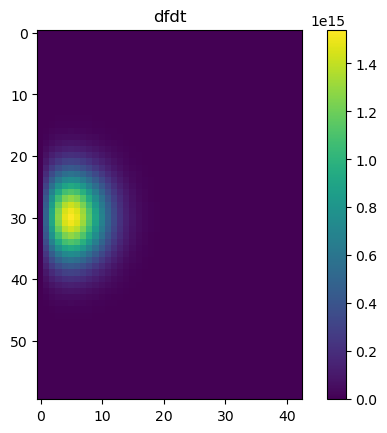

1e+21
10
N
1.7792664796847007e+18 1.5862336014302022e+17
E
2.581518933103866e+20 9.097739718031257e+18


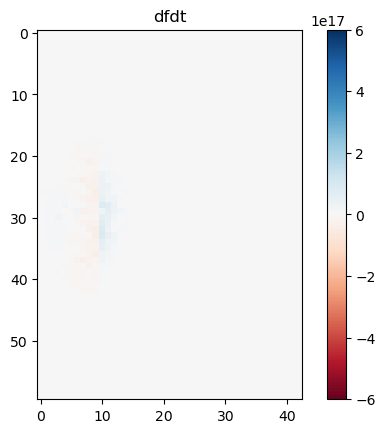

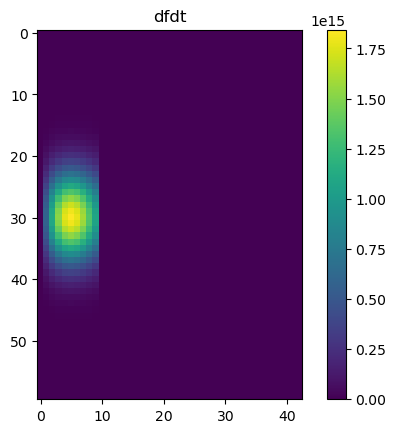

11
N
1.3996635552665523e+18 1.586233601430202e+17
E
2.3781550954419123e+20 9.752581457390193e+18


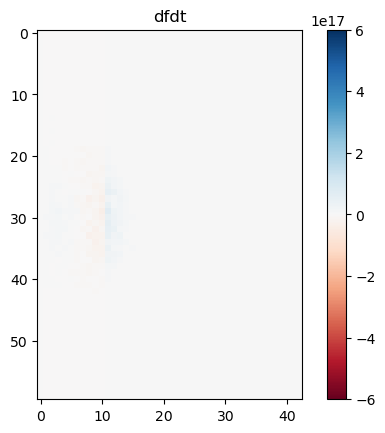

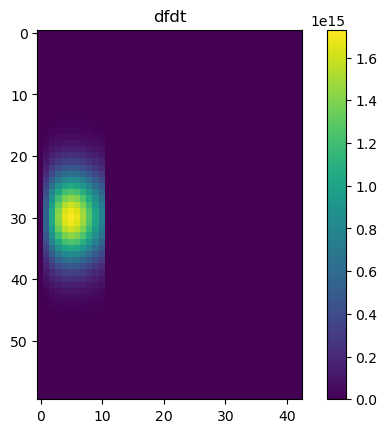

12
N
9.565228579336566e+17 1.5862336014302022e+17
E
1.862200803013786e+20 1.0318932873592812e+19


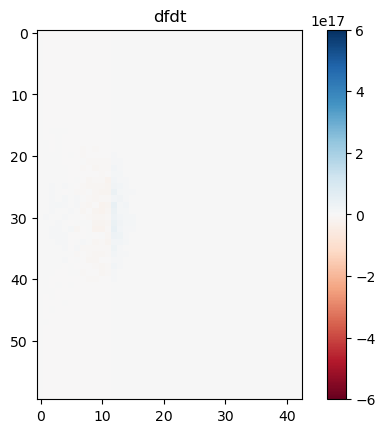

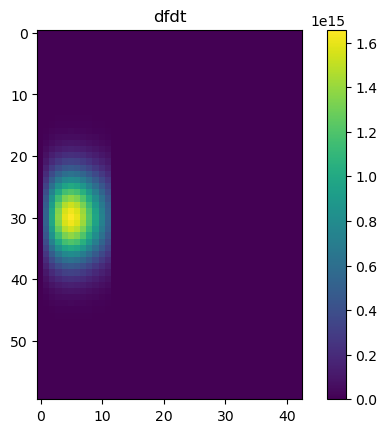

13
N
6.780303598484132e+17 1.5862336014302022e+17
E
1.493547820811904e+20 1.0785066391139731e+19


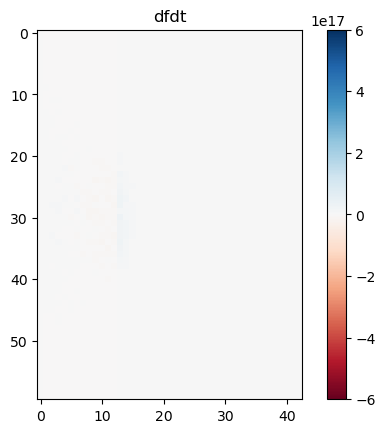

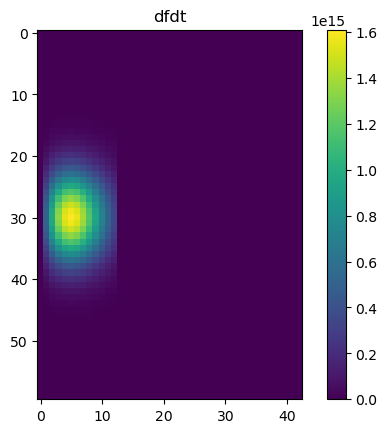

14
N
4.6319202326654746e+17 1.586233601430202e+17
E
1.139418774076492e+20 1.1149584724620917e+19


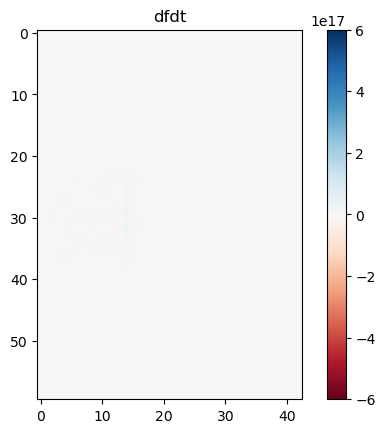

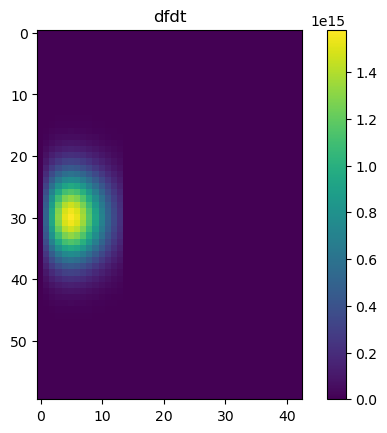

15
N
2.7684306277812445e+17 1.5862336014302026e+17
E
7.695892224697385e+19 1.142009668085274e+19


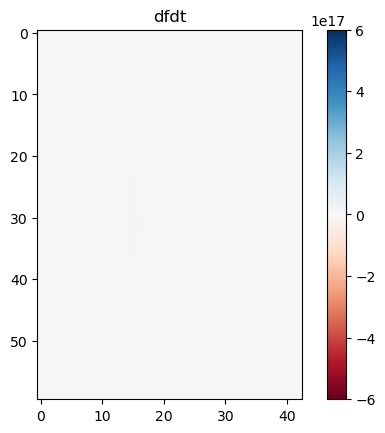

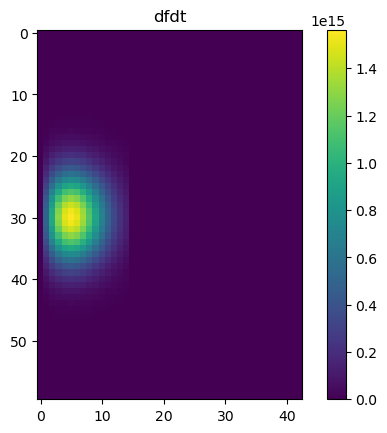

16
N
1.755823012227299e+17 1.5862336014302022e+17
E
5.406815217760853e+19 1.161047167019746e+19


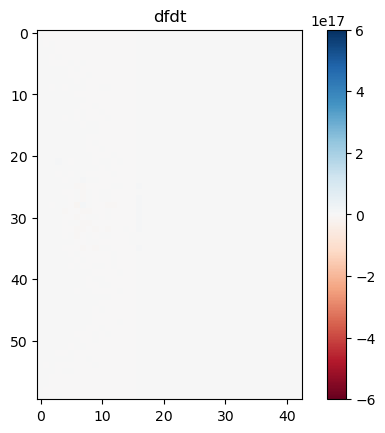

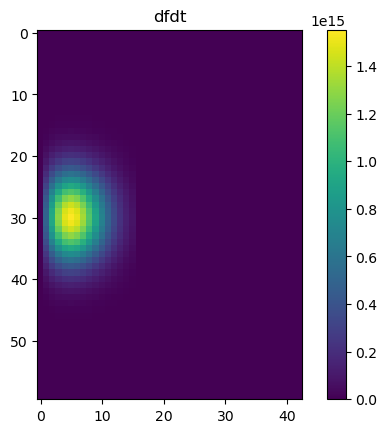

17
N
1.0510780616367429e+17 1.586233601430203e+17
E
3.581406264452292e+19 1.1737506418808324e+19


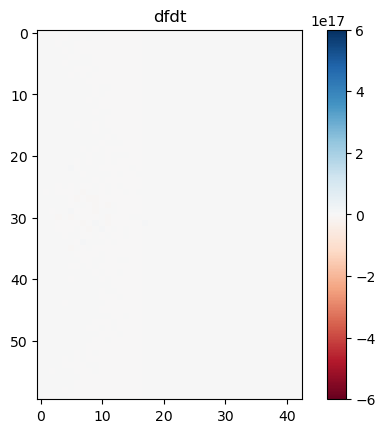

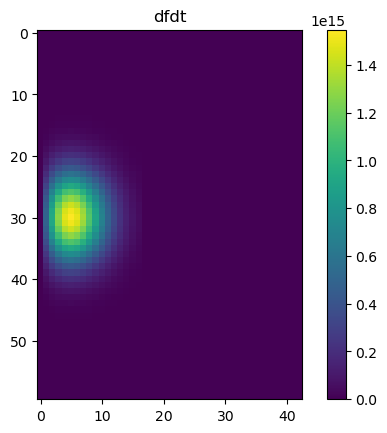

18
N
5.8059312066577096e+16 1.5862336014302026e+17
E
2.1837913695774618e+19 1.18179074755862e+19


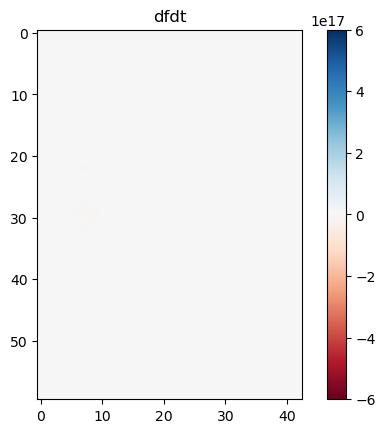

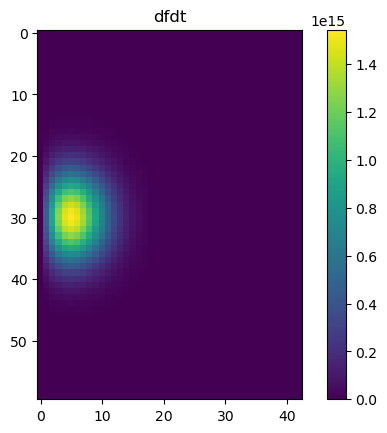

19
N
3.0466952517250204e+16 1.5862336014302026e+17
E
1.2645981507468483e+19 1.186620407627752e+19


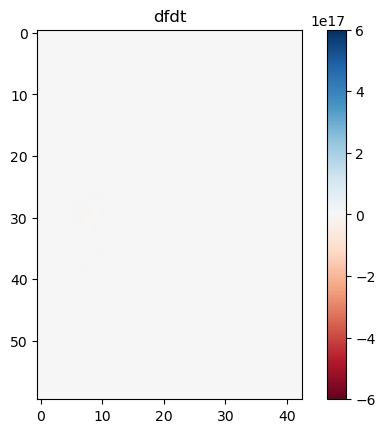

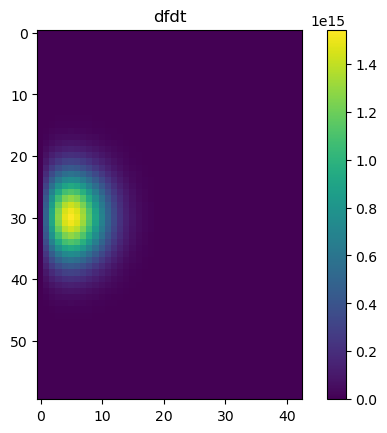

20
N
1.5228126271448152e+16 1.5862336014302026e+17
E
6.923427142480183e+18 1.189376341249287e+19


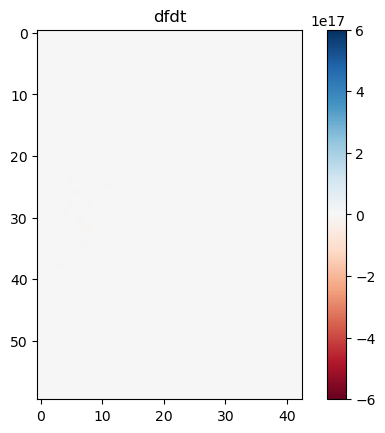

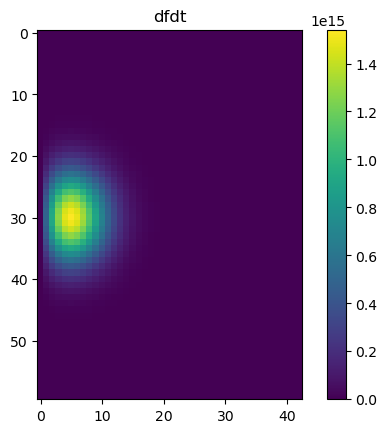

21
N
7776915488828968.0 1.5862336014302022e+17
E
3.8210232719114583e+18 1.1908716836757664e+19


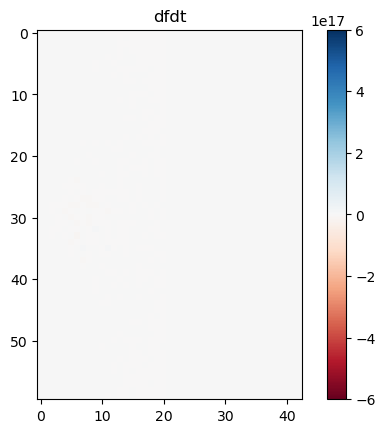

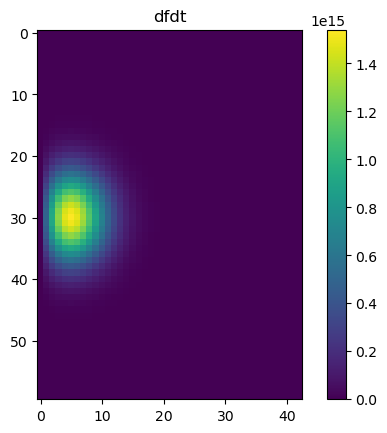

22
N
3695894940242043.5 1.5862336014302032e+17
E
1.9808067707389727e+18 1.1916439301545302e+19


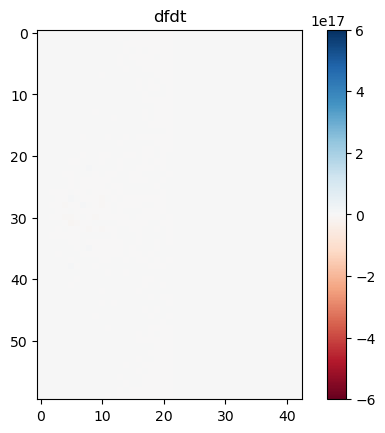

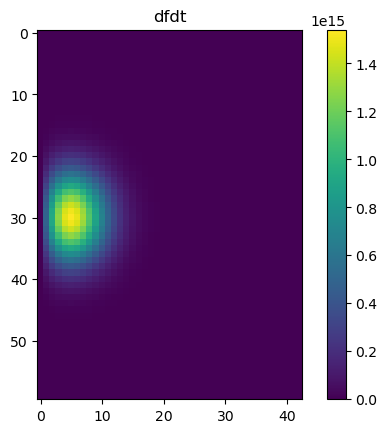

23
N
1472007308402373.5 1.5862336014302026e+17
E
8.589999304310853e+17 1.1920238698222088e+19


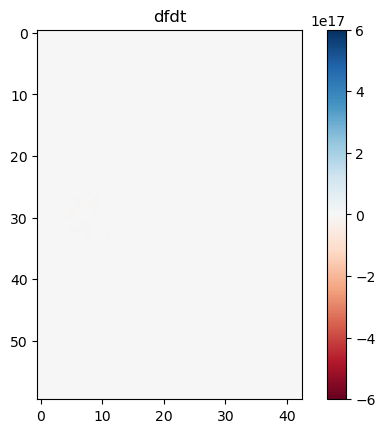

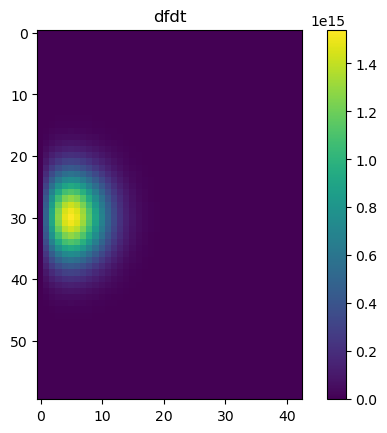

24
N
619729282761898.9 1.5862336014302026e+17
E
3.9112534017655226e+17 1.1922020996147114e+19


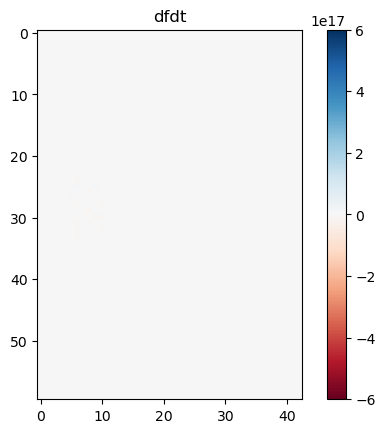

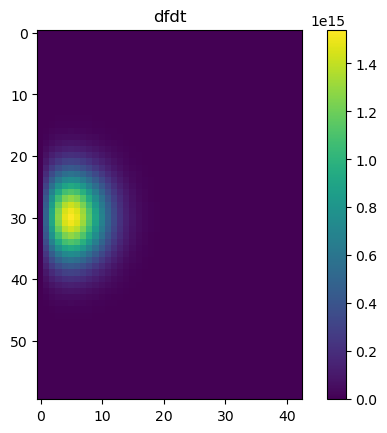

25
N
263862435723504.4 1.5862336014302022e+17
E
1.78048740488112e+17 1.1922818762454503e+19


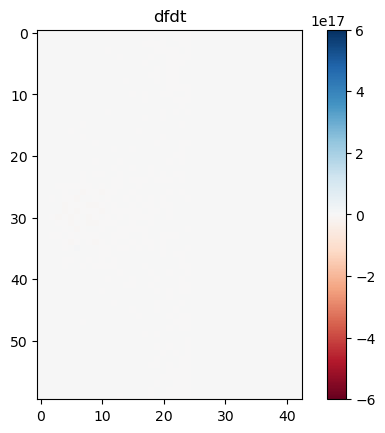

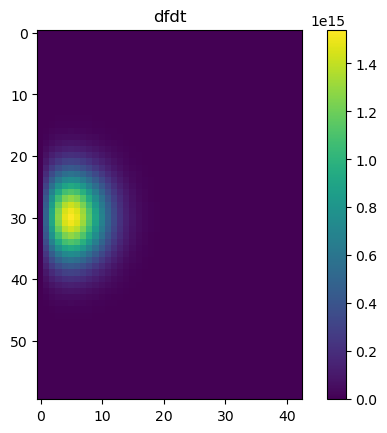

26
N
102977507102419.22 1.5862336014302016e+17
E
7.509350488243458e+16 1.1923159707005622e+19


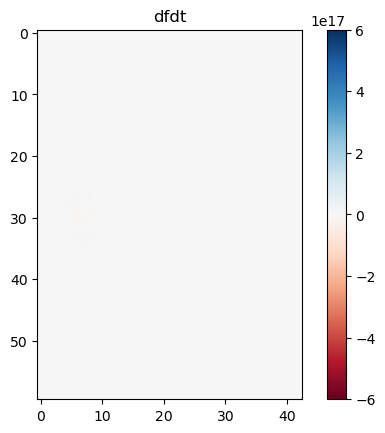

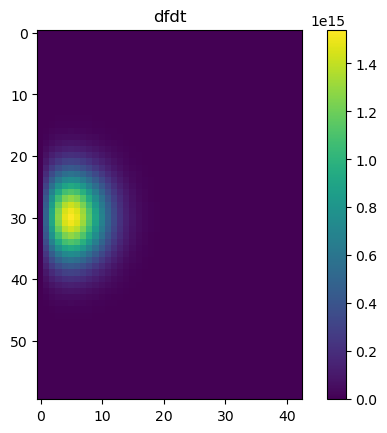

27
N
39550271662240.21 1.586233601430203e+17
E
3.0785313899316256e+16 1.192329891084848e+19


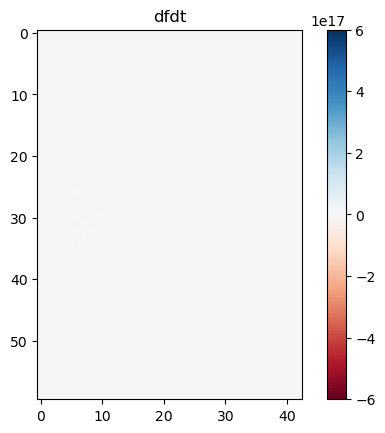

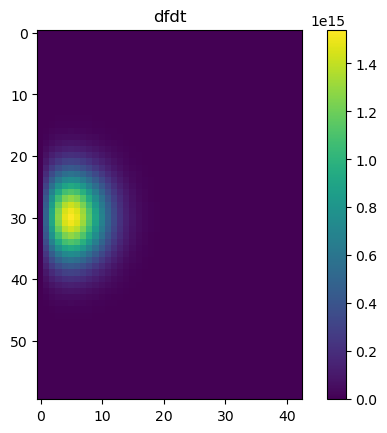

28
N
13483569275211.389 1.5862336014302022e+17
E
1.1297057885663714e+16 1.1923353235027046e+19


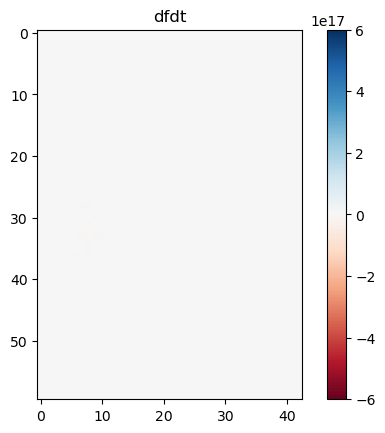

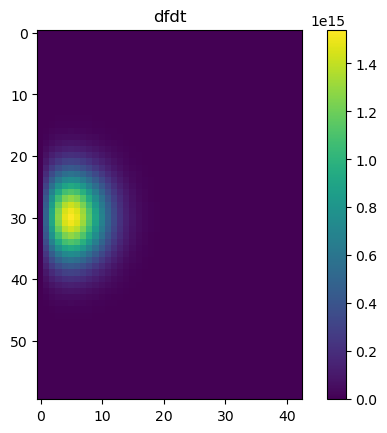

29
N
4357182900109.062 1.586233601430203e+17
E
3888069966132590.5 1.1923373507070833e+19


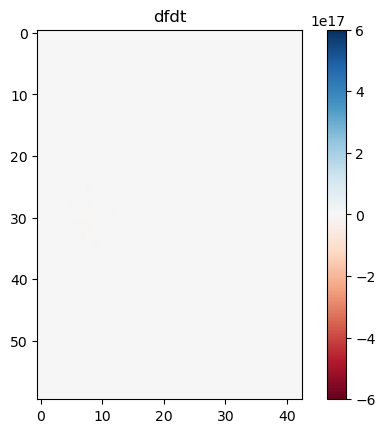

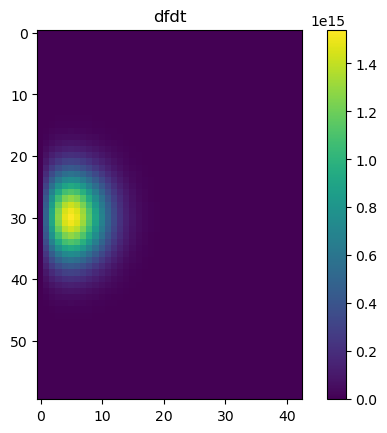

1e+21
10
N
5.761135659783167e+18 1.5862336014302022e+17
E
8.457154087665912e+20 9.097739718031257e+18


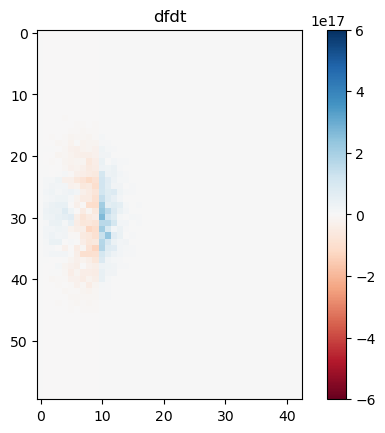

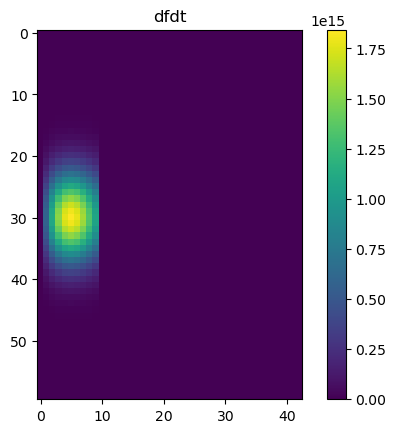

11
N
4.526328975813844e+18 1.586233601430202e+17
E
7.552811803723989e+20 9.752581457390193e+18


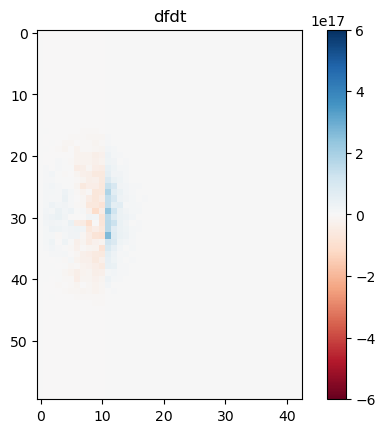

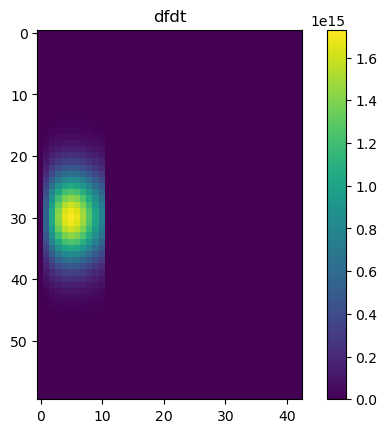

12
N
3.2004588061122755e+18 1.5862336014302022e+17
E
6.0974075103295e+20 1.0318932873592812e+19


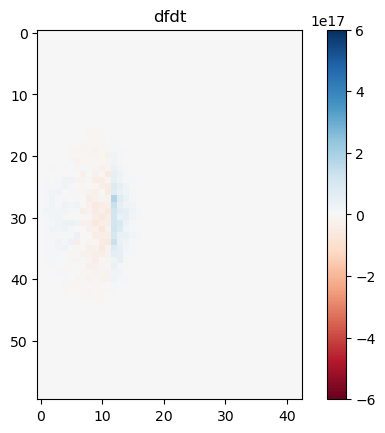

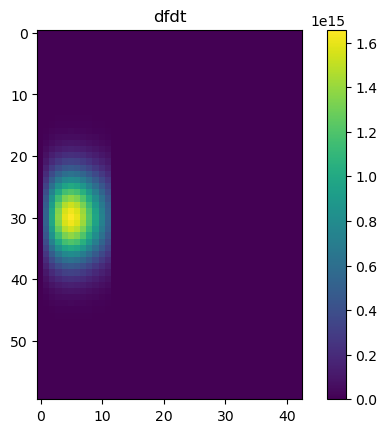

13
N
2.089500030988946e+18 1.5862336014302022e+17
E
4.58105665881997e+20 1.0785066391139731e+19


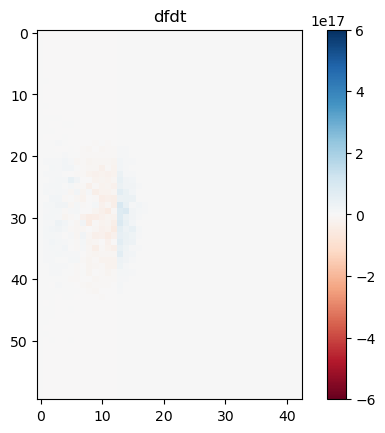

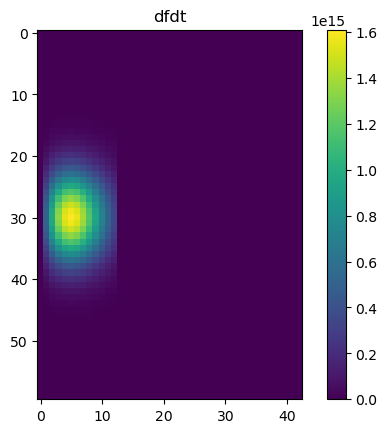

14
N
1.429984492233636e+18 1.586233601430202e+17
E
3.51780130992264e+20 1.1149584724620917e+19


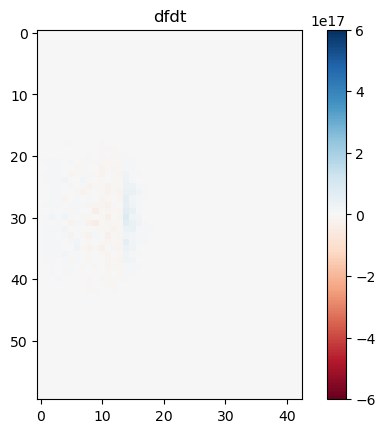

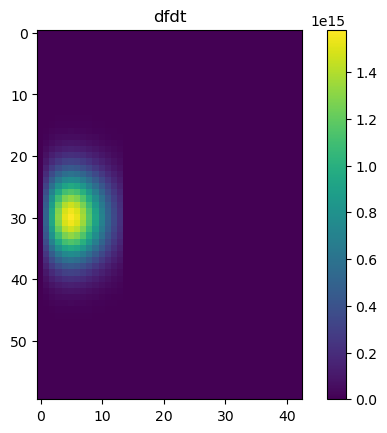

15
N
9.548295146784447e+17 1.5862336014302026e+17
E
2.646247560640893e+20 1.142009668085274e+19


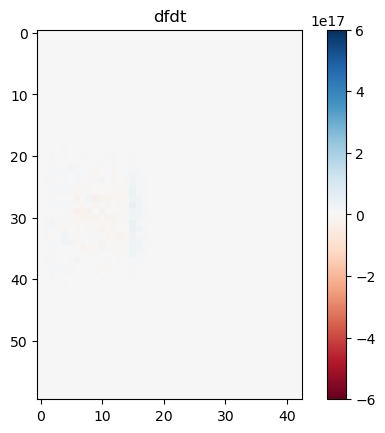

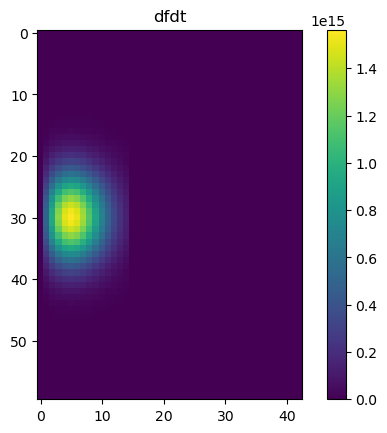

16
N
5.6622133829028294e+17 1.5862336014302022e+17
E
1.756682110889997e+20 1.161047167019746e+19


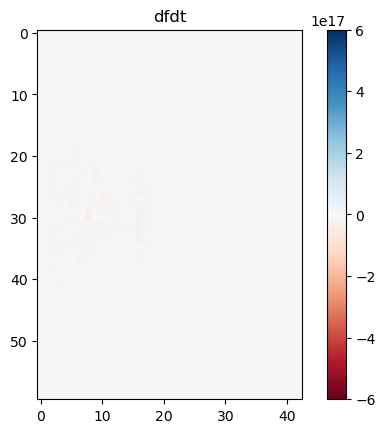

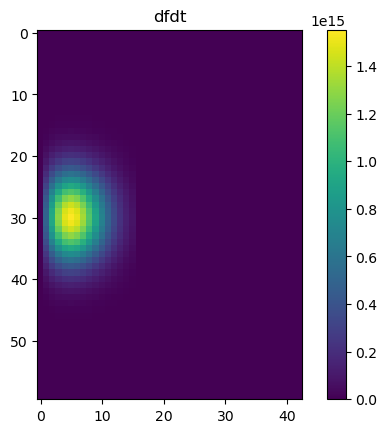

17
N
3.044571995196246e+17 1.586233601430203e+17
E
1.0456963946393523e+20 1.1737506418808324e+19


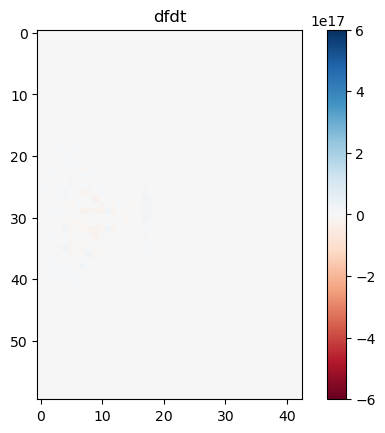

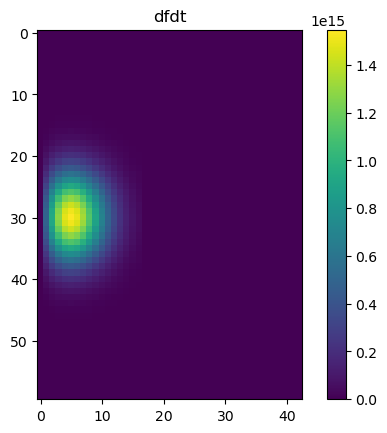

18
N
1.891002652543276e+17 1.5862336014302026e+17
E
7.125942166625389e+19 1.18179074755862e+19


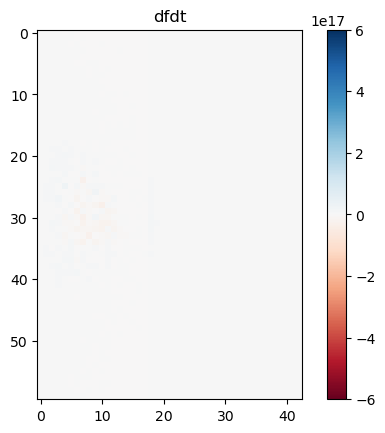

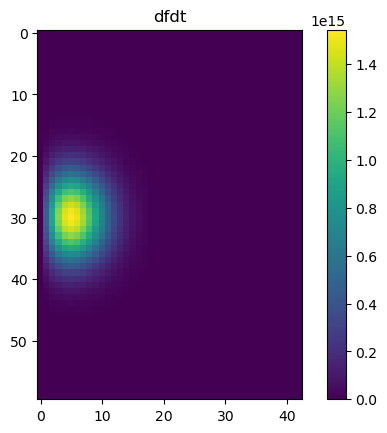

19
N
9.748586492163845e+16 1.5862336014302026e+17
E
4.0370580934923215e+19 1.186620407627752e+19


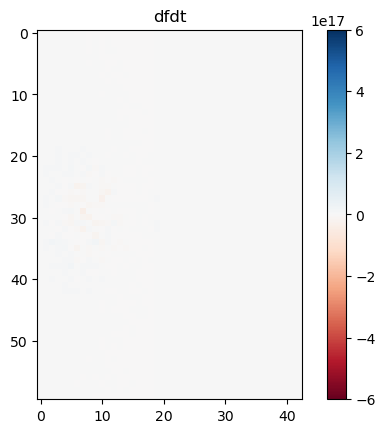

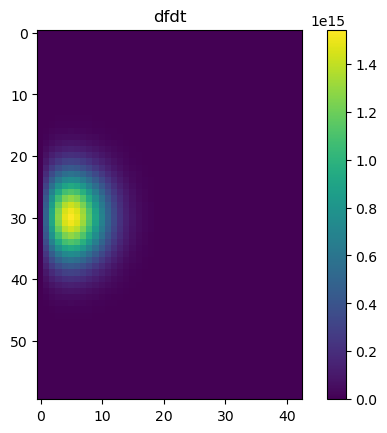

20
N
4.762526594282059e+16 1.5862336014302026e+17
E
2.1590570281761616e+19 1.189376341249287e+19


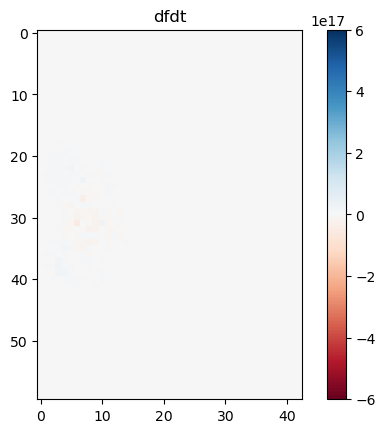

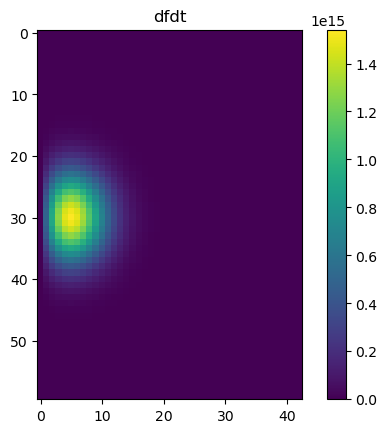

21
N
2.448021832991876e+16 1.5862336014302022e+17
E
1.206902701603485e+19 1.1908716836757664e+19


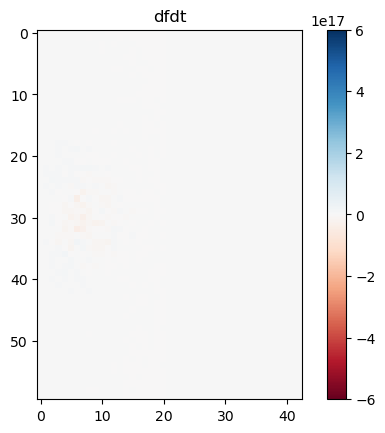

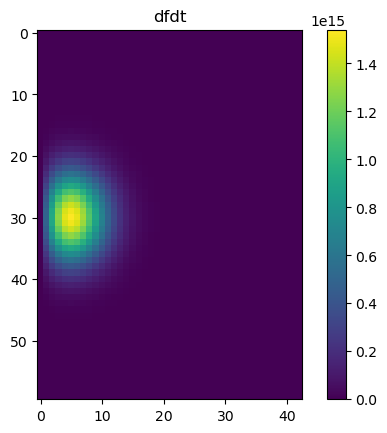

22
N
1.0722541270319466e+16 1.5862336014302032e+17
E
5.781273202498916e+18 1.1916439301545302e+19


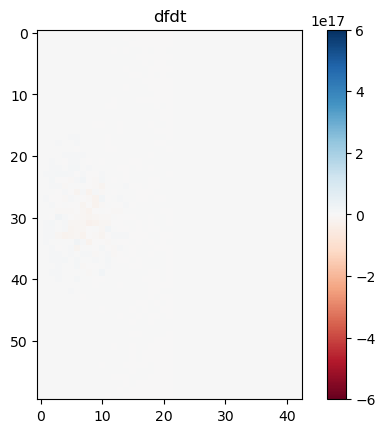

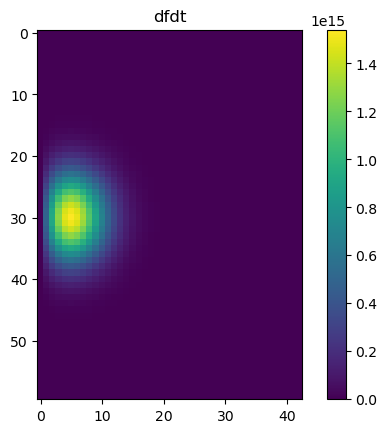

23
N
5082534990746990.0 1.5862336014302026e+17
E
2.9596319301660273e+18 1.1920238698222088e+19


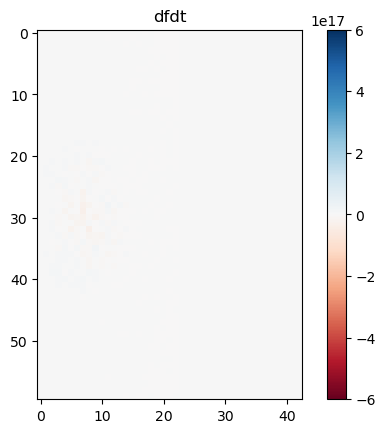

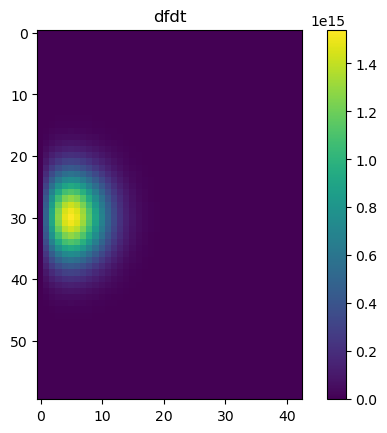

24
N
1919177321207632.8 1.5862336014302026e+17
E
1.210362581599841e+18 1.1922020996147114e+19


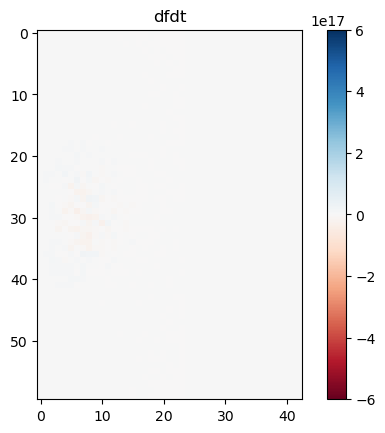

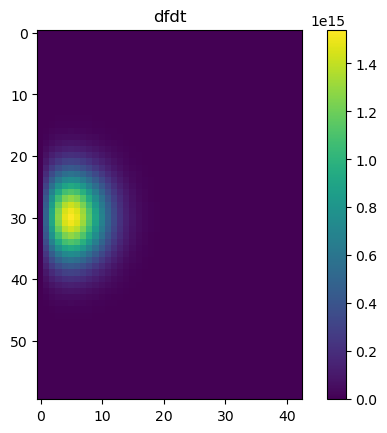

25
N
788404253979183.6 1.5862336014302022e+17
E
5.3615488555821434e+17 1.1922818762454503e+19


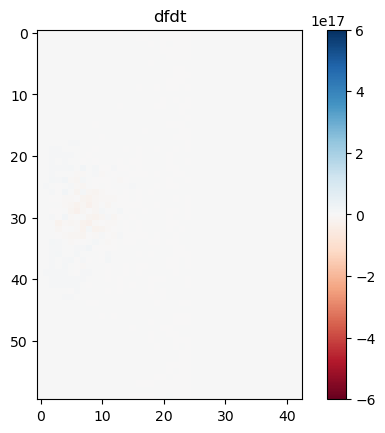

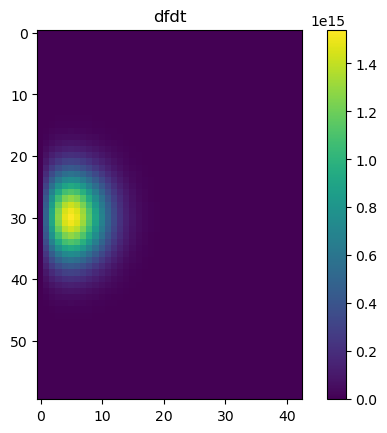

26
N
310358296129131.8 1.5862336014302016e+17
E
2.262534247171006e+17 1.1923159707005622e+19


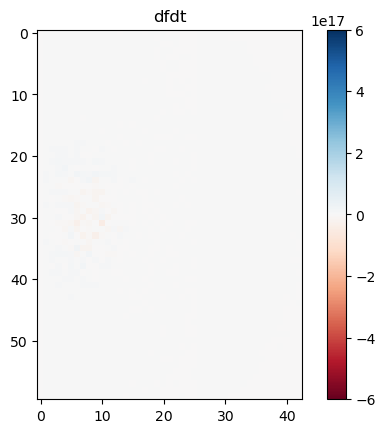

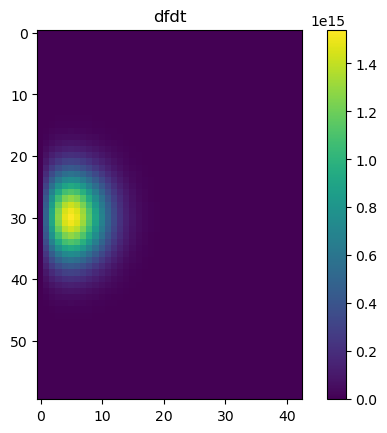

27
N
114690949557095.14 1.586233601430203e+17
E
8.939544330413995e+16 1.192329891084848e+19


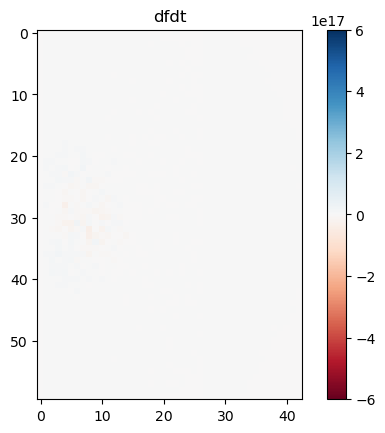

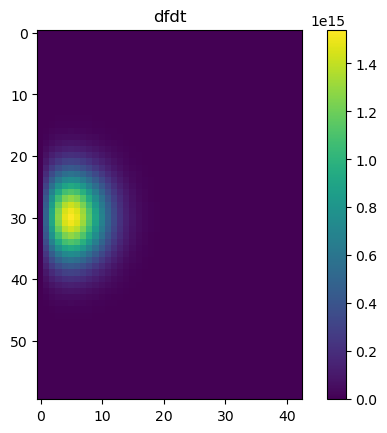

28
N
44262012013250.516 1.5862336014302022e+17
E
3.679849213138975e+16 1.1923353235027046e+19


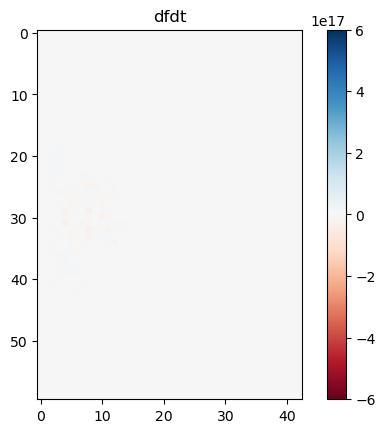

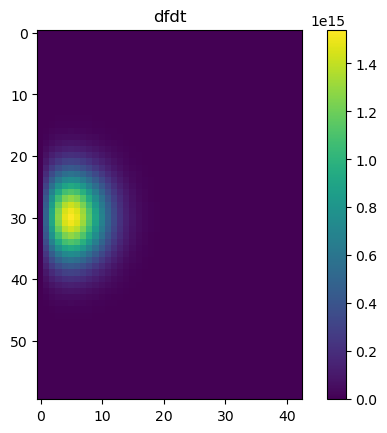

29
N
14500276505358.904 1.586233601430203e+17
E
1.2913885012151404e+16 1.1923373507070833e+19


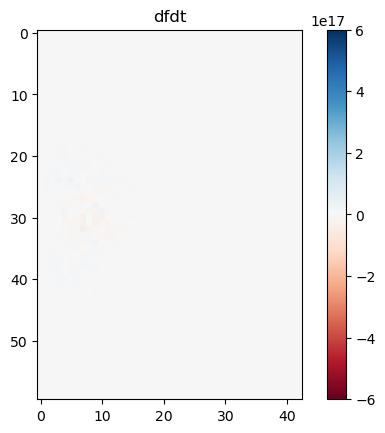

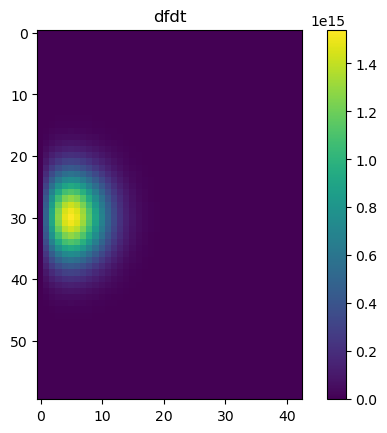

In [198]:
allparticlefracs=[]
allenergyfracs=[]
Temps=[0.01,0.1,1,10,100]
#Densities=[Density]
Threshs=np.arange(10,30)

for T in Temps:
    print(d)
    particlefracs=[]
    energyfracs=[]
    for i in Threshs:

        print(i)
        dist=SlicedMB2D(T=T, mkt=mkt, gridpoints=size, m=mp, RCut=50,Rho=1e18)
        p,e=GetParticleAndEnergyRates(dist,i,1000)
        particlefracs.append(p)
        energyfracs.append(e)
    allparticlefracs.append(particlefracs)
    allenergyfracs.append(energyfracs)

[]

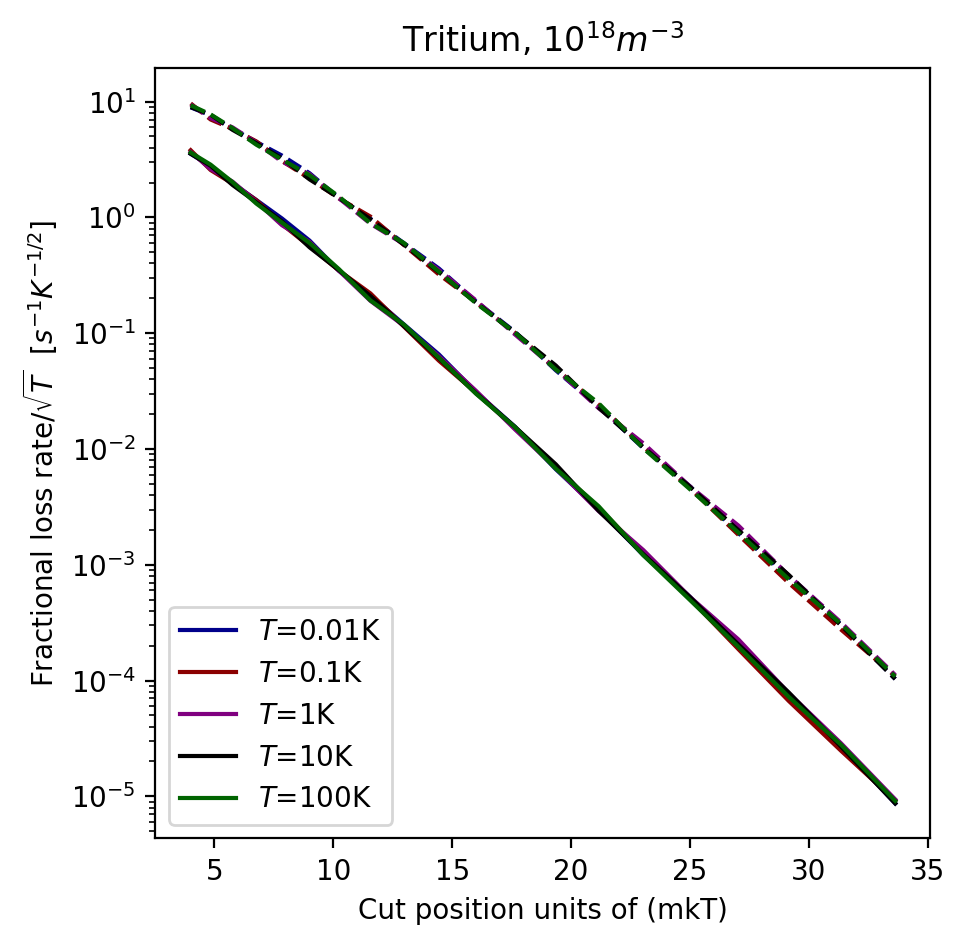

In [203]:
plt.figure(figsize=(5,5),dpi=200)
Cols=['DarkBlue','DarkRed','purple','black','darkgreen']
for i in range(0,len(allparticlefracs)):

    
    plt.plot((Threshs)**2/(mkt),np.array(allparticlefracs[i])/np.sqrt(Temps[i]),'-',label=r'$T$='+str(Temps[i]) + "K",color=Cols[i])
    plt.plot((Threshs)**2/(mkt),np.array(allenergyfracs[i])/np.sqrt(Temps[i]),'--',color=Cols[i])
plt.xlabel("Cut position units of (mkT)")
plt.ylabel(r"Fractional loss rate/$\sqrt{T}$  [$s^{-1} K^{-1/2}$]")
plt.legend(loc='lower left')
plt.title(r"Tritium, $10^{18}m^{-3}$")
#plt.xlim(1,9)
#plt.ylim(1e-1,1e3)

plt.semilogy()

In [208]:
Threshs=np.arange(10,31)
particlefracs=[]
energyfracs=[]
for i in Threshs:
    print (i)
    dist=SlicedMB2D(T=1, mkt=mkt, gridpoints=size, m=mp, RCut=50,Rho=1e18)
    p,e=GetParticleAndEnergyRates(dist,i,1000)
    particlefracs.append(p)
    energyfracs.append(e)

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [233]:
LogGammaN=interp1d((Threshs)**2/(2*mkt),np.log(np.array(particlefracs)),bounds_error=False,fill_value='extrapolate')
LogGammaE=interp1d((Threshs)**2/(2*mkt),np.log(np.array(energyfracs)),bounds_error=False,fill_value='extrapolate')
GammaN=lambda eta: np.exp(LogGammaN(eta))
GammaE=lambda eta: np.exp(LogGammaE(eta))
f=open("GammaFile_T1K_rho1e18.pkl",'wb')
pickle.dump([LogGammaE,LogGammaN],f)
f.close()

[]

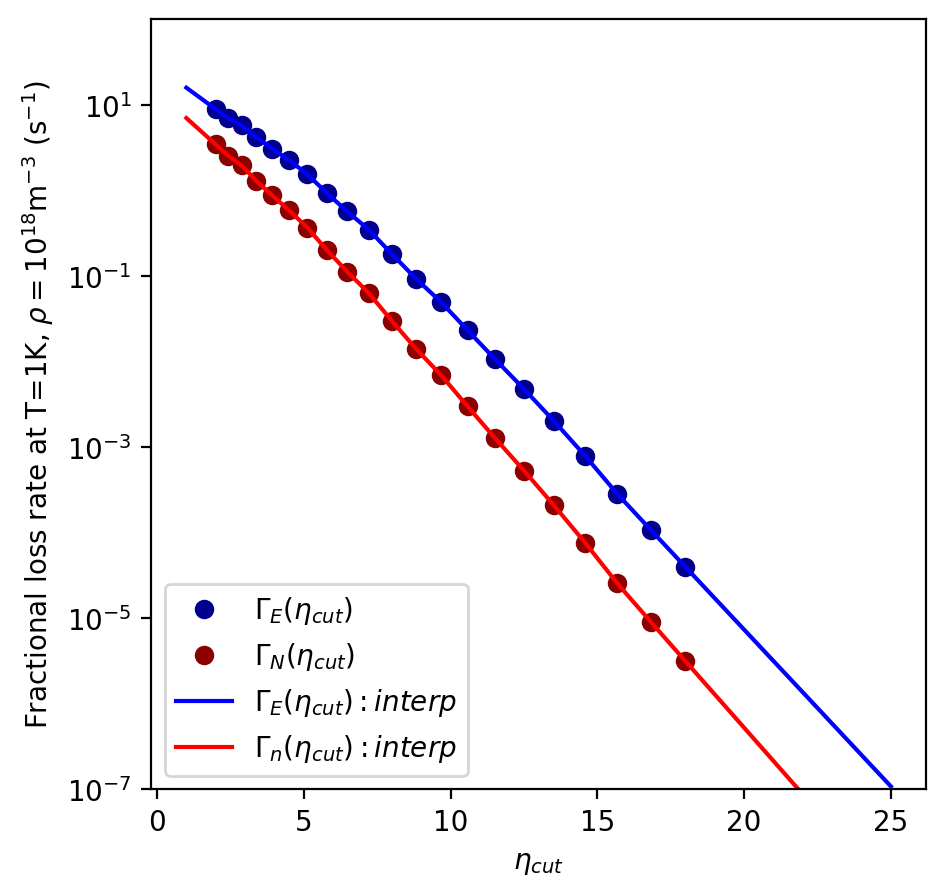

In [241]:
plt.figure(figsize=(5,5),dpi=200)
Cols=['DarkBlue','DarkRed','purple','black','darkgreen']
    
etas=np.linspace(1,25,100)
plt.plot((Threshs)**2/(2*mkt),np.array(energyfracs),'o',label=r'$\Gamma_E(\eta_{cut})$',color='DarkBlue')
plt.plot((Threshs)**2/(2*mkt),np.array(particlefracs),'o',label=r'$\Gamma_N(\eta_{cut})$',color='DarkRed')


plt.plot(etas,GammaE(etas),'-',label=r'$\Gamma_E(\eta_{cut}): interp$',color='blue')
plt.plot(etas,GammaN(etas),'-',label=r'$\Gamma_n(\eta_{cut}): interp$',color='red')
plt.xlabel("$\eta_{cut}$")
plt.ylabel(r"Fractional loss rate at T=1K, $\rho=10^{18}$m$^{-3}$ (s$^{-1}$)")
plt.legend(loc='lower left')

#plt.title(r"Tritium, $10^{18}m^{-3}$")
#plt.xlim(1,9)
#plt.ylim(1e-1,1e3)
plt.ylim(1e-7,1e2)
plt.semilogy()

In [ ]:
plt.plot(Gamma)

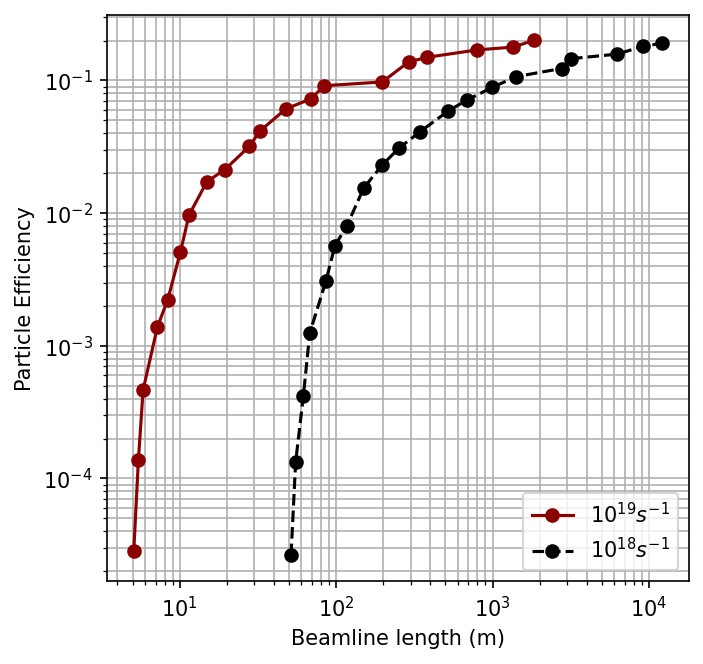

In [265]:
plt.figure(figsize=(5,5),dpi=150)
plt.plot(L,effic,'o-',color='DarkRed',label=r'10$^{19}s^{-1}$')
plt.loglog()
plt.plot(LH,efficH,'o--',color='black',label=r'10$^{18}s^{-1}$')
plt.loglog()
plt.ylabel("Particle Efficiency")
plt.xlabel("Beamline length (m)")
plt.grid(which='both')
plt.legend(loc='lower right')

